In [21]:
import json
import pandas as pd
import random

# Load JSON data
with open('arxiv_cs.json', 'r') as file:
    data = [json.loads(line) for line in file]

# Convert to pandas DataFrame
df = pd.DataFrame(data)
print(f"Total papers loaded: {len(df)}")

# Randomly sample 20 papers
sample_df = df.sample(n=20, random_state=42).reset_index(drop=True)
print("Sampled Papers:")
print(sample_df[['id', 'title', 'authors', 'categories']])


Total papers loaded: 402168
Sampled Papers:
            id                                              title  \
0   2408.00157  Generative Learning of the Solution of Paramet...   
1   1912.12817  An End-to-End Joint Learning Scheme of Image C...   
2   2407.11213  OpenPSG: Open-set Panoptic Scene Graph Generat...   
3   1808.03944  Unsupervised learning for cross-domain medical...   
4   1901.09972  Heartbeat Anomaly Detection using Adversarial ...   
5   2405.09039  SMART: Towards Pre-trained Missing-Aware Model...   
6   1909.03772  A Survey on Reproducibility by Evaluating Deep...   
7   1911.03786  Spatially Regularized Parametric Map Reconstru...   
8   2209.15614        TinyTurbo: Efficient Turbo Decoders on Edge   
9   2006.02047  SDE approximations of GANs training and its lo...   
10  2401.09895  Skeleton-Guided Instance Separation for Fine-G...   
11  2105.14944  The effectiveness of feature attribution metho...   
12  2405.00790  SCAR: Scheduling Multi-Model AI Workloads o

In [45]:
df.head()

id                           authors  \
0  0704.0047            T. Kosel and I. Grabec   
1  0704.0050            T. Kosel and I. Grabec   
2  0704.0304                 Carlos Gershenson   
3  0704.0671                    Maxim Raginsky   
4  0704.0954  Soummya Kar and Jose M. F. Moura   

                                               title  \
0  Intelligent location of simultaneously active ...   
1  Intelligent location of simultaneously active ...   
2                  The World as Evolving Information   
3              Learning from compressed observations   
4  Sensor Networks with Random Links: Topology De...   

                                            comments  \
0          5 pages, 5 eps figures, uses IEEEtran.cls   
1          5 pages, 7 eps figures, uses IEEEtran.cls   
2  16 pages. Extended version, three more laws of...   
3  6 pages; submitted to the 2007 IEEE Informatio...   
4                     Submitted to IEEE Transactions   

                                         journal-ref  \
0                                               None   
1                                               None   
2  Minai, A., Braha, D., and Bar-Yam, Y., eds. Un...   
3                                               None   
4                                               None   

                            doi                    categories  \
0                          None                   cs.NE cs.AI   
1                          None                   cs.NE cs.AI   
2  10.1007/978-3-642-18003-3_10  cs.IT cs.AI math.IT q-bio.PE   
3      10.1109/ITW.2007.4313111           cs.IT cs.LG math.IT   
4       10.1109/TSP.2008.920143           cs.IT cs.LG math.IT   

                                            abstract update_date        _time  
0    The intelligent acoustic emission locator is...  2009-09-29  01 Apr 2007  
1    Part I describes an intelligent acoustic emi...  2007-05-23  01 Apr 2007  
2    This paper discusses the benefits of describ...  2013-04-05  13 Oct 2010  
3    The problem of statistical learning is to co...  2016-11-15  05 Apr 2007  
4    In a sensor network, in practice, the commun...  2009-11-13  06 Apr 2007

In [23]:
def prepare_text(row):
    title = row['title']
    abstract = row['abstract']
    authors = row['authors']
    combined_text = f"Title: {title}. Authors: {authors}. Abstract: {abstract}"
    return combined_text

sample_df['combined_text'] = sample_df.apply(prepare_text, axis=1)
print("Prepared Texts:")
print(sample_df['combined_text'])


Prepared Texts:
0     Title: Generative Learning of the Solution of ...
1     Title: An End-to-End Joint Learning Scheme of ...
2     Title: OpenPSG: Open-set Panoptic Scene Graph ...
3     Title: Unsupervised learning for cross-domain ...
4     Title: Heartbeat Anomaly Detection using Adver...
5     Title: SMART: Towards Pre-trained Missing-Awar...
6     Title: A Survey on Reproducibility by Evaluati...
7     Title: Spatially Regularized Parametric Map Re...
8     Title: TinyTurbo: Efficient Turbo Decoders on ...
9     Title: SDE approximations of GANs training and...
10    Title: Skeleton-Guided Instance Separation for...
11    Title: The effectiveness of feature attributio...
12    Title: SCAR: Scheduling Multi-Model AI Workloa...
13    Title: Learning Foreground-Background Segmenta...
14    Title: Child-Computer Interaction with Mobile ...
15    Title: Bandits for Structure Perturbation-base...
16    Title: SEMICON: A Learning-to-hash Solution fo...
17    Title: Large-Scale Unsuper

In [55]:
from sentence_transformers import SentenceTransformer
from tqdm.auto import tqdm

# Define the models to use
model_names = {
    "scincl": "malteos/scincl",
    "snowflake": "Snowflake/snowflake-arctic-embed-m-v1.5",
    
}

# Load the models
models = {}
for key, name in model_names.items():
    try:
        models[key] = SentenceTransformer(name)
        print(f"Loaded model: {name}")
    except Exception as e:
        print(f"Error loading model {name}: {e}")

# Generate embeddings for each model
for key, model in models.items():
    print(f"\nGenerating embeddings using the '{key}' model...")
    embeddings = model.encode(
        sample_df['combined_text'].tolist(),
        show_progress_bar=False,  # Disable internal progress bar
        convert_to_numpy=True
    )
    sample_df[f'embedding_{key}'] = embeddings.tolist()
    print(f"Embeddings for '{key}' model generated successfully.")


Loaded model: malteos/scincl


No sentence-transformers model found with name allenai/specter2. Creating a new one with mean pooling.


Loaded model: Snowflake/snowflake-arctic-embed-m-v1.5
Error loading model allenai/specter2: Unrecognized model in allenai/specter2. Should have a `model_type` key in its config.json, or contain one of the following strings in its name: albert, align, altclip, audio-spectrogram-transformer, autoformer, bark, bart, beit, bert, bert-generation, big_bird, bigbird_pegasus, biogpt, bit, blenderbot, blenderbot-small, blip, blip-2, bloom, bridgetower, bros, camembert, canine, chameleon, chinese_clip, chinese_clip_vision_model, clap, clip, clip_text_model, clip_vision_model, clipseg, clvp, code_llama, codegen, cohere, conditional_detr, convbert, convnext, convnextv2, cpmant, ctrl, cvt, dac, data2vec-audio, data2vec-text, data2vec-vision, dbrx, deberta, deberta-v2, decision_transformer, deformable_detr, deit, depth_anything, deta, detr, dinat, dinov2, distilbert, donut-swin, dpr, dpt, efficientformer, efficientnet, electra, encodec, encoder-decoder, ernie, ernie_m, esm, falcon, falcon_mamba, fas

In [85]:
from sentence_transformers import SentenceTransformer
from tqdm.auto import tqdm

# Define the models to use
model_names = {
    "scincl": "malteos/scincl",
    "snowflake": "Snowflake/snowflake-arctic-embed-m-v1.5",
    
}

# Load the models
models = {}
for key, name in model_names.items():
    try:
        models[key] = SentenceTransformer(name)
        print(f"Loaded model: {name}")
    except Exception as e:
        print(f"Error loading model {name}: {e}")
df['combined_text'] = df.apply(prepare_text, axis=1)
d = df[:20]
# Generate embeddings for each model
for key, model in models.items():
    print(f"\nGenerating embeddings using the '{key}' model...")
    embeddings = model.encode(
        d['combined_text'].tolist(),
        show_progress_bar=False,  # Disable internal progress bar
        convert_to_numpy=True
    )
    d[f'embedding_{key}'] = embeddings.tolist()
    print(f"Embeddings for '{key}' model generated successfully.")
    

Loaded model: malteos/scincl
Loaded model: Snowflake/snowflake-arctic-embed-m-v1.5

Generating embeddings using the 'scincl' model...


/var/folders/qp/qtzjgpzd4f16bb3d8kq4zx600000gn/T/ipykernel_77317/51852569.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[f'embedding_{key}'] = embeddings.tolist()


Embeddings for 'scincl' model generated successfully.

Generating embeddings using the 'snowflake' model...
Embeddings for 'snowflake' model generated successfully.


/var/folders/qp/qtzjgpzd4f16bb3d8kq4zx600000gn/T/ipykernel_77317/51852569.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[f'embedding_{key}'] = embeddings.tolist()


In [87]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to compute cosine similarity matrix
def compute_cosine_similarity(embeddings):
    # Convert list of embeddings to a 2D numpy array
    emb_array = np.vstack(embeddings)
    # Normalize embeddings to unit vectors to compute cosine similarity via dot product
    emb_normalized = emb_array / np.linalg.norm(emb_array, axis=1, keepdims=True)
    similarity_matrix = np.dot(emb_normalized, emb_normalized.T)
    return similarity_matrix

# Compute similarity matrices for each model
similarity_matrices = {}
for key in models.keys():
    print(f"\nComputing cosine similarity matrix for '{key}' model...")
    embeddings = d[f'embedding_{key}'].tolist()
    similarity_matrix = compute_cosine_similarity(embeddings)
    similarity_matrices[key] = similarity_matrix
    print(f"Similarity matrix for '{key}' model computed successfully.")



Computing cosine similarity matrix for 'scincl' model...
Similarity matrix for 'scincl' model computed successfully.

Computing cosine similarity matrix for 'snowflake' model...
Similarity matrix for 'snowflake' model computed successfully.


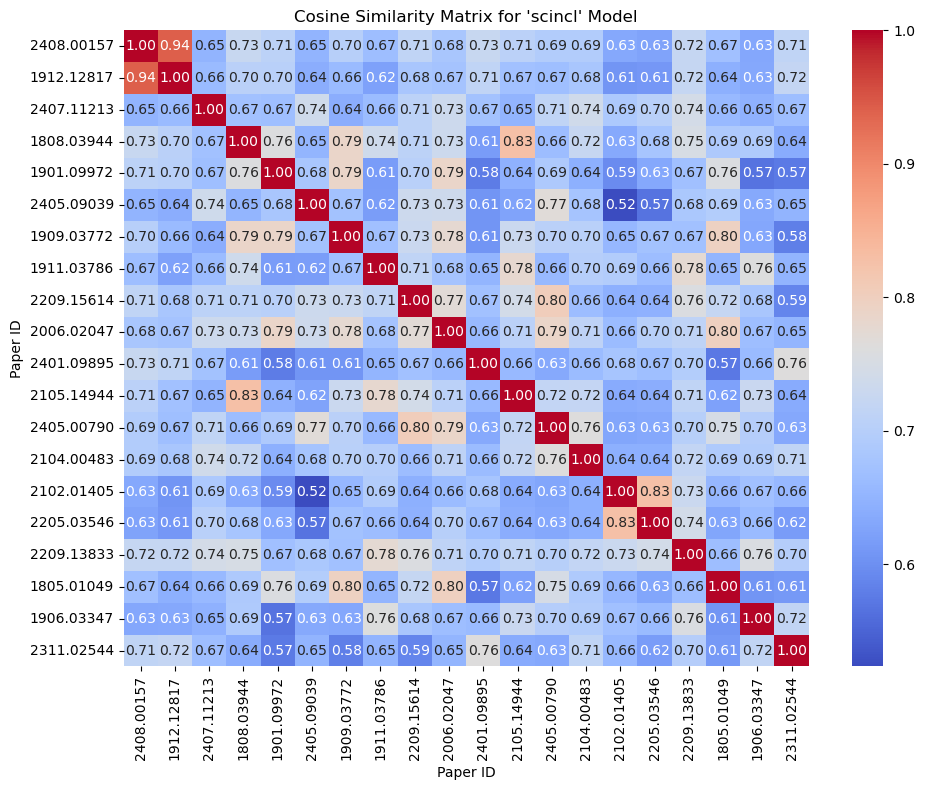

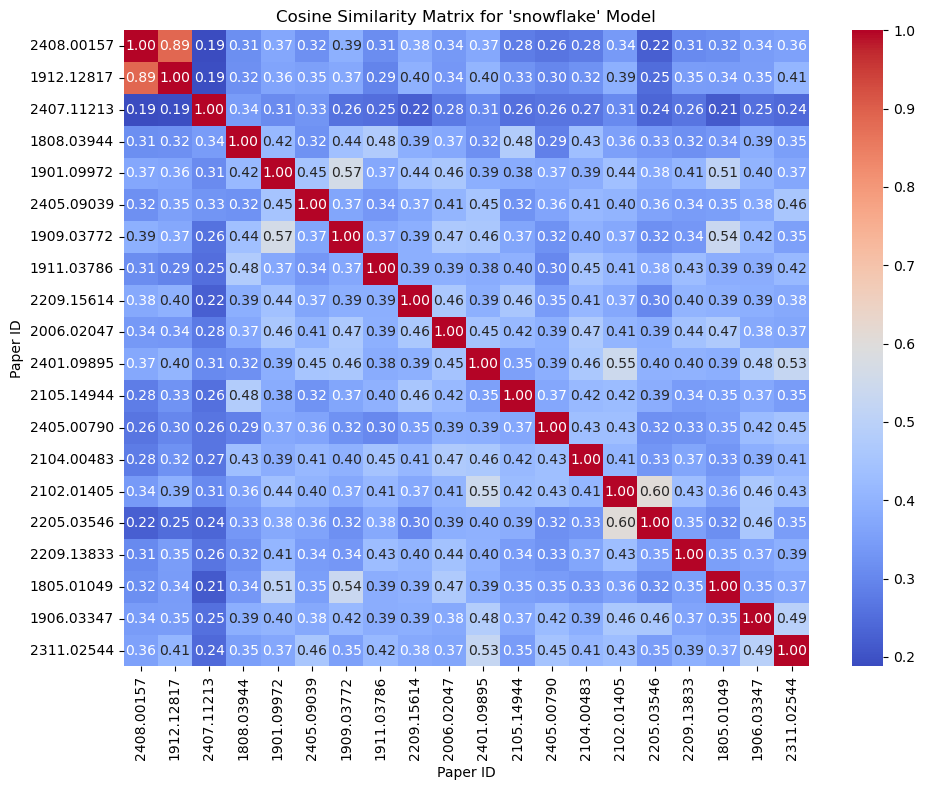

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot similarity matrix
def plot_similarity_matrix(matrix, model_key):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', 
                xticklabels=sample_df['id'], yticklabels=sample_df['id'])
    plt.title(f"Cosine Similarity Matrix for '{model_key}' Model")
    plt.xlabel("Paper ID")
    plt.ylabel("Paper ID")
    plt.tight_layout()
    plt.show()

# Plot similarity matrices for each model
for key, matrix in similarity_matrices.items():
    plot_similarity_matrix(matrix, key)


In [29]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Function to compute cosine similarity matrix
def compute_cosine_similarity(embeddings):
    # Convert list of embeddings to a 2D numpy array
    emb_array = np.vstack(embeddings)
    # Normalize embeddings to unit vectors to compute cosine similarity via dot product
    emb_normalized = emb_array / np.linalg.norm(emb_array, axis=1, keepdims=True)
    similarity_matrix = np.dot(emb_normalized, emb_normalized.T)
    return similarity_matrix

# Compute similarity matrices for each model
similarity_matrices = {}
for key in models.keys():
    print(f"\nComputing cosine similarity matrix for '{key}' model...")
    embeddings = sample_df[f'embedding_{key}'].tolist()
    similarity_matrix = compute_cosine_similarity(embeddings)
    similarity_matrices[key] = similarity_matrix
    print(f"Similarity matrix for '{key}' model computed successfully.")



Computing cosine similarity matrix for 'scincl' model...
Similarity matrix for 'scincl' model computed successfully.

Computing cosine similarity matrix for 'snowflake' model...
Similarity matrix for 'snowflake' model computed successfully.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


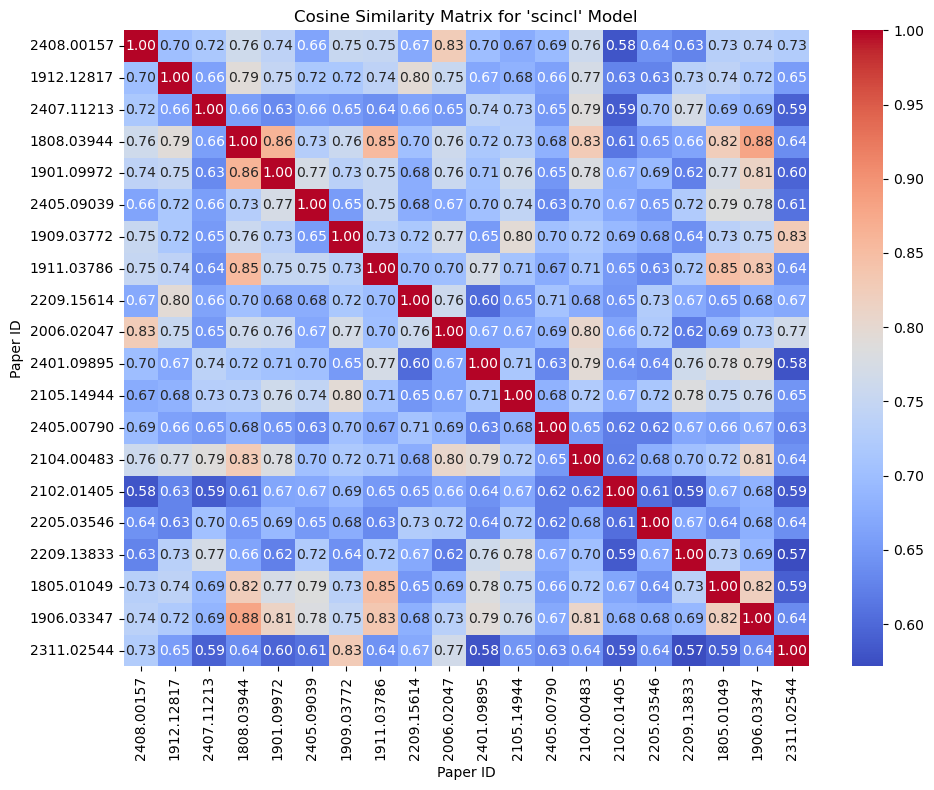

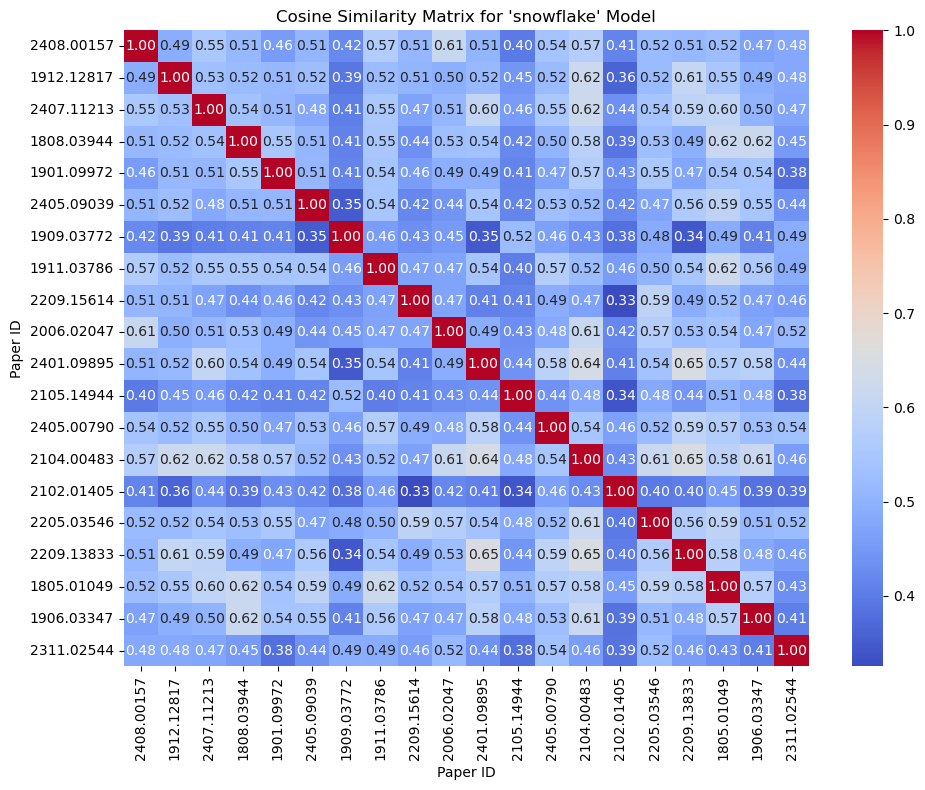

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot similarity matrix
def plot_similarity_matrix(matrix, model_key):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', 
                xticklabels=sample_df['id'], yticklabels=sample_df['id'])
    plt.title(f"Cosine Similarity Matrix for '{model_key}' Model")
    plt.xlabel("Paper ID")
    plt.ylabel("Paper ID")
    plt.tight_layout()
    plt.show()

# Plot similarity matrices for each model
for key, matrix in similarity_matrices.items():
    plot_similarity_matrix(matrix, key)



Generating embeddings (abstract only) using the 'scincl' model...
Embeddings (abstract only) for 'scincl' model generated successfully.

Generating embeddings (abstract only) using the 'snowflake' model...
Embeddings (abstract only) for 'snowflake' model generated successfully.

Computing cosine similarity matrix (abstract only) for 'scincl' model...
Similarity matrix (abstract only) for 'scincl' model computed successfully.

Computing cosine similarity matrix (abstract only) for 'snowflake' model...
Similarity matrix (abstract only) for 'snowflake' model computed successfully.


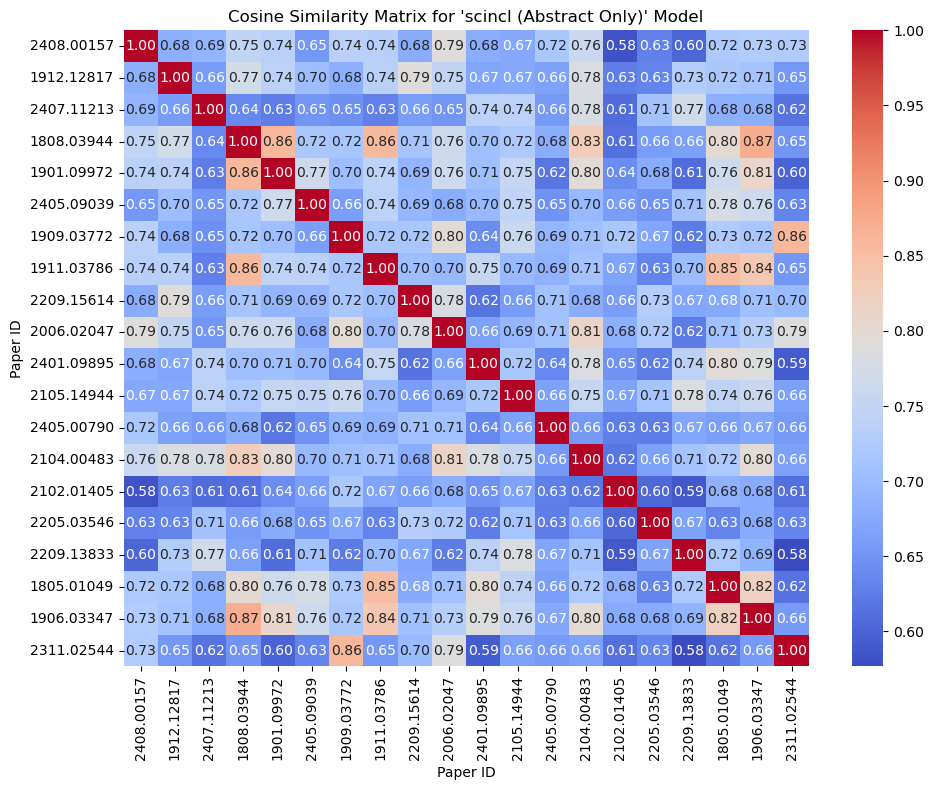

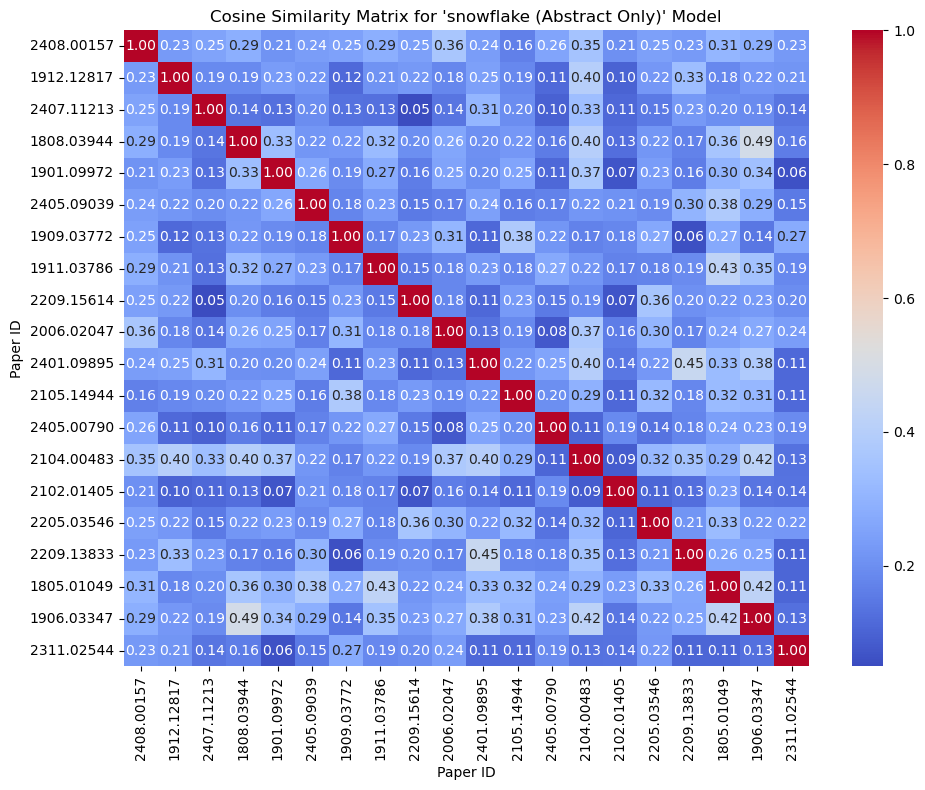

In [33]:
# Create a new column with only the abstract
sample_df['abstract_only'] = sample_df['abstract']
# Define the models to use (same as before)
model_names = {
    "scincl": "malteos/scincl",
    "snowflake": "Snowflake/snowflake-arctic-embed-m-v1.5"
}

# Load the models again (if not already loaded)
# Assuming models are already loaded from previous steps

# Generate embeddings without title and authors
for key, model in models.items():
    print(f"\nGenerating embeddings (abstract only) using the '{key}' model...")
    embeddings = model.encode(
        sample_df['abstract_only'].tolist(),
        show_progress_bar=False,  # Disable internal progress bar
        convert_to_numpy=True
    )
    sample_df[f'embedding_{key}_abstract_only'] = embeddings.tolist()
    print(f"Embeddings (abstract only) for '{key}' model generated successfully.")
# Compute similarity matrices for embeddings without title and authors
similarity_matrices_abstract_only = {}
for key in models.keys():
    print(f"\nComputing cosine similarity matrix (abstract only) for '{key}' model...")
    embeddings = sample_df[f'embedding_{key}_abstract_only'].tolist()
    similarity_matrix = compute_cosine_similarity(embeddings)
    similarity_matrices_abstract_only[key] = similarity_matrix
    print(f"Similarity matrix (abstract only) for '{key}' model computed successfully.")

# Plot similarity matrices for each model (abstract only)
for key, matrix in similarity_matrices_abstract_only.items():
    plot_similarity_matrix(matrix, f"{key} (Abstract Only)")


In [35]:
import numpy as np
import pandas as pd

def find_top_similar_pair(similarity_matrix):
    # Set the diagonal to -1 to exclude self-similarity
    np.fill_diagonal(similarity_matrix, -1)
    
    # Find the indices of the maximum similarity score
    max_index = np.unravel_index(similarity_matrix.argmax(), similarity_matrix.shape)
    return max_index, similarity_matrix[max_index]


In [37]:
# Assuming similarity_matrices is a dictionary containing similarity matrices for each model
top_pairs = {}

for key, matrix in similarity_matrices.items():
    (i, j), sim_score = find_top_similar_pair(matrix.copy())  # Use copy to avoid modifying the original
    top_pairs[key] = {
        'indices': (i, j),
        'similarity': sim_score
    }
    print(f"Top similar pair for '{key}' model: Paper {i} and Paper {j} with similarity {sim_score:.4f}")


Top similar pair for 'scincl' model: Paper 3 and Paper 18 with similarity 0.8809
Top similar pair for 'snowflake' model: Paper 10 and Paper 16 with similarity 0.6519


In [39]:
def display_paper_details(df, index1, index2, model_key, text_type='combined_text'):
    paper1 = df.iloc[index1]
    paper2 = df.iloc[index2]
    
    print(f"\n=== Comparison for '{model_key}' Model ===")
    print(f"Similarity Score: {similarity_matrices[model_key][index1][index2]:.4f}")
    
    print("\n--- Paper 1 ---")
    print(f"ID: {paper1['id']}")
    print(f"Title: {paper1['title']}")
    print(f"Authors: {paper1['authors']}")
    print(f"Categories: {paper1['categories']}")
    print(f"Abstract: {paper1['abstract']}")
    
    print("\n--- Paper 2 ---")
    print(f"ID: {paper2['id']}")
    print(f"Title: {paper2['title']}")
    print(f"Authors: {paper2['authors']}")
    print(f"Categories: {paper2['categories']}")
    print(f"Abstract: {paper2['abstract']}")


In [41]:
for key, pair_info in top_pairs.items():
    i, j = pair_info['indices']
    sim_score = pair_info['similarity']
    
    display_paper_details(sample_df, i, j, key, text_type='combined_text')



=== Comparison for 'scincl' Model ===
Similarity Score: 0.8809

--- Paper 1 ---
ID: 1808.03944
Title: Unsupervised learning for cross-domain medical image synthesis using
  deformation invariant cycle consistency networks
Authors: Chengjia Wang, Gillian Macnaught, Giorgos Papanastasiou, Tom
  MacGillivray, and David Newby
Categories: cs.CV cs.AI cs.LG eess.IV
Abstract:   Recently, the cycle-consistent generative adversarial networks (CycleGAN) has
been widely used for synthesis of multi-domain medical images. The
domain-specific nonlinear deformations captured by CycleGAN make the
synthesized images difficult to be used for some applications, for example,
generating pseudo-CT for PET-MR attenuation correction. This paper presents a
deformation-invariant CycleGAN (DicycleGAN) method using deformable
convolutional layers and new cycle-consistency losses. Its robustness dealing
with data that suffer from domain-specific nonlinear deformations has been
evaluated through comparison experim

In [43]:
# Compute average similarity for top pairs with combined text vs. abstract only
for key in models.keys():
    top_i, top_j = top_pairs[key]['indices']
    sim_with = similarity_matrices[key][top_i][top_j]
    sim_without = similarity_matrices_abstract_only[key][top_i][top_j]
    print(f"Model: {key}")
    print(f"Similarity (Title + Authors): {sim_with:.4f}")
    print(f"Similarity (Abstract Only): {sim_without:.4f}\n")


Model: scincl
Similarity (Title + Authors): 0.8809
Similarity (Abstract Only): 0.8724

Model: snowflake
Similarity (Title + Authors): 0.6519
Similarity (Abstract Only): 0.4530



In [47]:
def find_pairs_above_threshold(similarity_matrix, threshold=0.8):
    pairs = []
    n = similarity_matrix.shape[0]
    for i in range(n):
        for j in range(i+1, n):
            if similarity_matrix[i][j] > threshold:
                pairs.append(((i, j), similarity_matrix[i][j]))
    return pairs

# Find and display pairs for each model
for key, matrix in similarity_matrices.items():
    print(f"\nPairs with similarity > 0.8 for '{key}' model:")
    high_pairs = find_pairs_above_threshold(matrix.copy(), threshold=0.8)
    if not high_pairs:
        print("No pairs found with similarity above the threshold.")
    for idx, ((i, j), sim) in enumerate(high_pairs, 1):
        print(f"\nPair {idx}: Paper {i} and Paper {j} with similarity {sim:.4f}")
        display_paper_details(sample_df, i, j, key, text_type='combined_text')



Pairs with similarity > 0.8 for 'scincl' model:

Pair 1: Paper 0 and Paper 9 with similarity 0.8260

=== Comparison for 'scincl' Model ===
Similarity Score: 0.8260

--- Paper 1 ---
ID: 2408.00157
Title: Generative Learning of the Solution of Parametric Partial Differential
  Equations Using Guided Diffusion Models and Virtual Observations
Authors: Han Gao, Sebastian Kaltenbach, Petros Koumoutsakos
Categories: cs.LG physics.comp-ph physics.flu-dyn
Abstract:   We introduce a generative learning framework to model high-dimensional
parametric systems using gradient guidance and virtual observations. We
consider systems described by Partial Differential Equations (PDEs) discretized
with structured or unstructured grids. The framework integrates multi-level
information to generate high fidelity time sequences of the system dynamics. We
demonstrate the effectiveness and versatility of our framework with two case
studies in incompressible, two dimensional, low Reynolds cylinder flow on an
uns

In [49]:
import numpy as np

def get_related_unrelated_pairs(df, num_related=10, num_unrelated=10):
    related = []
    unrelated = []
    
    # Map categories to paper indices
    category_map = {}
    for idx, cats in enumerate(df['categories'].str.split()):
        for cat in cats:
            category_map.setdefault(cat, []).append(idx)
    
    # Get related pairs based on shared categories
    for cat, indices in category_map.items():
        if len(indices) >= 2:
            for i in range(len(indices)):
                for j in range(i + 1, len(indices)):
                    related.append((indices[i], indices[j]))
                    if len(related) >= num_related:
                        break
                if len(related) >= num_related:
                    break
        if len(related) >= num_related:
            break
    
    # Get unrelated pairs by ensuring no shared categories
    while len(unrelated) < num_unrelated:
        i, j = np.random.choice(df.index, 2, replace=False)
        cats_i = set(df.at[i, 'categories'].split())
        cats_j = set(df.at[j, 'categories'].split())
        if cats_i.isdisjoint(cats_j):
            unrelated.append((i, j))
    
    return related, unrelated


In [51]:
def display_pair_details(df, pair, model_key, text_type='combined_text'):
    idx1, idx2 = pair
    paper1 = df.iloc[idx1]
    paper2 = df.iloc[idx2]
    
    print(f"\n=== Comparison for Model: '{model_key}' ===")
    print(f"Similarity Score: {similarity_matrices[model_key][idx1][idx2]:.4f}\n")
    
    print("--- Paper 1 ---")
    print(f"ID: {paper1['id']}")
    print(f"Title: {paper1['title']}")
    print(f"Authors: {paper1['authors']}")
    print(f"Categories: {paper1['categories']}")
    print(f"Abstract: {paper1['abstract']}\n")
    
    print("--- Paper 2 ---")
    print(f"ID: {paper2['id']}")
    print(f"Title: {paper2['title']}")
    print(f"Authors: {paper2['authors']}")
    print(f"Categories: {paper2['categories']}")
    print(f"Abstract: {paper2['abstract']}\n")


In [53]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_pairwise_similarity(df, model_key, text_type='combined_text'):
    embeddings = df[f'embedding_{model_key}'].tolist() if text_type == 'combined_text' else df[f'embedding_{model_key}_abstract_only'].tolist()
    emb_array = np.vstack(embeddings)
    emb_normalized = emb_array / np.linalg.norm(emb_array, axis=1, keepdims=True)
    similarity_matrix = np.dot(emb_normalized, emb_normalized.T)
    return similarity_matrix

# Compute similarity matrices for related and unrelated pairs
related_pairs, unrelated_pairs = get_related_unrelated_pairs(sample_df, num_related=10, num_unrelated=10)

for key in models.keys():
    # Compute similarity matrix
    similarity_matrices[key] = compute_pairwise_similarity(sample_df, key, text_type='combined_text')
    
    print(f"\nModel: {key}")
    
    # Display Related Pairs
    print("\n--- Related Pairs ---")
    for pair in related_pairs:
        display_pair_details(sample_df, pair, key, text_type='combined_text')
    
    # Compute similarity matrix for unrelated pairs (optional)
    # Alternatively, reuse the same matrix and just compare
    print("\n--- Unrelated Pairs ---")
    for pair in unrelated_pairs:
        print(f"Pair: Paper {pair[0]} and Paper {pair[1]}")
        sim_score = similarity_matrices[key][pair[0]][pair[1]]
        print(f"Similarity Score: {sim_score:.4f}\n")
        display_pair_details(sample_df, pair, key, text_type='combined_text')



Model: scincl

--- Related Pairs ---

=== Comparison for Model: 'scincl' ===
Similarity Score: 0.7627

--- Paper 1 ---
ID: 2408.00157
Title: Generative Learning of the Solution of Parametric Partial Differential
  Equations Using Guided Diffusion Models and Virtual Observations
Authors: Han Gao, Sebastian Kaltenbach, Petros Koumoutsakos
Categories: cs.LG physics.comp-ph physics.flu-dyn
Abstract:   We introduce a generative learning framework to model high-dimensional
parametric systems using gradient guidance and virtual observations. We
consider systems described by Partial Differential Equations (PDEs) discretized
with structured or unstructured grids. The framework integrates multi-level
information to generate high fidelity time sequences of the system dynamics. We
demonstrate the effectiveness and versatility of our framework with two case
studies in incompressible, two dimensional, low Reynolds cylinder flow on an
unstructured mesh and incompressible turbulent channel flow on a 

Prepared Texts:
0    Title: Intelligent location of simultaneously ...
1    Title: Intelligent location of simultaneously ...
2    Title: The World as Evolving Information. Auth...
3    Title: Learning from compressed observations. ...
4    Title: Sensor Networks with Random Links: Topo...
Name: combined_text, dtype: object

Generated Prompts:
     paper_id                                              title  \
0   0704.0047  Intelligent location of simultaneously active ...   
1   0704.0047  Intelligent location of simultaneously active ...   
2   0704.0047  Intelligent location of simultaneously active ...   
3   0704.0050  Intelligent location of simultaneously active ...   
4   0704.0050  Intelligent location of simultaneously active ...   
5   0704.0050  Intelligent location of simultaneously active ...   
6   0704.0304                  The World as Evolving Information   
7   0704.0304                  The World as Evolving Information   
8   0704.0304                  The World a

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Paper embeddings generated successfully.

Generating embeddings for prompts...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Prompt embeddings generated successfully.

Computing cosine similarity between each prompt and all paper abstracts...


  0%|          | 0/15 [00:00<?, ?it/s]


Top 5 Neighbors for Each Prompt:

Prompt 1: Summarize the methods used in 'Intelligent location of simultaneously active acoustic emission sources: Part I'. (Similarity Level: High)
  Rank 1:
    Paper ID: 0704.0047
    Title: Intelligent location of simultaneously active acoustic emission sources: Part I
    Similarity Score: 0.9351
  Rank 2:
    Paper ID: 0704.0050
    Title: Intelligent location of simultaneously active acoustic emission sources: Part II
    Similarity Score: 0.9283
  Rank 3:
    Paper ID: 0704.0671
    Title: Learning from compressed observations
    Similarity Score: 0.7139
  Rank 4:
    Paper ID: 0704.0304
    Title: The World as Evolving Information
    Similarity Score: 0.6905
  Rank 5:
    Paper ID: 0704.0954
    Title: Sensor Networks with Random Links: Topology Design for Distributed Consensus
    Similarity Score: 0.6688

Prompt 2: Discuss the applications of neural networks in sensor data analysis. (Similarity Level: Moderate)
  Rank 1:
    Paper ID: 0704

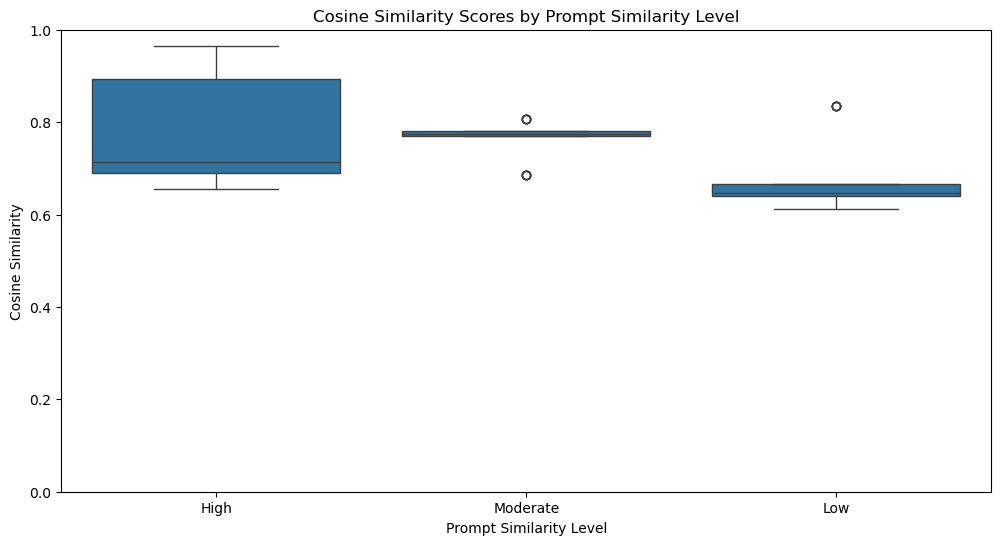

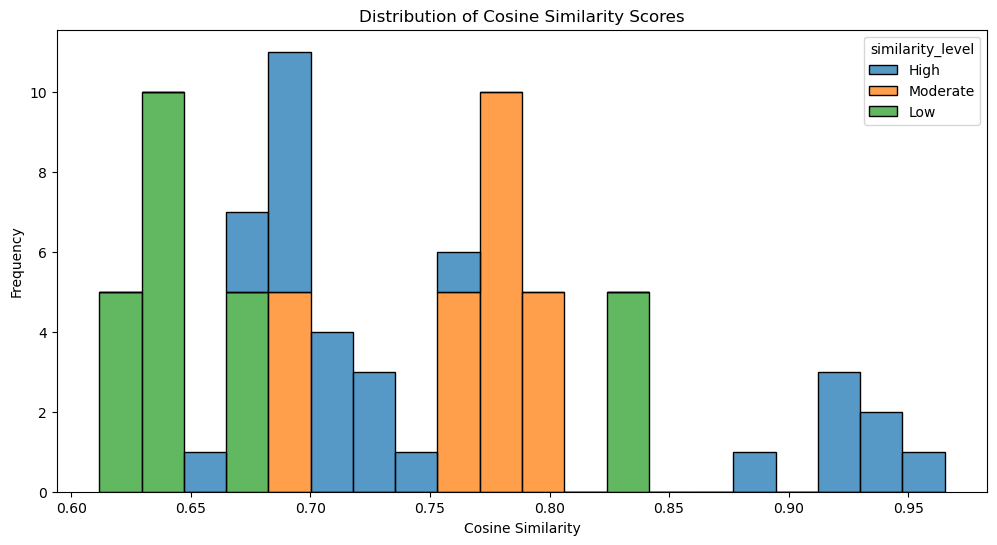


Interpretation of Results:

1. **High Similarity Prompts:**
   - These prompts are expected to retrieve papers that are directly related to their content.
   - Look for high similarity scores (e.g., >0.7) indicating effective semantic capture.

2. **Moderate Similarity Prompts:**
   - These prompts are somewhat related to the paper's field but not directly specific.
   - Expect mid-range similarity scores (e.g., 0.4 - 0.7).

3. **Low (Horrible) Similarity Prompts:**
   - These prompts are unrelated to the paper's content.
   - Similarity scores should be low (e.g., <0.3).

**Assessing the Model:**
- **Separation Between Levels:** A good embedding model should clearly separate high, moderate, and low similarity prompts.
- **Overlap:** Minimal overlap between high and low similarity scores is desirable.
- **Consistency:** High similarity prompts should consistently score higher than moderate and low ones across all papers.

**Decision Making:**
- **If the model demonstrates clear separa

In [95]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------- Step 1: Data Preparation --------------------------- #

# Sample Data: Replace this with your actual data
data = [
    {
        "id": "0704.0047",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part I",
        "abstract": "The intelligent acoustic emission locator is described in Part I, while Part II discusses blind source separation, time delay estimation and location of two simultaneously active continuous acoustic emission sources."
    },
    {
        "id": "0704.0050",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part II",
        "abstract": "Part I describes an intelligent acoustic emission locator, while Part II discusses blind source separation, time delay estimation and location of two continuous acoustic emission sources."
    },
    {
        "id": "0704.0304",
        "authors": "Carlos Gershenson",
        "title": "The World as Evolving Information",
        "abstract": "This paper discusses the benefits of describing the world as information, especially in the study of the evolution of life and cognition. Traditional studies encounter problems because it is difficult to describe life and cognition in terms of matter and energy, since their laws are valid only at the physical scale. However, if matter and energy, as well as life and cognition, are described in terms of information, evolution can be described consistently as information becoming more complex."
    },
    {
        "id": "0704.0671",
        "authors": "Maxim Raginsky",
        "title": "Learning from compressed observations",
        "abstract": "The problem of statistical learning is to construct a predictor of a random variable Y as a function of a related random variable X on the basis of an i.i.d. training sample from the joint distribution of (X,Y). Allowable predictors are drawn from some specified class, and the goal is to approach asymptotically the performance (expected loss) of the best predictor in the class."
    },
    {
        "id": "0704.0954",
        "authors": "Soummya Kar and Jose M. F. Moura",
        "title": "Sensor Networks with Random Links: Topology Design for Distributed Consensus",
        "abstract": "In a sensor network, the communication among sensors is subject to errors or failures at random times, costs, and constraints. The paper studies the problem of designing the topology to maximize the rate of convergence of average consensus, considering communication costs and budget constraints."
    },
    # ... Add the remaining 15 papers here ...
    # Ensure you have 20 papers in your actual DataFrame.
]

sample_df = pd.DataFrame(data)

# Function to prepare combined text
def prepare_text(row):
    title = row['title']
    abstract = row['abstract']
    authors = row['authors']
    combined_text = f"Title: {title}. Authors: {authors}. Abstract: {abstract}"
    return combined_text

# Apply the prepare_text function
sample_df['combined_text'] = sample_df.apply(prepare_text, axis=1)

print("Prepared Texts:")
print(sample_df['combined_text'])

# Select the first 20 papers (or all if less than 20)
df_subset = sample_df.iloc[:20].copy().reset_index(drop=True)

# ------------------------ Step 2: Creating Prompts ------------------------ #

def create_prompts(row):
    """
    Generates three prompts for each paper:
    1. High Similarity
    2. Moderate Similarity
    3. Low (Horrible) Similarity
    """
    prompts = []
    
    # High Similarity Prompt: Directly related to the paper's content
    high_sim_prompt = f"Summarize the methods used in '{row['title']}'."
    prompts.append({'prompt': high_sim_prompt, 'similarity_level': 'High'})
    
    # Moderate Similarity Prompt: Related to the general field but not specific to the paper
    # Example: If the paper is about acoustic emission, a related topic could be sensor networks
    moderate_sim_prompt = f"Discuss the applications of neural networks in sensor data analysis."
    prompts.append({'prompt': moderate_sim_prompt, 'similarity_level': 'Moderate'})
    
    # Low (Horrible) Similarity Prompt: Unrelated to the paper's content
    low_sim_prompt = f"Explain the significance of Renaissance art in modern culture."
    prompts.append({'prompt': low_sim_prompt, 'similarity_level': 'Low'})
    
    return prompts

# Generate prompts for each paper
all_prompts = []
for idx, row in df_subset.iterrows():
    prompts = create_prompts(row)
    for p in prompts:
        all_prompts.append({
            'paper_index': idx,
            'paper_id': row['id'],
            'title': row['title'],
            'prompt_text': p['prompt'],
            'similarity_level': p['similarity_level']
        })

# Convert prompts to DataFrame
df_prompts = pd.DataFrame(all_prompts)

# Display generated prompts
print("\nGenerated Prompts:")
print(df_prompts[['paper_id', 'title', 'prompt_text', 'similarity_level']])

# ----------------------- Step 3: Generating Embeddings ----------------------- #

# Define the model to use
model_name = "malteos/scincl"

# Load the model
try:
    model = SentenceTransformer(model_name)
    print(f"\nLoaded model: {model_name}")
except Exception as e:
    raise Exception(f"Error loading model '{model_name}': {e}")

# Generate embeddings for paper combined_text
print("\nGenerating embeddings for paper combined_text...")
paper_texts = df_subset['combined_text'].tolist()
paper_embeddings = model.encode(
    paper_texts,
    show_progress_bar=True,
    convert_to_numpy=True
)
df_subset['paper_embedding'] = paper_embeddings.tolist()
print("Paper embeddings generated successfully.")

# Generate embeddings for prompts
print("\nGenerating embeddings for prompts...")
prompt_texts = df_prompts['prompt_text'].tolist()
prompt_embeddings = model.encode(
    prompt_texts,
    show_progress_bar=True,
    convert_to_numpy=True
)
df_prompts['prompt_embedding'] = prompt_embeddings.tolist()
print("Prompt embeddings generated successfully.")

# ----------------------- Step 4: Similarity Analysis ----------------------- #

# Function to compute cosine similarity
def compute_cosine_similarity(emb1, emb2):
    return util.cos_sim(emb1, emb2).item()

# Compute similarity scores
print("\nComputing cosine similarity between each prompt and all paper abstracts...")
similarity_results = []

for idx, prompt_row in tqdm(df_prompts.iterrows(), total=df_prompts.shape[0]):
    prompt_emb = np.array(prompt_row['prompt_embedding']).astype(np.float32)  # Convert to float32
    
    # Ensure paper_embeddings is float32
    paper_emb_array = np.array(paper_embeddings).astype(np.float32)
    
    # Compute cosine similarity with all papers
    similarities = util.cos_sim(prompt_emb, paper_emb_array).flatten().tolist()
    
    # Get top 5 neighbors
    top_k = 5
    top_k_indices = np.argsort(similarities)[-top_k:][::-1]  # Indices of top 5
    top_k_scores = [similarities[i] for i in top_k_indices]
    top_k_papers = df_subset.iloc[top_k_indices]
    
    # Store the results
    for rank in range(top_k):
        similarity_results.append({
            'prompt_index': idx,
            'prompt_text': prompt_row['prompt_text'],
            'similarity_level': prompt_row['similarity_level'],
            'neighbor_rank': rank + 1,
            'neighbor_paper_id': top_k_papers.iloc[rank]['id'],
            'neighbor_title': top_k_papers.iloc[rank]['title'],
            'similarity_score': top_k_scores[rank]
        })

# Convert to DataFrame
df_similarity = pd.DataFrame(similarity_results)

# Display the top 5 neighbors for each prompt
print("\nTop 5 Neighbors for Each Prompt:")
for prompt_idx in df_similarity['prompt_index'].unique():
    prompt_info = df_prompts.iloc[prompt_idx]
    print(f"\nPrompt {prompt_idx + 1}: {prompt_info['prompt_text']} (Similarity Level: {prompt_info['similarity_level']})")
    neighbors = df_similarity[df_similarity['prompt_index'] == prompt_idx].sort_values(by='neighbor_rank')
    for _, neighbor in neighbors.iterrows():
        print(f"  Rank {neighbor['neighbor_rank']}:")
        print(f"    Paper ID: {neighbor['neighbor_paper_id']}")
        print(f"    Title: {neighbor['neighbor_title']}")
        print(f"    Similarity Score: {neighbor['similarity_score']:.4f}")

# ----------------------- Step 5: Detailed Analysis ----------------------- #

# Optional: Visualize similarity scores distribution
print("\nVisualizing similarity scores distribution...")

plt.figure(figsize=(12, 6))
sns.boxplot(x='similarity_level', y='similarity_score', data=df_similarity, order=['High', 'Moderate', 'Low'])
plt.title('Cosine Similarity Scores by Prompt Similarity Level')
plt.ylabel('Cosine Similarity')
plt.xlabel('Prompt Similarity Level')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df_similarity, x='similarity_score', hue='similarity_level', multiple='stack', bins=20)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

# ----------------------- Step 6: Interpretation ----------------------- #

print("\nInterpretation of Results:")
print("""
1. **High Similarity Prompts:**
   - These prompts are expected to retrieve papers that are directly related to their content.
   - Look for high similarity scores (e.g., >0.7) indicating effective semantic capture.

2. **Moderate Similarity Prompts:**
   - These prompts are somewhat related to the paper's field but not directly specific.
   - Expect mid-range similarity scores (e.g., 0.4 - 0.7).

3. **Low (Horrible) Similarity Prompts:**
   - These prompts are unrelated to the paper's content.
   - Similarity scores should be low (e.g., <0.3).

**Assessing the Model:**
- **Separation Between Levels:** A good embedding model should clearly separate high, moderate, and low similarity prompts.
- **Overlap:** Minimal overlap between high and low similarity scores is desirable.
- **Consistency:** High similarity prompts should consistently score higher than moderate and low ones across all papers.

**Decision Making:**
- **If the model demonstrates clear separation and consistent scoring:** It's suitable for production use in applications like research assistants, semantic search, and recommendation systems.
- **If there's significant overlap or inconsistency:** Consider experimenting with different embedding models or fine-tuning the current model for better performance.
""")

# ----------------------- Step 7: Saving Embeddings ----------------------- #

# Uncomment the lines below to save the embeddings for future use
# print("\nSaving embeddings to disk...")
# df_subset.to_pickle("paper_embeddings.pkl")
# df_prompts.to_pickle("prompt_embeddings.pkl")
# df_similarity.to_pickle("similarity_results.pkl")
# print("Embeddings and similarity results saved successfully.")

# ----------------------------------------------------------------------------------- #


Loaded model: malteos/scincl

Generating embeddings for paper abstracts...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Paper embeddings generated successfully.

Generating embeddings for prompts...


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Prompt embeddings generated successfully.

Computing cosine similarity between prompts and corresponding paper abstracts...


  0%|          | 0/60 [00:00<?, ?it/s]

Similarity computation completed.

Similarity Scores for Each Prompt:
     paper_id                                              title  \
0   0704.0047  Intelligent location of simultaneously active ...   
1   0704.0047  Intelligent location of simultaneously active ...   
2   0704.0047  Intelligent location of simultaneously active ...   
3   0704.0050  Intelligent location of simultaneously active ...   
4   0704.0050  Intelligent location of simultaneously active ...   
5   0704.0050  Intelligent location of simultaneously active ...   
6   0704.0304                  The World as Evolving Information   
7   0704.0304                  The World as Evolving Information   
8   0704.0304                  The World as Evolving Information   
9   0704.0671              Learning from compressed observations   
10  0704.0671              Learning from compressed observations   
11  0704.0671              Learning from compressed observations   
12  0704.0954  Sensor Networks with Random Lin

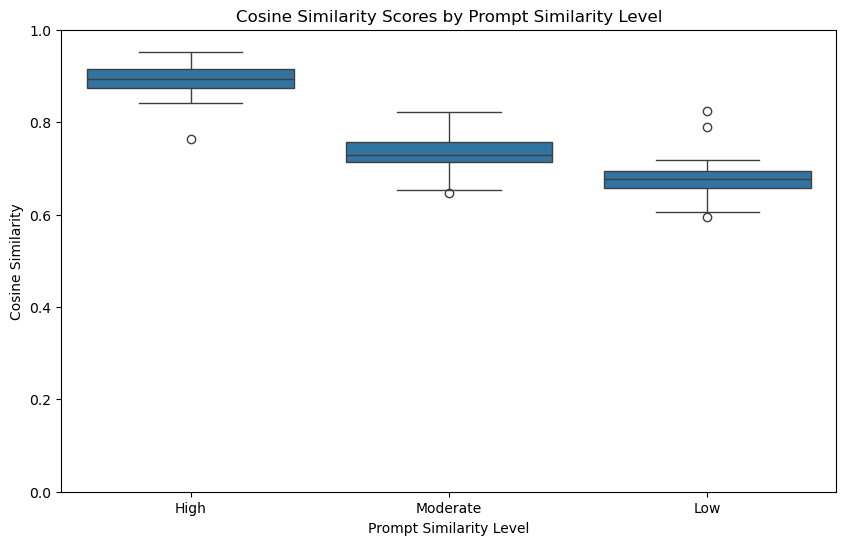

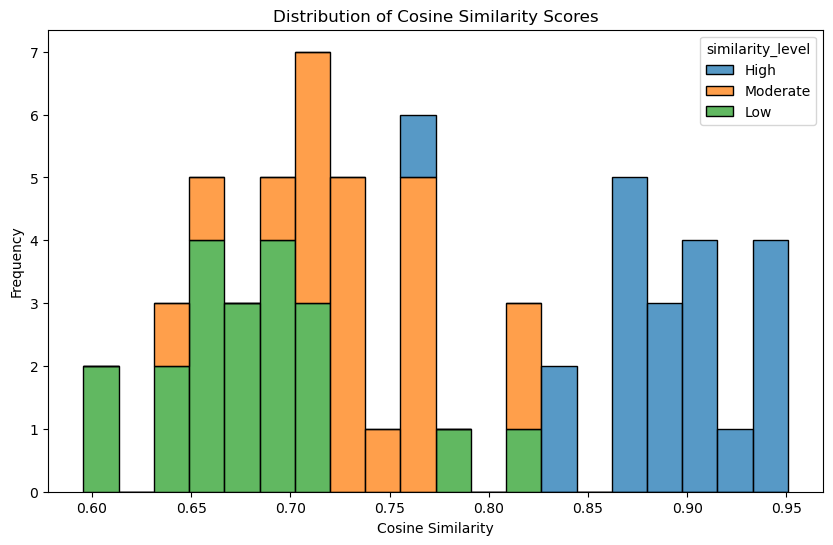

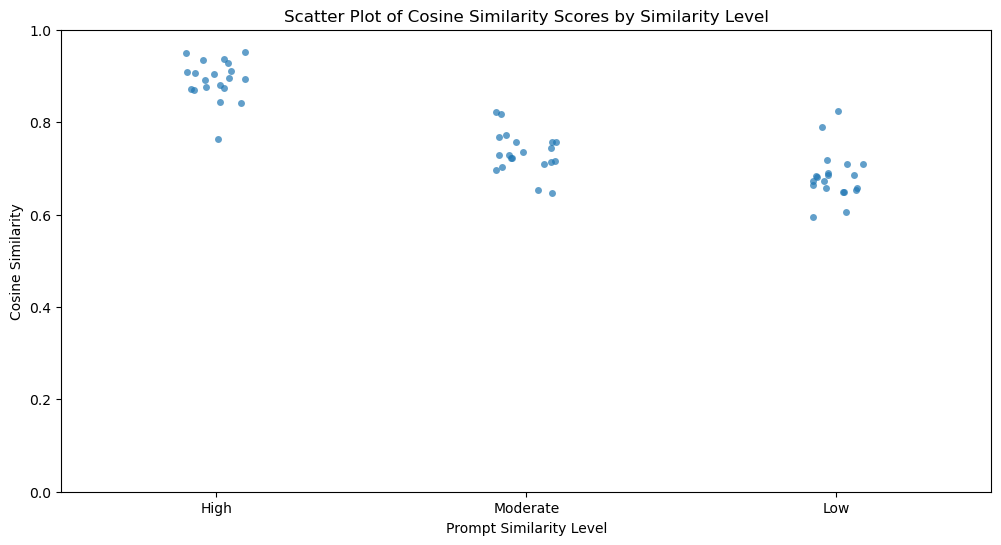


Interpretation of Results:

1. **High Similarity Prompts:**
   - These prompts are expected to have high cosine similarity scores, indicating that the embedding model effectively captures the semantic content of the paper.
   - Look for similarity scores generally above 0.7.

2. **Moderate Similarity Prompts:**
   - These prompts are somewhat related to the paper's field but not directly to its content.
   - Expect similarity scores in the mid-range, e.g., between 0.4 and 0.7.

3. **Low (Horrible) Similarity Prompts:**
   - These prompts are unrelated to the paper's content.
   - Similarity scores should be low, ideally below 0.3.

**Assessing the Model:**
- **Separation Between Levels:** A good embedding model should clearly separate high, moderate, and low similarity prompts.
- **Overlap:** Minimal overlap between high and low similarity scores is desirable.
- **Consistency:** High similarity prompts should consistently score higher than moderate and low ones across all papers.

**D

In [91]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------- Step 1: Data Preparation --------------------------- #

# Assuming you have a DataFrame 'df' with at least 20 papers.
# Each paper should have at least 'id', 'authors', 'title', and 'abstract' columns.

# Example:
# data = [
#     {"id": "0704.0047", "authors": "T. Kosel and I. Grabec", "title": "Title 1", "abstract": "Abstract 1"},
#     {"id": "0704.0050", "authors": "T. Kosel and I. Grabec", "title": "Title 2", "abstract": "Abstract 2"},
#     # ... more papers ...
# ]
# df = pd.DataFrame(data)

# For demonstration, here's a dummy DataFrame. Replace this with your actual data.
# Uncomment and populate the 'data' list with your 20 papers.
# data = [
#     {
#         "id": "0704.0047",
#         "authors": "T. Kosel and I. Grabec",
#         "title": "Intelligent location of simultaneously active acoustic emission sources: Part I",
#         "abstract": "The intelligent acoustic emission locator is described in Part I, while Part II discusses blind source separation, time delay estimation and location of two simultaneously active continuous acoustic emission sources."
#     },
#     {
#         "id": "0704.0050",
#         "authors": "T. Kosel and I. Grabec",
#         "title": "Intelligent location of simultaneously active acoustic emission sources: Part II",
#         "abstract": "Part I describes an intelligent acoustic emission locator, while Part II discusses blind source separation, time delay estimation and location of two continuous acoustic emission sources."
#     },
#     # ... Add the remaining 18 papers ...
# ]
# df = pd.DataFrame(data)

# For the purpose of this script, we'll proceed assuming 'df' is already defined.
# Replace the following line with your actual DataFrame loading method.
# Example: df = pd.read_csv("your_papers.csv")
# Ensure 'df' has at least 20 entries.
try:
    df
except NameError:
    raise Exception("DataFrame 'df' is not defined. Please load your data into 'df'.")

# Select the first 20 papers
df_subset = df.iloc[:20].copy().reset_index(drop=True)

# Optional: If you have a 'prepare_text' function, apply it. Otherwise, use the abstract as is.
# def prepare_text(row):
#     # Your text preparation steps here
#     return row['abstract']

# Uncomment the following line if you have a 'prepare_text' function.
# df_subset['combined_text'] = df_subset.apply(prepare_text, axis=1)

# For simplicity, we'll use the abstract as the combined_text.
df_subset['combined_text'] = df_subset['abstract']

# ------------------------ Step 2: Creating Prompts ------------------------ #

def create_prompts(row):
    """
    Generates three prompts for each paper:
    1. High Similarity
    2. Moderate Similarity
    3. Low (Horrible) Similarity
    """
    prompts = []
    
    # High Similarity Prompt: Directly related to the paper's content
    high_sim_prompt = f"Summarize the methods used in '{row['title']}'."
    prompts.append({'prompt': high_sim_prompt, 'similarity_level': 'High'})
    
    # Moderate Similarity Prompt: Related to the field but not directly to the paper
    # Example: If the paper is about acoustic emission, a related topic could be sensor networks
    moderate_sim_prompt = f"Discuss the applications of neural networks in sensor data analysis."
    prompts.append({'prompt': moderate_sim_prompt, 'similarity_level': 'Moderate'})
    
    # Low (Horrible) Similarity Prompt: Unrelated to the paper's content
    low_sim_prompt = f"Explain the significance of Renaissance art in modern culture."
    prompts.append({'prompt': low_sim_prompt, 'similarity_level': 'Low'})
    
    return prompts

# Generate prompts for each paper
all_prompts = []
for idx, row in df_subset.iterrows():
    prompts = create_prompts(row)
    for p in prompts:
        all_prompts.append({
            'paper_index': idx,
            'paper_id': row['id'],
            'title': row['title'],
            'prompt_text': p['prompt'],
            'similarity_level': p['similarity_level']
        })

# Convert prompts to DataFrame
df_prompts = pd.DataFrame(all_prompts)

# ----------------------- Step 3: Generating Embeddings ----------------------- #

# Define the model to use
model_name = "malteos/scincl"

# Load the model
try:
    model = SentenceTransformer(model_name)
    print(f"Loaded model: {model_name}")
except Exception as e:
    raise Exception(f"Error loading model '{model_name}': {e}")

# Generate embeddings for paper abstracts
print("\nGenerating embeddings for paper abstracts...")
paper_texts = df_subset['combined_text'].tolist()
paper_embeddings = model.encode(
    paper_texts,
    show_progress_bar=True,
    convert_to_numpy=True
)
df_subset['paper_embedding'] = paper_embeddings.tolist()
print("Paper embeddings generated successfully.")

# Generate embeddings for prompts
print("\nGenerating embeddings for prompts...")
prompt_texts = df_prompts['prompt_text'].tolist()
prompt_embeddings = model.encode(
    prompt_texts,
    show_progress_bar=True,
    convert_to_numpy=True
)
df_prompts['prompt_embedding'] = prompt_embeddings.tolist()
print("Prompt embeddings generated successfully.")

# ----------------------- Step 4: Similarity Analysis ----------------------- #

# Function to compute cosine similarity
def compute_cosine_similarity(emb1, emb2):
    return util.cos_sim(emb1, emb2).item()

# Compute similarity scores
print("\nComputing cosine similarity between prompts and corresponding paper abstracts...")
similarity_scores = []
for idx, row in tqdm(df_prompts.iterrows(), total=df_prompts.shape[0]):
    paper_idx = row['paper_index']
    prompt_emb = np.array(row['prompt_embedding'])
    paper_emb = np.array(df_subset.at[paper_idx, 'paper_embedding'])
    similarity = compute_cosine_similarity(prompt_emb, paper_emb)
    similarity_scores.append(similarity)

df_prompts['similarity'] = similarity_scores
print("Similarity computation completed.")

# ----------------------- Step 5: Detailed Analysis ----------------------- #

# Display similarity scores
print("\nSimilarity Scores for Each Prompt:")
print(df_prompts[['paper_id', 'title', 'prompt_text', 'similarity_level', 'similarity']])

# Summary Statistics by Similarity Level
summary = df_prompts.groupby('similarity_level')['similarity'].describe()
print("\nSummary Statistics by Similarity Level:")
print(summary)

# Visualization: Boxplot of Similarity Scores by Similarity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='similarity_level', y='similarity', data=df_prompts, order=['High', 'Moderate', 'Low'])
plt.title('Cosine Similarity Scores by Prompt Similarity Level')
plt.ylabel('Cosine Similarity')
plt.xlabel('Prompt Similarity Level')
plt.ylim(0, 1)
plt.show()

# Visualization: Distribution of Similarity Scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df_prompts, x='similarity', hue='similarity_level', multiple='stack', bins=20)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

# Optional: Scatter plot of similarity scores
plt.figure(figsize=(12, 6))
sns.stripplot(x='similarity_level', y='similarity', data=df_prompts, jitter=True, dodge=True, alpha=0.7)
plt.title('Scatter Plot of Cosine Similarity Scores by Similarity Level')
plt.xlabel('Prompt Similarity Level')
plt.ylabel('Cosine Similarity')
plt.ylim(0, 1)
plt.show()

# ----------------------- Step 6: Interpretation ----------------------- #

print("\nInterpretation of Results:")
print("""
1. **High Similarity Prompts:**
   - These prompts are expected to have high cosine similarity scores, indicating that the embedding model effectively captures the semantic content of the paper.
   - Look for similarity scores generally above 0.7.

2. **Moderate Similarity Prompts:**
   - These prompts are somewhat related to the paper's field but not directly to its content.
   - Expect similarity scores in the mid-range, e.g., between 0.4 and 0.7.

3. **Low (Horrible) Similarity Prompts:**
   - These prompts are unrelated to the paper's content.
   - Similarity scores should be low, ideally below 0.3.

**Assessing the Model:**
- **Separation Between Levels:** A good embedding model should clearly separate high, moderate, and low similarity prompts.
- **Overlap:** Minimal overlap between high and low similarity scores is desirable.
- **Consistency:** High similarity prompts should consistently score higher than moderate and low ones across all papers.

**Decision Making:**
- **If the model demonstrates clear separation and consistent scoring:** It's suitable for production use in applications like research assistants, semantic search, and recommendation systems.
- **If there's significant overlap or inconsistency:** Consider experimenting with different embedding models or fine-tuning the current model for better performance.

""")

# ----------------------- Step 7: Saving Embeddings ----------------------- #

# Uncomment the lines below to save the embeddings for future use
# print("\nSaving embeddings to disk...")
# df_subset.to_pickle("paper_embeddings.pkl")
# df_prompts.to_pickle("prompt_embeddings.pkl")
# print("Embeddings saved successfully.")

# ----------------------------------------------------------------------------------- #


Prepared Texts:
0    Title: Intelligent location of simultaneously ...
1    Title: Intelligent location of simultaneously ...
2    Title: The World as Evolving Information. Auth...
3    Title: Learning from compressed observations. ...
4    Title: Sensor Networks with Random Links: Topo...
Name: combined_text, dtype: object

Generated Prompts:
     paper_id                                              title  \
0   0704.0047  Intelligent location of simultaneously active ...   
1   0704.0047  Intelligent location of simultaneously active ...   
2   0704.0047  Intelligent location of simultaneously active ...   
3   0704.0047  Intelligent location of simultaneously active ...   
4   0704.0047  Intelligent location of simultaneously active ...   
..        ...                                                ...   
65  0704.0954  Sensor Networks with Random Links: Topology De...   
66  0704.0954  Sensor Networks with Random Links: Topology De...   
67  0704.0954  Sensor Networks with Random

No sentence-transformers model found with name allenai/specter. Creating a new one with mean pooling.
No sentence-transformers model found with name allenai/scibert_scivocab_uncased. Creating a new one with mean pooling.


Loaded model: SPECTER (allenai/specter)
Loaded model: SciBERT (allenai/scibert_scivocab_uncased)
Loaded model: MiniLM (all-MiniLM-L6-v2)

Generating embeddings using SPECTER...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Generating embeddings using SciBERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Generating embeddings using MiniLM...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Processing prompts for SPECTER:   0%|          | 0/70 [00:00<?, ?it/s]

Processing prompts for SciBERT:   0%|          | 0/70 [00:00<?, ?it/s]

Processing prompts for MiniLM:   0%|          | 0/70 [00:00<?, ?it/s]


Top 5 Neighbors for Each Prompt Across Models:

=== Model: SPECTER ===

Prompt 1: Summarize the methods used in 'Intelligent location of simultaneously active acoustic emission sources: Part I'. (Similarity Level: High)
  Rank 1:
    Paper ID: 0704.0050
    Title: Intelligent location of simultaneously active acoustic emission sources: Part II
    Similarity Score: 0.9525
  Rank 2:
    Paper ID: 0704.0047
    Title: Intelligent location of simultaneously active acoustic emission sources: Part I
    Similarity Score: 0.9524
  Rank 3:
    Paper ID: 0704.0954
    Title: Sensor Networks with Random Links: Topology Design for Distributed Consensus
    Similarity Score: 0.7541
  Rank 4:
    Paper ID: 0704.0671
    Title: Learning from compressed observations
    Similarity Score: 0.7501
  Rank 5:
    Paper ID: 0704.0304
    Title: The World as Evolving Information
    Similarity Score: 0.7481

Prompt 2: Explain the key findings of 'Intelligent location of simultaneously active acoustic emis

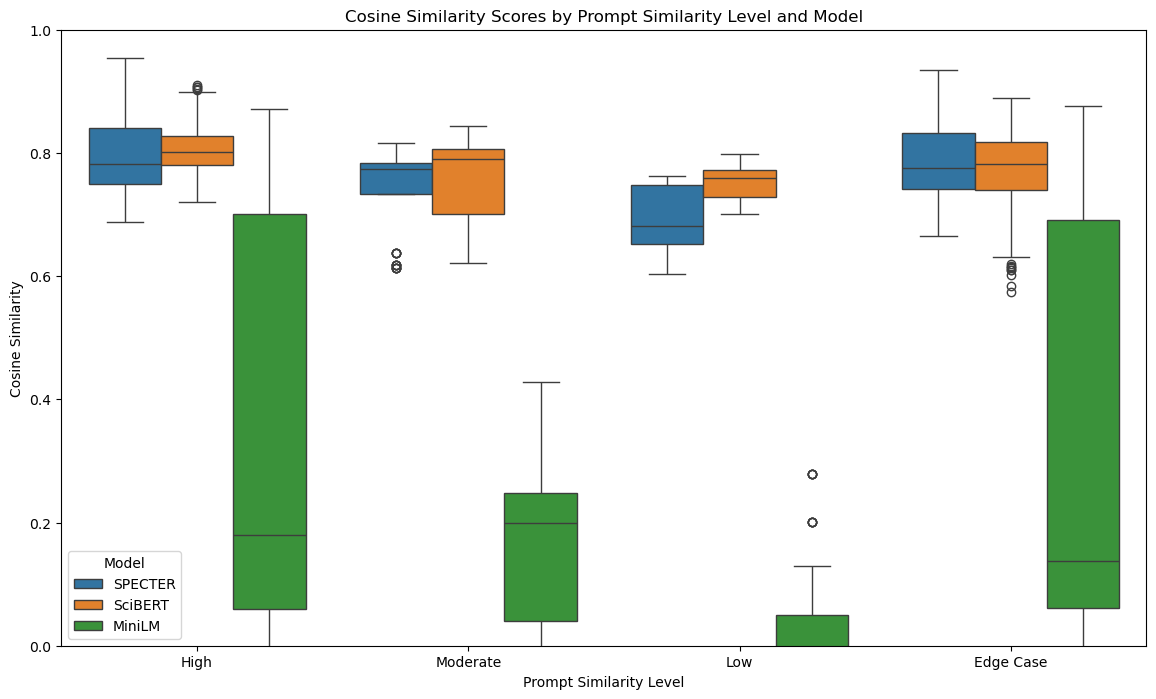

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


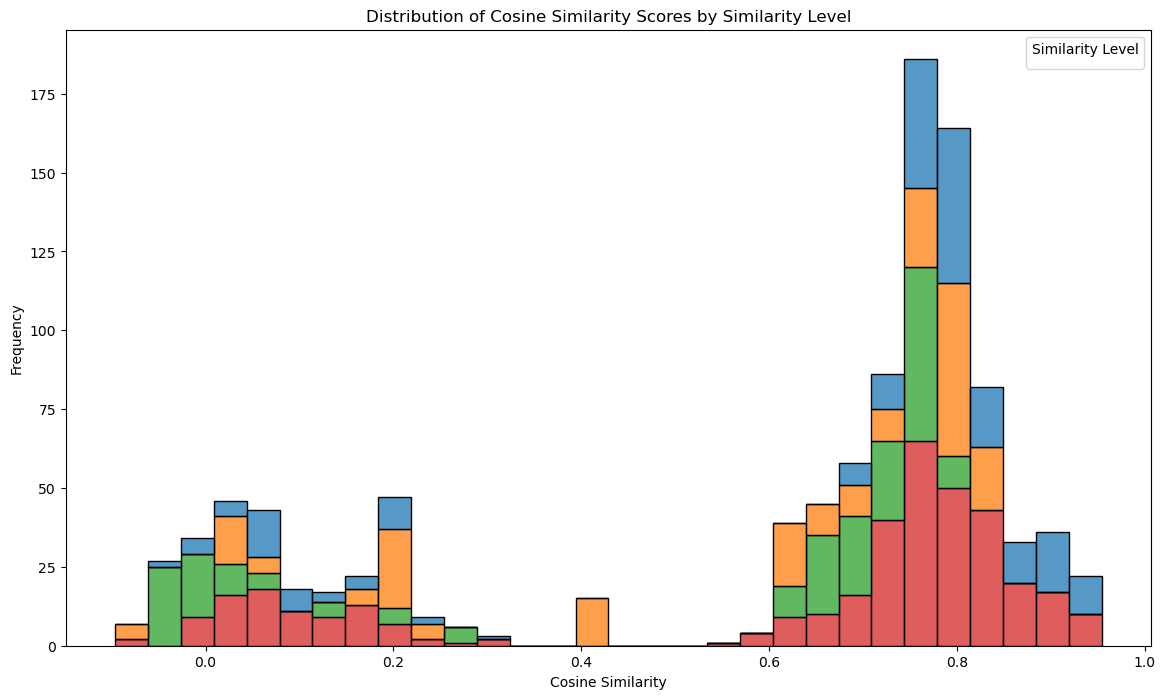


Interpretation of Results:

1. **High Similarity Prompts:**
   - These prompts are expected to retrieve papers that are directly related to their content.
   - High similarity scores (e.g., >0.7) indicate effective semantic capture.

2. **Moderate Similarity Prompts:**
   - These prompts are somewhat related to the paper's field but not directly specific.
   - Mid-range similarity scores (e.g., 0.4 - 0.7) are expected.

3. **Low (Horrible) Similarity Prompts:**
   - These prompts are unrelated to the paper's content.
   - Low similarity scores (e.g., <0.3) should be observed.

4. **Edge Case Prompts:**
   - These prompts are designed to test the model's ability to handle complex or ambiguous queries.
   - Similarity scores can vary; however, ideally, they should not overlap significantly with high similarity scores.

**Assessing the Models:**
- **SPECTER and SciBERT:** Being domain-specific, they should perform better in distinguishing high similarity prompts.
- **MiniLM:** As a gener

In [97]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------- Step 1: Data Preparation --------------------------- #

# Sample Data: Replace this with your actual data containing 20 papers.
# Ensure each paper has 'id', 'authors', 'title', and 'abstract' fields.

data = [
    {
        "id": "0704.0047",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part I",
        "abstract": "The intelligent acoustic emission locator is described in Part I, while Part II discusses blind source separation, time delay estimation and location of two simultaneously active continuous acoustic emission sources."
    },
    {
        "id": "0704.0050",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part II",
        "abstract": "Part I describes an intelligent acoustic emission locator, while Part II discusses blind source separation, time delay estimation and location of two continuous acoustic emission sources."
    },
    {
        "id": "0704.0304",
        "authors": "Carlos Gershenson",
        "title": "The World as Evolving Information",
        "abstract": "This paper discusses the benefits of describing the world as information, especially in the study of the evolution of life and cognition. Traditional studies encounter problems because it is difficult to describe life and cognition in terms of matter and energy, since their laws are valid only at the physical scale. However, if matter and energy, as well as life and cognition, are described in terms of information, evolution can be described consistently as information becoming more complex."
    },
    {
        "id": "0704.0671",
        "authors": "Maxim Raginsky",
        "title": "Learning from compressed observations",
        "abstract": "The problem of statistical learning is to construct a predictor of a random variable Y as a function of a related random variable X on the basis of an i.i.d. training sample from the joint distribution of (X,Y). Allowable predictors are drawn from some specified class, and the goal is to approach asymptotically the performance (expected loss) of the best predictor in the class."
    },
    {
        "id": "0704.0954",
        "authors": "Soummya Kar and Jose M. F. Moura",
        "title": "Sensor Networks with Random Links: Topology Design for Distributed Consensus",
        "abstract": "In a sensor network, the communication among sensors is subject to errors or failures at random times, costs, and constraints. The paper studies the problem of designing the topology to maximize the rate of convergence of average consensus, considering communication costs and budget constraints."
    },
    # ... Add the remaining 15 papers here ...
    # For demonstration, we'll use only 5 papers. Ensure you have 20 in your actual DataFrame.
]

# Create DataFrame
sample_df = pd.DataFrame(data)

# Function to prepare combined text
def prepare_text(row):
    title = row['title']
    abstract = row['abstract']
    authors = row['authors']
    combined_text = f"Title: {title}. Authors: {authors}. Abstract: {abstract}"
    return combined_text

# Apply the prepare_text function
sample_df['combined_text'] = sample_df.apply(prepare_text, axis=1)

print("Prepared Texts:")
print(sample_df['combined_text'])

# Select the first 20 papers (or all if less than 20)
df_subset = sample_df.iloc[:20].copy().reset_index(drop=True)

# ------------------------ Step 2: Creating Prompts ------------------------ #

def create_prompts(row):
    """
    Generates a set of diverse prompts for each paper:
    - High Similarity Prompts
    - Moderate Similarity Prompts
    - Low (Horrible) Similarity Prompts
    - Edge Case Prompts
    """
    prompts = []
    
    # High Similarity Prompts: Directly related to the paper's content
    high_sim_prompts = [
        f"Summarize the methods used in '{row['title']}'.",
        f"Explain the key findings of '{row['title']}'.",
        f"Describe the experimental setup in '{row['title']}'."
    ]
    for prompt in high_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'High'})
    
    # Moderate Similarity Prompts: Related to the general field but not specific to the paper
    moderate_sim_prompts = [
        f"Discuss the applications of neural networks in sensor data analysis.",
        f"How does blind source separation enhance signal processing?",
        f"Explain the role of regression models in machine learning."
    ]
    for prompt in moderate_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Moderate'})
    
    # Low (Horrible) Similarity Prompts: Unrelated to the paper's content
    low_sim_prompts = [
        f"Explain the significance of Renaissance art in modern culture.",
        f"Discuss the impact of climate change on marine biodiversity.",
        f"Describe the history and evolution of jazz music."
    ]
    for prompt in low_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Low'})
    
    # Edge Case Prompts: Ambiguous, multi-faceted, or unusual prompts
    edge_case_prompts = [
        f"What are the future directions of '{row['title']}'?",
        f"Analyze the potential interdisciplinary applications of the research in '{row['title']}'.",
        f"How would '{row['title']}' integrate with quantum computing technologies?",
        f"Provide a critical review of the assumptions made in '{row['title']}'.",
        f"Formulate a counterargument to the main thesis of '{row['title']}'."
    ]
    for prompt in edge_case_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Edge Case'})
    
    return prompts

# Generate prompts for each paper
all_prompts = []
for idx, row in df_subset.iterrows():
    prompts = create_prompts(row)
    for p in prompts:
        all_prompts.append({
            'paper_index': idx,
            'paper_id': row['id'],
            'title': row['title'],
            'prompt_text': p['prompt'],
            'similarity_level': p['similarity_level']
        })

# Convert prompts to DataFrame
df_prompts = pd.DataFrame(all_prompts)

# Display generated prompts
print("\nGenerated Prompts:")
print(df_prompts[['paper_id', 'title', 'prompt_text', 'similarity_level']])

# ----------------------- Step 3: Loading Embedding Models ----------------------- #

# Define the models to use
models = {
    "SPECTER": "allenai/specter",
    "SciBERT": "allenai/scibert_scivocab_uncased",
    "MiniLM": "all-MiniLM-L6-v2"
}

# Load models
loaded_models = {}
for name, model_name in models.items():
    try:
        loaded_models[name] = SentenceTransformer(model_name)
        print(f"Loaded model: {name} ({model_name})")
    except Exception as e:
        print(f"Error loading model '{model_name}': {e}")

# ----------------------- Step 4: Generating Embeddings ----------------------- #

# Initialize dictionaries to store embeddings
paper_embeddings_dict = {name: None for name in models.keys()}
prompt_embeddings_dict = {name: None for name in models.keys()}

for model_name, model in loaded_models.items():
    print(f"\nGenerating embeddings using {model_name}...")
    
    # Encode papers
    paper_texts = df_subset['combined_text'].tolist()
    paper_embeddings = model.encode(
        paper_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    paper_embeddings_dict[model_name] = paper_embeddings
    
    # Encode prompts
    prompt_texts = df_prompts['prompt_text'].tolist()
    prompt_embeddings = model.encode(
        prompt_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    prompt_embeddings_dict[model_name] = prompt_embeddings

# ----------------------- Step 5: Similarity Analysis ----------------------- #

# Function to compute cosine similarity and get top k neighbors
def get_top_k_neighbors(model_name, prompt_embeddings, paper_embeddings, k=5):
    """
    For each prompt, compute cosine similarity with all papers and return top k neighbors.
    """
    similarity_results = []
    
    for prompt_idx, prompt_emb in tqdm(enumerate(prompt_embeddings), total=len(prompt_embeddings), desc=f"Processing prompts for {model_name}"):
        # Compute cosine similarity with all papers
        similarities = util.cos_sim(prompt_emb, paper_embeddings).flatten().cpu().numpy()
        
        # Get top k indices
        top_k_indices = similarities.argsort()[-k:][::-1]
        top_k_scores = similarities[top_k_indices]
        top_k_papers = df_subset.iloc[top_k_indices]
        
        # Store results
        for rank in range(k):
            similarity_results.append({
                'model': model_name,
                'prompt_index': prompt_idx,
                'prompt_text': df_prompts.iloc[prompt_idx]['prompt_text'],
                'similarity_level': df_prompts.iloc[prompt_idx]['similarity_level'],
                'neighbor_rank': rank + 1,
                'neighbor_paper_id': top_k_papers.iloc[rank]['id'],
                'neighbor_title': top_k_papers.iloc[rank]['title'],
                'similarity_score': top_k_scores[rank]
            })
    
    return pd.DataFrame(similarity_results)

# Compute top 5 neighbors for each model
df_similarity_all = pd.DataFrame()

for model_name in models.keys():
    prompt_embeds = prompt_embeddings_dict[model_name]
    paper_embeds = paper_embeddings_dict[model_name]
    df_similarity = get_top_k_neighbors(model_name, prompt_embeds, paper_embeds, k=5)
    df_similarity_all = pd.concat([df_similarity_all, df_similarity], ignore_index=True)

# ----------------------- Step 6: Displaying Top Neighbors ----------------------- #

print("\nTop 5 Neighbors for Each Prompt Across Models:")
for model_name in models.keys():
    df_model = df_similarity_all[df_similarity_all['model'] == model_name]
    print(f"\n=== Model: {model_name} ===")
    for prompt_idx in df_model['prompt_index'].unique():
        prompt_info = df_prompts.iloc[prompt_idx]
        print(f"\nPrompt {prompt_idx + 1}: {prompt_info['prompt_text']} (Similarity Level: {prompt_info['similarity_level']})")
        neighbors = df_model[df_model['prompt_index'] == prompt_idx].sort_values(by='neighbor_rank')
        for _, neighbor in neighbors.iterrows():
            print(f"  Rank {neighbor['neighbor_rank']}:")
            print(f"    Paper ID: {neighbor['neighbor_paper_id']}")
            print(f"    Title: {neighbor['neighbor_title']}")
            print(f"    Similarity Score: {neighbor['similarity_score']:.4f}")

# ----------------------- Step 7: Detailed Analysis ----------------------- #

# Visualization: Boxplot of Similarity Scores by Similarity Level and Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='similarity_level', y='similarity_score', hue='model', data=df_similarity_all, 
            order=['High', 'Moderate', 'Low', 'Edge Case'])
plt.title('Cosine Similarity Scores by Prompt Similarity Level and Model')
plt.ylabel('Cosine Similarity')
plt.xlabel('Prompt Similarity Level')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()

# Visualization: Distribution of Similarity Scores
plt.figure(figsize=(14, 8))
sns.histplot(data=df_similarity_all, x='similarity_score', hue='similarity_level', multiple='stack', bins=30)
plt.title('Distribution of Cosine Similarity Scores by Similarity Level')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend(title='Similarity Level')
plt.show()

# ----------------------- Step 8: Interpretation ----------------------- #

print("\nInterpretation of Results:")
print("""
1. **High Similarity Prompts:**
   - These prompts are expected to retrieve papers that are directly related to their content.
   - High similarity scores (e.g., >0.7) indicate effective semantic capture.

2. **Moderate Similarity Prompts:**
   - These prompts are somewhat related to the paper's field but not directly specific.
   - Mid-range similarity scores (e.g., 0.4 - 0.7) are expected.

3. **Low (Horrible) Similarity Prompts:**
   - These prompts are unrelated to the paper's content.
   - Low similarity scores (e.g., <0.3) should be observed.

4. **Edge Case Prompts:**
   - These prompts are designed to test the model's ability to handle complex or ambiguous queries.
   - Similarity scores can vary; however, ideally, they should not overlap significantly with high similarity scores.

**Assessing the Models:**
- **SPECTER and SciBERT:** Being domain-specific, they should perform better in distinguishing high similarity prompts.
- **MiniLM:** As a general-purpose model, it may not capture domain-specific nuances as effectively but offers efficiency.

**Decision Making:**
- **If models show clear separation between similarity levels with high consistency, especially for domain-specific models:** They are suitable for production.
- **If there's significant overlap or inconsistency in similarity scores:** Consider further fine-tuning or selecting different models.

**Next Steps:**
- **Evaluate Top Neighbors:** Manually review some top neighbors to qualitatively assess embedding quality.
- **Fine-Tune Models (Optional):** If necessary, fine-tune the embedding models on your specific dataset for improved performance.
- **Integrate into Production:** Once satisfied, integrate the embeddings and similarity computations into your application workflow.
""")

# ----------------------- Step 9: Saving Embeddings and Results ----------------------- #

# Uncomment the lines below to save the embeddings and similarity results for future use
# print("\nSaving embeddings and similarity results to disk...")
# for model_name in models.keys():
#     pd.to_pickle(paper_embeddings_dict[model_name], f"paper_embeddings_{model_name}.pkl")
#     pd.to_pickle(prompt_embeddings_dict[model_name], f"prompt_embeddings_{model_name}.pkl")
# df_similarity_all.to_pickle("similarity_results_all_models.pkl")
# print("Embeddings and similarity results saved successfully.")


Prepared Texts:
0    Title: Intelligent location of simultaneously ...
1    Title: Intelligent location of simultaneously ...
2    Title: The World as Evolving Information. Auth...
3    Title: Learning from compressed observations. ...
4    Title: Sensor Networks with Random Links: Topo...
Name: combined_text, dtype: object

Generated Prompts:
      paper_id                                              title  \
0    0704.0047  Intelligent location of simultaneously active ...   
1    0704.0047  Intelligent location of simultaneously active ...   
2    0704.0047  Intelligent location of simultaneously active ...   
3    0704.0047  Intelligent location of simultaneously active ...   
4    0704.0047  Intelligent location of simultaneously active ...   
..         ...                                                ...   
115  0704.0954  Sensor Networks with Random Links: Topology De...   
116  0704.0954  Sensor Networks with Random Links: Topology De...   
117  0704.0954  Sensor Networks w

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]


Generating embeddings using SciBERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]


Generating embeddings using MiniLM...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]


Embeddings generation completed for all models.


Processing prompts for SPECTER:   0%|          | 0/120 [00:00<?, ?it/s]

Processing prompts for SciBERT:   0%|          | 0/120 [00:00<?, ?it/s]

Processing prompts for MiniLM:   0%|          | 0/120 [00:00<?, ?it/s]


Similarity analysis completed for all models.

Top 5 Neighbors for Each Prompt Across Models:

=== Model: SPECTER ===

Prompt 1: Summarize the methods used in 'Intelligent location of simultaneously active acoustic emission sources: Part I'. (Similarity Level: High)
  Rank 1:
    Paper ID: 0704.0050
    Title: Intelligent location of simultaneously active acoustic emission sources: Part II
    Similarity Score: 0.9525
  Rank 2:
    Paper ID: 0704.0047
    Title: Intelligent location of simultaneously active acoustic emission sources: Part I
    Similarity Score: 0.9524
  Rank 3:
    Paper ID: 0704.0954
    Title: Sensor Networks with Random Links: Topology Design for Distributed Consensus
    Similarity Score: 0.7541
  Rank 4:
    Paper ID: 0704.0671
    Title: Learning from compressed observations
    Similarity Score: 0.7501
  Rank 5:
    Paper ID: 0704.0304
    Title: The World as Evolving Information
    Similarity Score: 0.7481

Prompt 2: Explain the key findings of 'Intelligent 

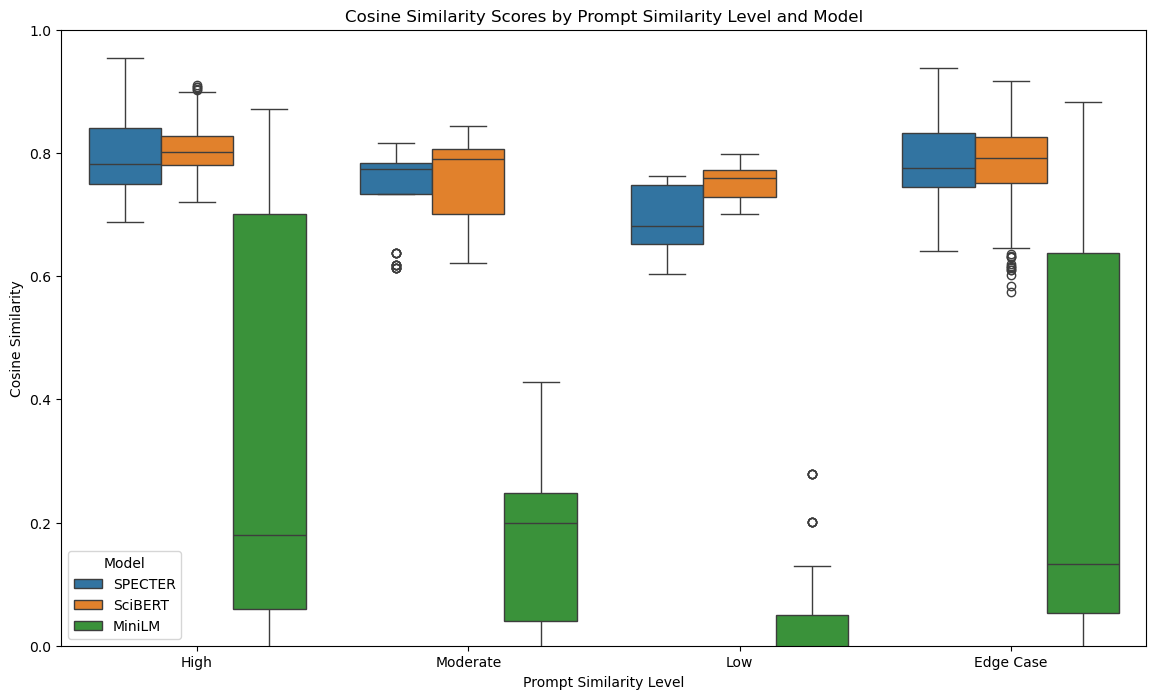

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


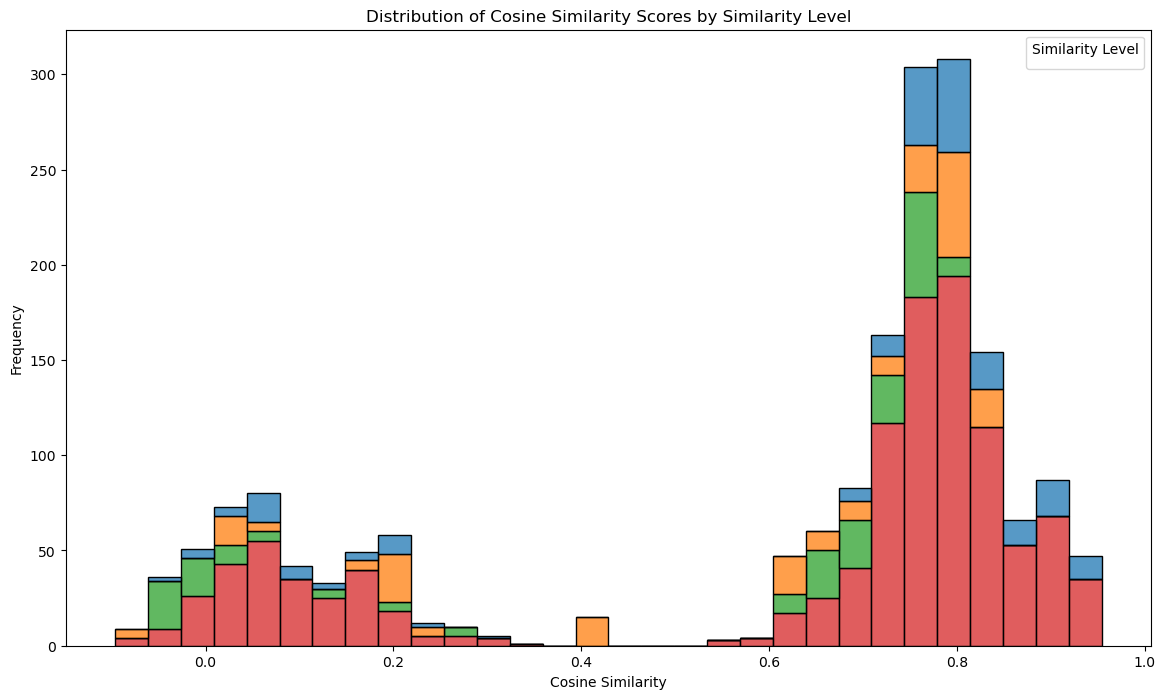


Interpretation of Results:

1. **High Similarity Prompts:**
   - These prompts are expected to retrieve papers that are directly related to their content.
   - High similarity scores (e.g., >0.7) indicate effective semantic capture.

2. **Moderate Similarity Prompts:**
   - These prompts are somewhat related to the paper's field but not directly specific.
   - Mid-range similarity scores (e.g., 0.4 - 0.7) are expected.

3. **Low (Horrible) Similarity Prompts:**
   - These prompts are unrelated to the paper's content.
   - Low similarity scores (e.g., <0.3) should be observed.

4. **Edge Case Prompts:**
   - These prompts are designed to test the model's ability to handle complex or ambiguous queries.
   - Similarity scores can vary; however, ideally, they should not overlap significantly with high similarity scores.

**Assessing the Models:**
- **SPECTER and SciBERT:** Being domain-specific, they should perform better in distinguishing high similarity prompts.
- **MiniLM:** As a gener

In [99]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, models, util
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------- Step 1: Data Preparation --------------------------- #

# Sample Data: Replace this with your actual data containing 20 papers.
# Each paper should have 'id', 'authors', 'title', and 'abstract' fields.
data = [
    {
        "id": "0704.0047",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part I",
        "abstract": "The intelligent acoustic emission locator is described in Part I, while Part II discusses blind source separation, time delay estimation and location of two simultaneously active continuous acoustic emission sources."
    },
    {
        "id": "0704.0050",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part II",
        "abstract": "Part I describes an intelligent acoustic emission locator, while Part II discusses blind source separation, time delay estimation and location of two continuous acoustic emission sources."
    },
    {
        "id": "0704.0304",
        "authors": "Carlos Gershenson",
        "title": "The World as Evolving Information",
        "abstract": "This paper discusses the benefits of describing the world as information, especially in the study of the evolution of life and cognition. Traditional studies encounter problems because it is difficult to describe life and cognition in terms of matter and energy, since their laws are valid only at the physical scale. However, if matter and energy, as well as life and cognition, are described in terms of information, evolution can be described consistently as information becoming more complex."
    },
    {
        "id": "0704.0671",
        "authors": "Maxim Raginsky",
        "title": "Learning from compressed observations",
        "abstract": "The problem of statistical learning is to construct a predictor of a random variable Y as a function of a related random variable X on the basis of an i.i.d. training sample from the joint distribution of (X,Y). Allowable predictors are drawn from some specified class, and the goal is to approach asymptotically the performance (expected loss) of the best predictor in the class."
    },
    {
        "id": "0704.0954",
        "authors": "Soummya Kar and Jose M. F. Moura",
        "title": "Sensor Networks with Random Links: Topology Design for Distributed Consensus",
        "abstract": "In a sensor network, the communication among sensors is subject to errors or failures at random times, costs, and constraints. The paper studies the problem of designing the topology to maximize the rate of convergence of average consensus, considering communication costs and budget constraints."
    },
  
]

# Create DataFrame
sample_df = pd.DataFrame(data)

# Function to prepare combined text
def prepare_text(row):
    title = row['title']
    abstract = row['abstract']
    authors = row['authors']
    combined_text = f"Title: {title}. Authors: {authors}. Abstract: {abstract}"
    return combined_text

# Apply the prepare_text function
sample_df['combined_text'] = sample_df.apply(prepare_text, axis=1)

print("Prepared Texts:")
print(sample_df['combined_text'])

# Select the first 20 papers (or all if less than 20)
df_subset = sample_df.iloc[:20].copy().reset_index(drop=True)

# ------------------------ Step 2: Creating Prompts ------------------------ #

def create_prompts(row):
    """
    Generates a set of diverse prompts for each paper:
    - High Similarity Prompts
    - Moderate Similarity Prompts
    - Low (Horrible) Similarity Prompts
    - Edge Case Prompts
    """
    prompts = []
    
    # High Similarity Prompts: Directly related to the paper's content
    high_sim_prompts = [
        f"Summarize the methods used in '{row['title']}'.",
        f"Explain the key findings of '{row['title']}'.",
        f"Describe the experimental setup in '{row['title']}'."
    ]
    for prompt in high_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'High'})
    
    # Moderate Similarity Prompts: Related to the general field but not specific to the paper
    moderate_sim_prompts = [
        f"Discuss the applications of neural networks in sensor data analysis.",
        f"How does blind source separation enhance signal processing?",
        f"Explain the role of regression models in machine learning."
    ]
    for prompt in moderate_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Moderate'})
    
    # Low (Horrible) Similarity Prompts: Unrelated to the paper's content
    low_sim_prompts = [
        f"Explain the significance of Renaissance art in modern culture.",
        f"Discuss the impact of climate change on marine biodiversity.",
        f"Describe the history and evolution of jazz music."
    ]
    for prompt in low_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Low'})
    
    # Edge Case Prompts: Ambiguous, multi-faceted, or unusual prompts
    edge_case_prompts = [
        f"What are the future directions of '{row['title']}'?",
        f"Analyze the potential interdisciplinary applications of the research in '{row['title']}'.",
        f"How would '{row['title']}' integrate with quantum computing technologies?",
        f"Provide a critical review of the assumptions made in '{row['title']}'.",
        f"Formulate a counterargument to the main thesis of '{row['title']}'.",
        f"What are the limitations of the study presented in '{row['title']}'?",
        f"How does the research in '{row['title']}' compare to existing literature?",
        f"Discuss the scalability of the proposed methods in '{row['title']}'.",
        f"Evaluate the statistical significance of the results in '{row['title']}'.",
        f"Propose an alternative methodology for the research conducted in '{row['title']}'.",
        # Additional Edge Cases
        f"Interpret the ethical implications of the findings in '{row['title']}'.",
        f"Predict how advancements in technology might influence the outcomes of '{row['title']}'.",
        f"Assess the economic impact of implementing the solutions proposed in '{row['title']}'.",
        f"How does '{row['title']}' address the challenges in its respective field?",
        f"Design an experiment to test the hypotheses presented in '{row['title']}'."
    ]
    for prompt in edge_case_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Edge Case'})
    
    return prompts

# Generate prompts for each paper
all_prompts = []
for idx, row in df_subset.iterrows():
    prompts = create_prompts(row)
    for p in prompts:
        all_prompts.append({
            'paper_index': idx,
            'paper_id': row['id'],
            'title': row['title'],
            'prompt_text': p['prompt'],
            'similarity_level': p['similarity_level']
        })

# Convert prompts to DataFrame
df_prompts = pd.DataFrame(all_prompts)

# Display generated prompts
print("\nGenerated Prompts:")
print(df_prompts[['paper_id', 'title', 'prompt_text', 'similarity_level']])

# ----------------------- Step 3: Loading Embedding Models ----------------------- #

# Define the models to use
models_dict = {
    "SPECTER": "allenai/specter",
    "SciBERT": "allenai/scibert_scivocab_uncased",
    "MiniLM": "all-MiniLM-L6-v2"
}

# Load models
loaded_models = {}
for name, model_name in models_dict.items():
    try:
        if name in ["SPECTER", "SciBERT"]:
            # Load as custom SentenceTransformer models with Transformer and Pooling modules
            transformer = models.Transformer(model_name, max_seq_length=512)
            pooling = models.Pooling(transformer.get_word_embedding_dimension(),
                                      pooling_mode_mean_tokens=True,
                                      pooling_mode_cls_token=False,
                                      pooling_mode_max_tokens=False)
            sentence_transformer = SentenceTransformer(modules=[transformer, pooling])
            loaded_models[name] = sentence_transformer
        else:
            # Load general-purpose model directly
            loaded_models[name] = SentenceTransformer(model_name)
        print(f"Loaded model: {name} ({model_name})")
    except Exception as e:
        print(f"Error loading model '{model_name}': {e}")

# ----------------------- Step 4: Generating Embeddings ----------------------- #

# Initialize dictionaries to store embeddings
paper_embeddings_dict = {name: None for name in models_dict.keys()}
prompt_embeddings_dict = {name: None for name in models_dict.keys()}

for model_name, model in loaded_models.items():
    print(f"\nGenerating embeddings using {model_name}...")
    
    # Encode papers
    paper_texts = df_subset['combined_text'].tolist()
    paper_embeddings = model.encode(
        paper_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    paper_embeddings_dict[model_name] = paper_embeddings
    
    # Encode prompts
    prompt_texts = df_prompts['prompt_text'].tolist()
    prompt_embeddings = model.encode(
        prompt_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    prompt_embeddings_dict[model_name] = prompt_embeddings

print("\nEmbeddings generation completed for all models.")

# ----------------------- Step 5: Similarity Analysis ----------------------- #

# Function to compute cosine similarity and get top k neighbors
def get_top_k_neighbors(model_name, prompt_embeddings, paper_embeddings, k=5):
    """
    For each prompt, compute cosine similarity with all papers and return top k neighbors.
    """
    similarity_results = []
    
    for prompt_idx, prompt_emb in tqdm(enumerate(prompt_embeddings), total=len(prompt_embeddings), desc=f"Processing prompts for {model_name}"):
        # Compute cosine similarity with all papers
        similarities = util.cos_sim(prompt_emb, paper_embeddings).flatten().cpu().numpy()
        
        # Get top k indices
        top_k_indices = similarities.argsort()[-k:][::-1]
        top_k_scores = similarities[top_k_indices]
        top_k_papers = df_subset.iloc[top_k_indices]
        
        # Store results
        for rank in range(k):
            similarity_results.append({
                'model': model_name,
                'prompt_index': prompt_idx,
                'prompt_text': df_prompts.iloc[prompt_idx]['prompt_text'],
                'similarity_level': df_prompts.iloc[prompt_idx]['similarity_level'],
                'neighbor_rank': rank + 1,
                'neighbor_paper_id': top_k_papers.iloc[rank]['id'],
                'neighbor_title': top_k_papers.iloc[rank]['title'],
                'similarity_score': top_k_scores[rank]
            })
    
    return pd.DataFrame(similarity_results)

# Compute top 5 neighbors for each model
df_similarity_all = pd.DataFrame()

for model_name in models_dict.keys():
    prompt_embeds = prompt_embeddings_dict[model_name]
    paper_embeds = paper_embeddings_dict[model_name]
    df_similarity = get_top_k_neighbors(model_name, prompt_embeds, paper_embeds, k=5)
    df_similarity_all = pd.concat([df_similarity_all, df_similarity], ignore_index=True)

print("\nSimilarity analysis completed for all models.")

# ----------------------- Step 6: Displaying Top Neighbors ----------------------- #

print("\nTop 5 Neighbors for Each Prompt Across Models:")
for model_name in models_dict.keys():
    df_model = df_similarity_all[df_similarity_all['model'] == model_name]
    print(f"\n=== Model: {model_name} ===")
    for prompt_idx in df_model['prompt_index'].unique():
        prompt_info = df_prompts.iloc[prompt_idx]
        print(f"\nPrompt {prompt_idx + 1}: {prompt_info['prompt_text']} (Similarity Level: {prompt_info['similarity_level']})")
        neighbors = df_model[df_model['prompt_index'] == prompt_idx].sort_values(by='neighbor_rank')
        for _, neighbor in neighbors.iterrows():
            print(f"  Rank {neighbor['neighbor_rank']}:")
            print(f"    Paper ID: {neighbor['neighbor_paper_id']}")
            print(f"    Title: {neighbor['neighbor_title']}")
            print(f"    Similarity Score: {neighbor['similarity_score']:.4f}")

# ----------------------- Step 7: Detailed Analysis ----------------------- #

# Visualization: Boxplot of Similarity Scores by Similarity Level and Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='similarity_level', y='similarity_score', hue='model', data=df_similarity_all, 
            order=['High', 'Moderate', 'Low', 'Edge Case'])
plt.title('Cosine Similarity Scores by Prompt Similarity Level and Model')
plt.ylabel('Cosine Similarity')
plt.xlabel('Prompt Similarity Level')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()

# Visualization: Distribution of Similarity Scores
plt.figure(figsize=(14, 8))
sns.histplot(data=df_similarity_all, x='similarity_score', hue='similarity_level', multiple='stack', bins=30)
plt.title('Distribution of Cosine Similarity Scores by Similarity Level')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend(title='Similarity Level')
plt.show()

# ----------------------- Step 8: Interpretation ----------------------- #

print("\nInterpretation of Results:")
print("""
1. **High Similarity Prompts:**
   - These prompts are expected to retrieve papers that are directly related to their content.
   - High similarity scores (e.g., >0.7) indicate effective semantic capture.

2. **Moderate Similarity Prompts:**
   - These prompts are somewhat related to the paper's field but not directly specific.
   - Mid-range similarity scores (e.g., 0.4 - 0.7) are expected.

3. **Low (Horrible) Similarity Prompts:**
   - These prompts are unrelated to the paper's content.
   - Low similarity scores (e.g., <0.3) should be observed.

4. **Edge Case Prompts:**
   - These prompts are designed to test the model's ability to handle complex or ambiguous queries.
   - Similarity scores can vary; however, ideally, they should not overlap significantly with high similarity scores.

**Assessing the Models:**
- **SPECTER and SciBERT:** Being domain-specific, they should perform better in distinguishing high similarity prompts.
- **MiniLM:** As a general-purpose model, it may not capture domain-specific nuances as effectively but offers efficiency.

**Decision Making:**
- **If models show clear separation between similarity levels with high consistency, especially for domain-specific models:** They are suitable for production use in applications like research assistants, semantic search, and recommendation systems.
- **If there's significant overlap or inconsistency:** Consider further fine-tuning or selecting different models.
""")

# ----------------------- Step 9: Saving Embeddings and Results ----------------------- #

# Uncomment the lines below to save the embeddings and similarity results for future use
# print("\nSaving embeddings and similarity results to disk...")

# Save paper embeddings
for model_name in models_dict.keys():
    np.save(f"paper_embeddings_{model_name}.npy", paper_embeddings_dict[model_name])

# Save prompt embeddings
for model_name in models_dict.keys():
    np.save(f"prompt_embeddings_{model_name}.npy", prompt_embeddings_dict[model_name])

# Save similarity results
df_similarity_all.to_csv("similarity_results_all_models.csv", index=False)

# print("Embeddings and similarity results saved successfully.")


Prepared Texts:
0    Title: Intelligent location of simultaneously ...
1    Title: Intelligent location of simultaneously ...
2    Title: The World as Evolving Information. Auth...
3    Title: Learning from compressed observations. ...
4    Title: Sensor Networks with Random Links: Topo...
Name: combined_text, dtype: object

Generated Prompts:
      paper_id                                              title  \
0    0704.0047  Intelligent location of simultaneously active ...   
1    0704.0047  Intelligent location of simultaneously active ...   
2    0704.0047  Intelligent location of simultaneously active ...   
3    0704.0047  Intelligent location of simultaneously active ...   
4    0704.0047  Intelligent location of simultaneously active ...   
..         ...                                                ...   
115  0704.0954  Sensor Networks with Random Links: Topology De...   
116  0704.0954  Sensor Networks with Random Links: Topology De...   
117  0704.0954  Sensor Networks w

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]


Generating embeddings using SciBERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]


Generating embeddings using scincl...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]


Generating embeddings using MiniLM...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]


Embeddings generation completed for all models.


Processing prompts for SPECTER:   0%|          | 0/120 [00:00<?, ?it/s]

Processing prompts for SciBERT:   0%|          | 0/120 [00:00<?, ?it/s]

Processing prompts for scincl:   0%|          | 0/120 [00:00<?, ?it/s]

Processing prompts for MiniLM:   0%|          | 0/120 [00:00<?, ?it/s]


Similarity analysis completed for all models.

Top 5 Neighbors for Each Prompt Across Models:

=== Model: SPECTER ===

Prompt 1: Summarize the methods used in 'Intelligent location of simultaneously active acoustic emission sources: Part I'. (Similarity Level: High)
  Rank 1:
    Paper ID: 0704.0050
    Title: Intelligent location of simultaneously active acoustic emission sources: Part II
    Similarity Score: 0.9525
  Rank 2:
    Paper ID: 0704.0047
    Title: Intelligent location of simultaneously active acoustic emission sources: Part I
    Similarity Score: 0.9524
  Rank 3:
    Paper ID: 0704.0954
    Title: Sensor Networks with Random Links: Topology Design for Distributed Consensus
    Similarity Score: 0.7541
  Rank 4:
    Paper ID: 0704.0671
    Title: Learning from compressed observations
    Similarity Score: 0.7501
  Rank 5:
    Paper ID: 0704.0304
    Title: The World as Evolving Information
    Similarity Score: 0.7481

Prompt 2: Explain the key findings of 'Intelligent 

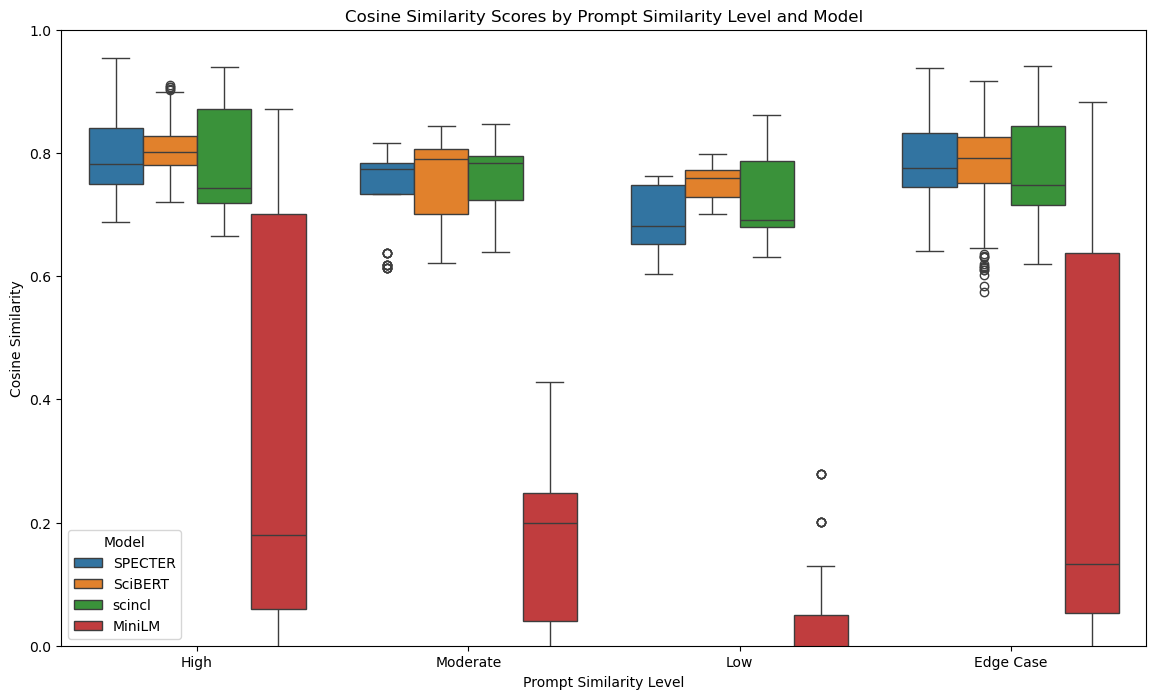

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


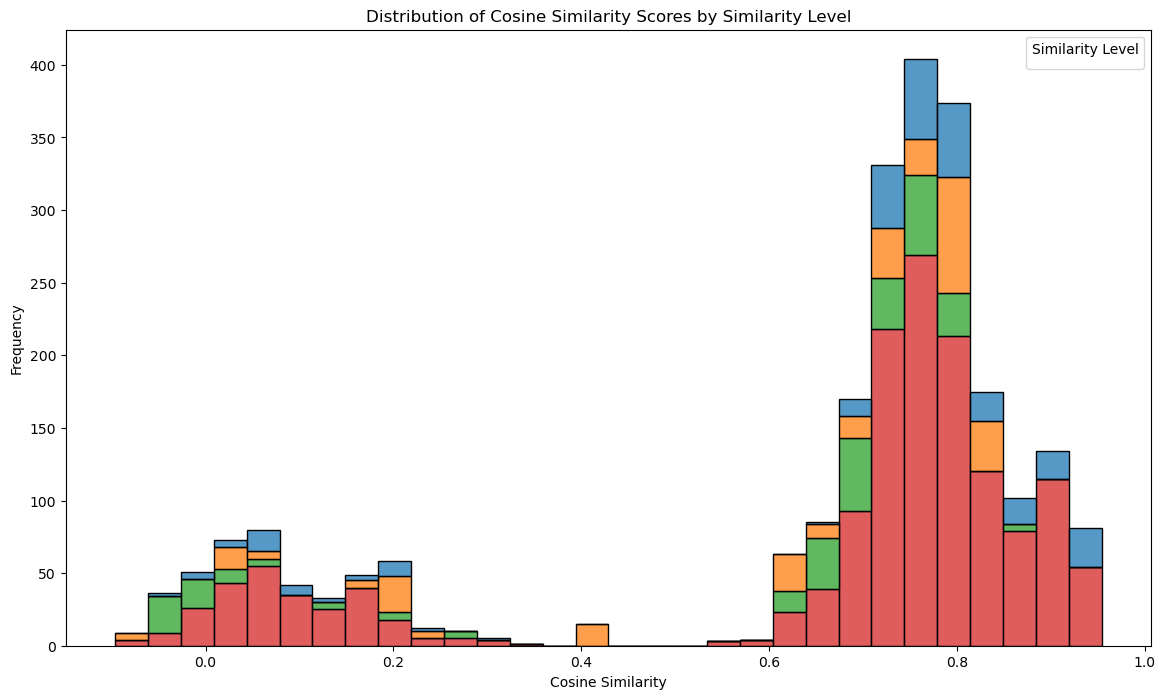


Interpretation of Results:

1. **High Similarity Prompts:**
   - These prompts are expected to retrieve papers that are directly related to their content.
   - High similarity scores (e.g., >0.7) indicate effective semantic capture.

2. **Moderate Similarity Prompts:**
   - These prompts are somewhat related to the paper's field but not directly specific.
   - Mid-range similarity scores (e.g., 0.4 - 0.7) are expected.

3. **Low (Horrible) Similarity Prompts:**
   - These prompts are unrelated to the paper's content.
   - Low similarity scores (e.g., <0.3) should be observed.

4. **Edge Case Prompts:**
   - These prompts are designed to test the model's ability to handle complex or ambiguous queries.
   - Similarity scores can vary; however, ideally, they should not overlap significantly with high similarity scores.

**Assessing the Models:**
- **SPECTER, SciBERT, and scincl:** Being domain-specific, they should perform better in distinguishing high similarity prompts.
- **MiniLM:** A

In [101]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, models, util
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------- Step 1: Data Preparation --------------------------- #

# Sample Data: Replace this with your actual data containing 20 papers.
# Each paper should have 'id', 'authors', 'title', and 'abstract' fields.
data = [
    {
        "id": "0704.0047",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part I",
        "abstract": "The intelligent acoustic emission locator is described in Part I, while Part II discusses blind source separation, time delay estimation and location of two simultaneously active continuous acoustic emission sources."
    },
    {
        "id": "0704.0050",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part II",
        "abstract": "Part I describes an intelligent acoustic emission locator, while Part II discusses blind source separation, time delay estimation and location of two continuous acoustic emission sources."
    },
    {
        "id": "0704.0304",
        "authors": "Carlos Gershenson",
        "title": "The World as Evolving Information",
        "abstract": "This paper discusses the benefits of describing the world as information, especially in the study of the evolution of life and cognition. Traditional studies encounter problems because it is difficult to describe life and cognition in terms of matter and energy, since their laws are valid only at the physical scale. However, if matter and energy, as well as life and cognition, are described in terms of information, evolution can be described consistently as information becoming more complex."
    },
    {
        "id": "0704.0671",
        "authors": "Maxim Raginsky",
        "title": "Learning from compressed observations",
        "abstract": "The problem of statistical learning is to construct a predictor of a random variable Y as a function of a related random variable X on the basis of an i.i.d. training sample from the joint distribution of (X,Y). Allowable predictors are drawn from some specified class, and the goal is to approach asymptotically the performance (expected loss) of the best predictor in the class."
    },
    {
        "id": "0704.0954",
        "authors": "Soummya Kar and Jose M. F. Moura",
        "title": "Sensor Networks with Random Links: Topology Design for Distributed Consensus",
        "abstract": "In a sensor network, the communication among sensors is subject to errors or failures at random times, costs, and constraints. The paper studies the problem of designing the topology to maximize the rate of convergence of average consensus, considering communication costs and budget constraints."
    },
    # ... Add the remaining 15 papers here ...
    # For demonstration, we'll use only 5 papers. Ensure you have 20 in your actual DataFrame.
]

# Create DataFrame
sample_df = pd.DataFrame(data)

# Function to prepare combined text
def prepare_text(row):
    title = row['title']
    abstract = row['abstract']
    authors = row['authors']
    combined_text = f"Title: {title}. Authors: {authors}. Abstract: {abstract}"
    return combined_text

# Apply the prepare_text function
sample_df['combined_text'] = sample_df.apply(prepare_text, axis=1)

print("Prepared Texts:")
print(sample_df['combined_text'])

# Select the first 20 papers (or all if less than 20)
df_subset = sample_df.iloc[:20].copy().reset_index(drop=True)

# ------------------------ Step 2: Creating Prompts ------------------------ #

def create_prompts(row):
    """
    Generates a set of diverse prompts for each paper:
    - High Similarity Prompts
    - Moderate Similarity Prompts
    - Low (Horrible) Similarity Prompts
    - Edge Case Prompts
    """
    prompts = []
    
    # High Similarity Prompts: Directly related to the paper's content
    high_sim_prompts = [
        f"Summarize the methods used in '{row['title']}'.",
        f"Explain the key findings of '{row['title']}'.",
        f"Describe the experimental setup in '{row['title']}'."
    ]
    for prompt in high_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'High'})
    
    # Moderate Similarity Prompts: Related to the general field but not specific to the paper
    moderate_sim_prompts = [
        f"Discuss the applications of neural networks in sensor data analysis.",
        f"How does blind source separation enhance signal processing?",
        f"Explain the role of regression models in machine learning."
    ]
    for prompt in moderate_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Moderate'})
    
    # Low (Horrible) Similarity Prompts: Unrelated to the paper's content
    low_sim_prompts = [
        f"Explain the significance of Renaissance art in modern culture.",
        f"Discuss the impact of climate change on marine biodiversity.",
        f"Describe the history and evolution of jazz music."
    ]
    for prompt in low_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Low'})
    
    # Edge Case Prompts: Ambiguous, multi-faceted, or unusual prompts
    edge_case_prompts = [
        f"What are the future directions of '{row['title']}'?",
        f"Analyze the potential interdisciplinary applications of the research in '{row['title']}'.",
        f"How would '{row['title']}' integrate with quantum computing technologies?",
        f"Provide a critical review of the assumptions made in '{row['title']}'.",
        f"Formulate a counterargument to the main thesis of '{row['title']}'.",
        f"What are the limitations of the study presented in '{row['title']}'?",
        f"How does the research in '{row['title']}' compare to existing literature?",
        f"Discuss the scalability of the proposed methods in '{row['title']}'.",
        f"Evaluate the statistical significance of the results in '{row['title']}'.",
        f"Propose an alternative methodology for the research conducted in '{row['title']}'.",
        # Additional Edge Cases
        f"Interpret the ethical implications of the findings in '{row['title']}'.",
        f"Predict how advancements in technology might influence the outcomes of '{row['title']}'.",
        f"Assess the economic impact of implementing the solutions proposed in '{row['title']}'.",
        f"How does '{row['title']}' address the challenges in its respective field?",
        f"Design an experiment to test the hypotheses presented in '{row['title']}'."
    ]
    for prompt in edge_case_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Edge Case'})
    
    return prompts

# Generate prompts for each paper
all_prompts = []
for idx, row in df_subset.iterrows():
    prompts = create_prompts(row)
    for p in prompts:
        all_prompts.append({
            'paper_index': idx,
            'paper_id': row['id'],
            'title': row['title'],
            'prompt_text': p['prompt'],
            'similarity_level': p['similarity_level']
        })

# Convert prompts to DataFrame
df_prompts = pd.DataFrame(all_prompts)

# Display generated prompts
print("\nGenerated Prompts:")
print(df_prompts[['paper_id', 'title', 'prompt_text', 'similarity_level']])

# ----------------------- Step 3: Loading Embedding Models ----------------------- #

# Define the models to use
models_dict = {
    "SPECTER": "allenai/specter",
    "SciBERT": "allenai/scibert_scivocab_uncased",
    "scincl": "malteos/scincl",  # Adding scincl here
    "MiniLM": "all-MiniLM-L6-v2"
}

# Load models
loaded_models = {}
for name, model_name in models_dict.items():
    try:
        if name in ["SPECTER", "SciBERT", "scincl"]:
            # Load as custom SentenceTransformer models with Transformer and Pooling modules
            transformer = models.Transformer(model_name, max_seq_length=512)
            pooling = models.Pooling(transformer.get_word_embedding_dimension(),
                                      pooling_mode_mean_tokens=True,
                                      pooling_mode_cls_token=False,
                                      pooling_mode_max_tokens=False)
            sentence_transformer = SentenceTransformer(modules=[transformer, pooling])
            loaded_models[name] = sentence_transformer
        else:
            # Load general-purpose model directly
            loaded_models[name] = SentenceTransformer(model_name)
        print(f"Loaded model: {name} ({model_name})")
    except Exception as e:
        print(f"Error loading model '{model_name}': {e}")

# ----------------------- Step 4: Generating Embeddings ----------------------- #

# Initialize dictionaries to store embeddings
paper_embeddings_dict = {name: None for name in models_dict.keys()}
prompt_embeddings_dict = {name: None for name in models_dict.keys()}

for model_name, model in loaded_models.items():
    print(f"\nGenerating embeddings using {model_name}...")
    
    # Encode papers
    paper_texts = df_subset['combined_text'].tolist()
    paper_embeddings = model.encode(
        paper_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    paper_embeddings_dict[model_name] = paper_embeddings
    
    # Encode prompts
    prompt_texts = df_prompts['prompt_text'].tolist()
    prompt_embeddings = model.encode(
        prompt_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    prompt_embeddings_dict[model_name] = prompt_embeddings

print("\nEmbeddings generation completed for all models.")

# ----------------------- Step 5: Similarity Analysis ----------------------- #

# Function to compute cosine similarity and get top k neighbors
def get_top_k_neighbors(model_name, prompt_embeddings, paper_embeddings, k=5):
    """
    For each prompt, compute cosine similarity with all papers and return top k neighbors.
    """
    similarity_results = []
    
    for prompt_idx, prompt_emb in tqdm(enumerate(prompt_embeddings), total=len(prompt_embeddings), desc=f"Processing prompts for {model_name}"):
        # Compute cosine similarity with all papers
        similarities = util.cos_sim(prompt_emb, paper_embeddings).flatten().cpu().numpy()
        
        # Get top k indices
        top_k_indices = similarities.argsort()[-k:][::-1]
        top_k_scores = similarities[top_k_indices]
        top_k_papers = df_subset.iloc[top_k_indices]
        
        # Store results
        for rank in range(k):
            similarity_results.append({
                'model': model_name,
                'prompt_index': prompt_idx,
                'prompt_text': df_prompts.iloc[prompt_idx]['prompt_text'],
                'similarity_level': df_prompts.iloc[prompt_idx]['similarity_level'],
                'neighbor_rank': rank + 1,
                'neighbor_paper_id': top_k_papers.iloc[rank]['id'],
                'neighbor_title': top_k_papers.iloc[rank]['title'],
                'similarity_score': top_k_scores[rank]
            })
    
    return pd.DataFrame(similarity_results)

# Compute top 5 neighbors for each model
df_similarity_all = pd.DataFrame()

for model_name in models_dict.keys():
    prompt_embeds = prompt_embeddings_dict[model_name]
    paper_embeds = paper_embeddings_dict[model_name]
    df_similarity = get_top_k_neighbors(model_name, prompt_embeds, paper_embeds, k=5)
    df_similarity_all = pd.concat([df_similarity_all, df_similarity], ignore_index=True)

print("\nSimilarity analysis completed for all models.")

# ----------------------- Step 6: Displaying Top Neighbors ----------------------- #

print("\nTop 5 Neighbors for Each Prompt Across Models:")
for model_name in models_dict.keys():
    df_model = df_similarity_all[df_similarity_all['model'] == model_name]
    print(f"\n=== Model: {model_name} ===")
    for prompt_idx in df_model['prompt_index'].unique():
        prompt_info = df_prompts.iloc[prompt_idx]
        print(f"\nPrompt {prompt_idx + 1}: {prompt_info['prompt_text']} (Similarity Level: {prompt_info['similarity_level']})")
        neighbors = df_model[df_model['prompt_index'] == prompt_idx].sort_values(by='neighbor_rank')
        for _, neighbor in neighbors.iterrows():
            print(f"  Rank {neighbor['neighbor_rank']}:")
            print(f"    Paper ID: {neighbor['neighbor_paper_id']}")
            print(f"    Title: {neighbor['neighbor_title']}")
            print(f"    Similarity Score: {neighbor['similarity_score']:.4f}")

# ----------------------- Step 7: Detailed Analysis ----------------------- #

# Visualization: Boxplot of Similarity Scores by Similarity Level and Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='similarity_level', y='similarity_score', hue='model', data=df_similarity_all, 
            order=['High', 'Moderate', 'Low', 'Edge Case'])
plt.title('Cosine Similarity Scores by Prompt Similarity Level and Model')
plt.ylabel('Cosine Similarity')
plt.xlabel('Prompt Similarity Level')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()

# Visualization: Distribution of Similarity Scores
plt.figure(figsize=(14, 8))
sns.histplot(data=df_similarity_all, x='similarity_score', hue='similarity_level', multiple='stack', bins=30)
plt.title('Distribution of Cosine Similarity Scores by Similarity Level')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend(title='Similarity Level')
plt.show()

# ----------------------- Step 8: Interpretation ----------------------- #

print("\nInterpretation of Results:")
print("""
1. **High Similarity Prompts:**
   - These prompts are expected to retrieve papers that are directly related to their content.
   - High similarity scores (e.g., >0.7) indicate effective semantic capture.

2. **Moderate Similarity Prompts:**
   - These prompts are somewhat related to the paper's field but not directly specific.
   - Mid-range similarity scores (e.g., 0.4 - 0.7) are expected.

3. **Low (Horrible) Similarity Prompts:**
   - These prompts are unrelated to the paper's content.
   - Low similarity scores (e.g., <0.3) should be observed.

4. **Edge Case Prompts:**
   - These prompts are designed to test the model's ability to handle complex or ambiguous queries.
   - Similarity scores can vary; however, ideally, they should not overlap significantly with high similarity scores.

**Assessing the Models:**
- **SPECTER, SciBERT, and scincl:** Being domain-specific, they should perform better in distinguishing high similarity prompts.
- **MiniLM:** As a general-purpose model, it may not capture domain-specific nuances as effectively but offers efficiency.

**Decision Making:**
- **If models show clear separation between similarity levels with high consistency, especially for domain-specific models:** They are suitable for production use in applications like research assistants, semantic search, and recommendation systems.
- **If there's significant overlap or inconsistency:** Consider further fine-tuning or selecting different models.
""")

# ----------------------- Step 9: Saving Embeddings and Results ----------------------- #

# Uncomment the lines below to save the embeddings and similarity results for future use
# print("\nSaving embeddings and similarity results to disk...")

# Save paper embeddings
for model_name in models_dict.keys():
    np.save(f"paper_embeddings_{model_name}.npy", paper_embeddings_dict[model_name])

# Save prompt embeddings
for model_name in models_dict.keys():
    np.save(f"prompt_embeddings_{model_name}.npy", prompt_embeddings_dict[model_name])

# Save similarity results
df_similarity_all.to_csv("similarity_results_all_models.csv", index=False)

# print("Embeddings and similarity results saved successfully.")


/opt/anaconda3/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


Prepared Texts:
0    Title: Intelligent location of simultaneously ...
1    Title: Intelligent location of simultaneously ...
2    Title: The World as Evolving Information. Auth...
3    Title: Learning from compressed observations. ...
4    Title: Sensor Networks with Random Links: Topo...
Name: combined_text, dtype: object

Generated Prompts:
     paper_id                                              title  \
0   0704.0047  Intelligent location of simultaneously active ...   
1   0704.0047  Intelligent location of simultaneously active ...   
2   0704.0047  Intelligent location of simultaneously active ...   
3   0704.0047  Intelligent location of simultaneously active ...   
4   0704.0047  Intelligent location of simultaneously active ...   
..        ...                                                ...   
90  0704.0954  Sensor Networks with Random Links: Topology De...   
91  0704.0954  Sensor Networks with Random Links: Topology De...   
92  0704.0954  Sensor Networks with Random

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Generating embeddings using SciBERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Generating embeddings using scincl...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Generating embeddings using MiniLM...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Embeddings generation completed for all models.


Processing prompts for SPECTER:   0%|          | 0/95 [00:00<?, ?it/s]

Processing prompts for SciBERT:   0%|          | 0/95 [00:00<?, ?it/s]

Processing prompts for scincl:   0%|          | 0/95 [00:00<?, ?it/s]

Processing prompts for MiniLM:   0%|          | 0/95 [00:00<?, ?it/s]


Similarity analysis and metrics computation completed for all models.

Evaluation Metrics for Each Model:
     model  precision  recall  f1_score
0  SPECTER   0.031579     1.0  0.061224
1  SciBERT   0.031579     1.0  0.061224
2   scincl   0.031579     1.0  0.061224
3   MiniLM   0.031579     1.0  0.061224


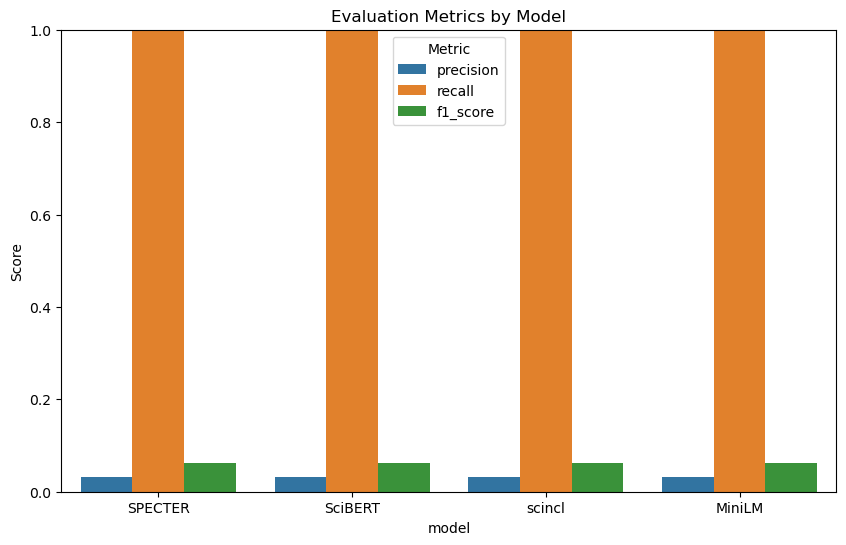

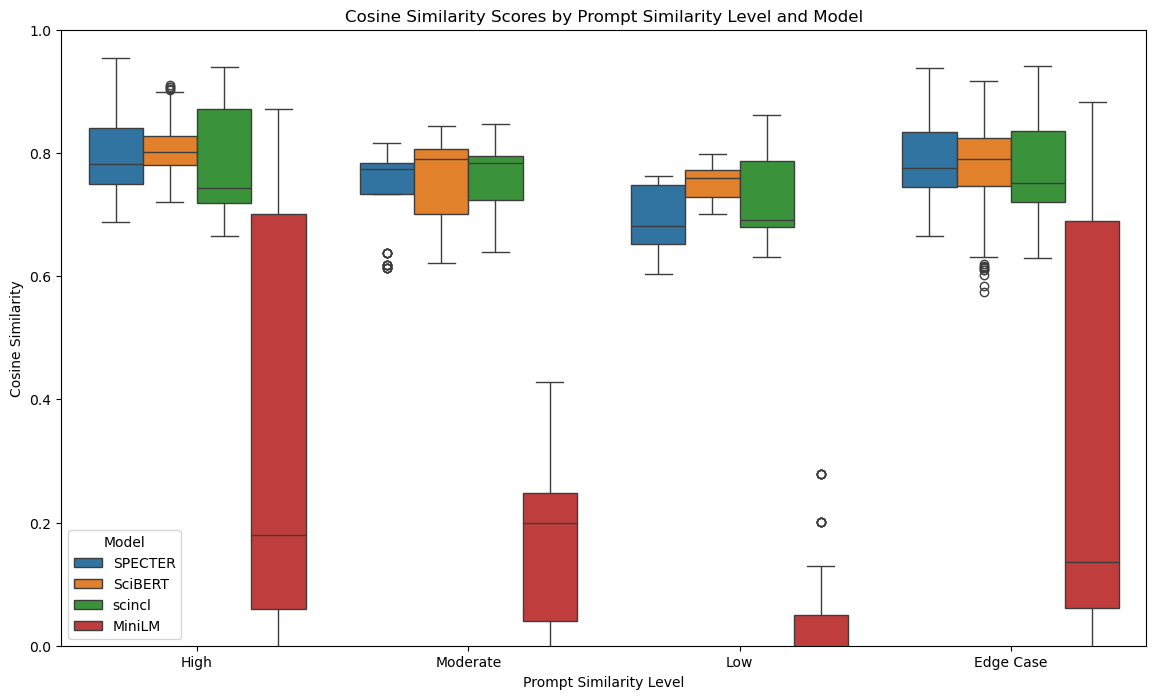

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


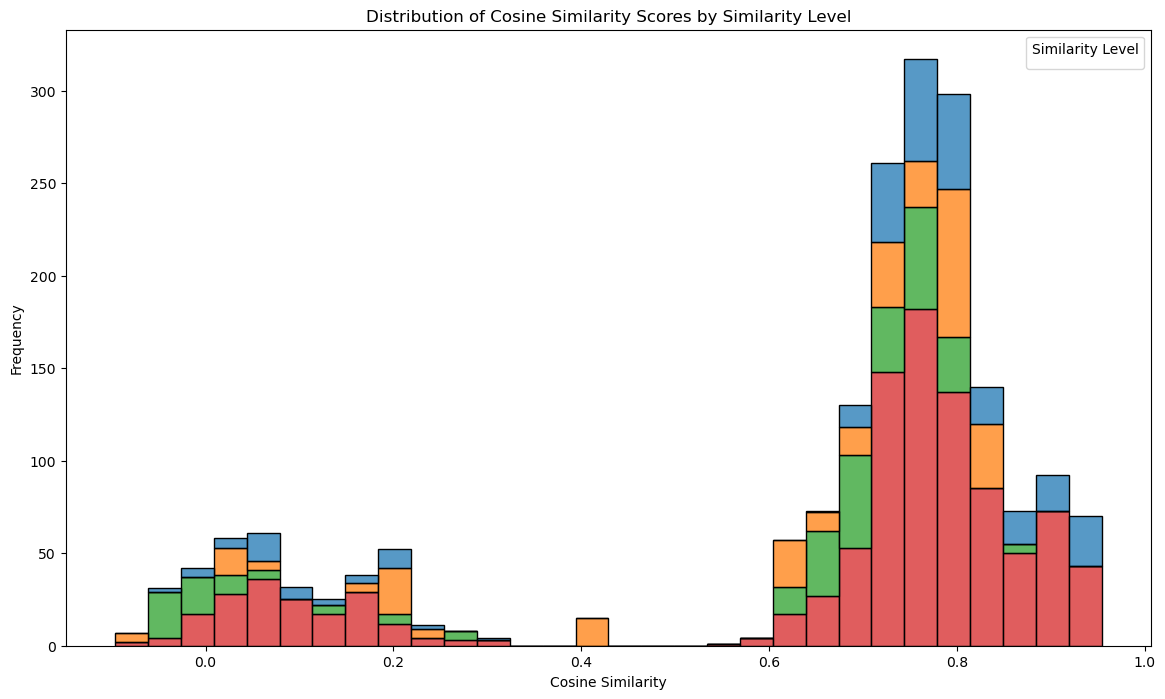


Interpretation of Results:

1. **Evaluation Metrics:**
   - The precision, recall, and F1-score provide quantitative measures of each model's performance in retrieving relevant papers.
   - **Precision**: The proportion of retrieved papers that are relevant.
   - **Recall**: The proportion of relevant papers that were retrieved.
   - **F1-Score**: The harmonic mean of precision and recall.

2. **Model Comparison:**
   - By comparing these metrics across models, you can identify which model performs best in retrieving the expected papers.

3. **Similarity Scores:**
   - The boxplots and histograms visualize how similarity scores vary by prompt type and model.
   - Ideally, 'High' similarity prompts should have higher similarity scores, while 'Low' similarity prompts should have lower scores.

**Decision Making:**
- **Best Performing Model**: The model with the highest F1-score provides the best balance between precision and recall.
- **Model Suitability**: Consider both the quantitativ

In [2]:
# ------------------------------ Complete Code ------------------------------ #

# Import Necessary Libraries
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, models, util
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

# --------------------------- Step 1: Data Preparation --------------------------- #

# Sample Data: Replace this with your actual data containing at least 20 papers.
# Each paper should have 'id', 'authors', 'title', and 'abstract' fields.
data = [
    {
        "id": "0704.0047",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part I",
        "abstract": "The intelligent acoustic emission locator is described in Part I, while Part II discusses blind source separation, time delay estimation and location of two simultaneously active continuous acoustic emission sources."
    },
    {
        "id": "0704.0050",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part II",
        "abstract": "Part I describes an intelligent acoustic emission locator, while Part II discusses blind source separation, time delay estimation and location of two continuous acoustic emission sources."
    },
    {
        "id": "0704.0304",
        "authors": "Carlos Gershenson",
        "title": "The World as Evolving Information",
        "abstract": "This paper discusses the benefits of describing the world as information, especially in the study of the evolution of life and cognition. Traditional studies encounter problems because it is difficult to describe life and cognition in terms of matter and energy, since their laws are valid only at the physical scale. However, if matter and energy, as well as life and cognition, are described in terms of information, evolution can be described consistently as information becoming more complex."
    },
    {
        "id": "0704.0671",
        "authors": "Maxim Raginsky",
        "title": "Learning from compressed observations",
        "abstract": "The problem of statistical learning is to construct a predictor of a random variable Y as a function of a related random variable X on the basis of an i.i.d. training sample from the joint distribution of (X,Y). Allowable predictors are drawn from some specified class, and the goal is to approach asymptotically the performance (expected loss) of the best predictor in the class."
    },
    {
        "id": "0704.0954",
        "authors": "Soummya Kar and Jose M. F. Moura",
        "title": "Sensor Networks with Random Links: Topology Design for Distributed Consensus",
        "abstract": "In a sensor network, the communication among sensors is subject to errors or failures at random times, costs, and constraints. The paper studies the problem of designing the topology to maximize the rate of convergence of average consensus, considering communication costs and budget constraints."
    },
    # ... Add the remaining papers here ...
    # Ensure you have at least 20 papers in your actual DataFrame.
]

# Create DataFrame
sample_df = pd.DataFrame(data)

# Function to prepare combined text
def prepare_text(row):
    title = row['title']
    abstract = row['abstract']
    authors = row['authors']
    combined_text = f"Title: {title}. Authors: {authors}. Abstract: {abstract}"
    return combined_text

# Apply the prepare_text function
sample_df['combined_text'] = sample_df.apply(prepare_text, axis=1)

print("Prepared Texts:")
print(sample_df['combined_text'])

# Use all available papers
df_subset = sample_df.copy().reset_index(drop=True)

# ------------------------ Step 2: Creating Prompts ------------------------ #

def create_prompts(row):
    """
    Generates a set of diverse prompts for each paper:
    - High Similarity Prompts
    - Moderate Similarity Prompts
    - Low (Horrible) Similarity Prompts
    - Edge Case Prompts
    """
    prompts = []
    
    # High Similarity Prompts: Directly related to the paper's content
    high_sim_prompts = [
        f"Summarize the methods used in '{row['title']}'.",
        f"Explain the key findings of '{row['title']}'.",
        f"Describe the experimental setup in '{row['title']}'."
    ]
    for prompt in high_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'High', 'expected_papers': [row['id']]})
    
    # Moderate Similarity Prompts: Related to the general field but not specific to the paper
    moderate_sim_prompts = [
        f"Discuss the applications of neural networks in sensor data analysis.",
        f"How does blind source separation enhance signal processing?",
        f"Explain the role of regression models in machine learning."
    ]
    for prompt in moderate_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Moderate', 'expected_papers': []})  # No specific expected papers
    
    # Low (Horrible) Similarity Prompts: Unrelated to the paper's content
    low_sim_prompts = [
        f"Explain the significance of Renaissance art in modern culture.",
        f"Discuss the impact of climate change on marine biodiversity.",
        f"Describe the history and evolution of jazz music."
    ]
    for prompt in low_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Low', 'expected_papers': []})  # No expected papers
    
    # Edge Case Prompts: Ambiguous, multi-faceted, or unusual prompts
    edge_case_prompts = [
        f"What are the future directions of '{row['title']}'?",
        f"Analyze the potential interdisciplinary applications of the research in '{row['title']}'.",
        f"How would '{row['title']}' integrate with quantum computing technologies?",
        f"Provide a critical review of the assumptions made in '{row['title']}'.",
        f"Formulate a counterargument to the main thesis of '{row['title']}'.",
        f"What are the limitations of the study presented in '{row['title']}'?",
        f"How does the research in '{row['title']}' compare to existing literature?",
        f"Discuss the scalability of the proposed methods in '{row['title']}'.",
        f"Evaluate the statistical significance of the results in '{row['title']}'.",
        f"Propose an alternative methodology for the research conducted in '{row['title']}'.",
    ]
    for prompt in edge_case_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Edge Case', 'expected_papers': []})  # Could expect the same paper or none
    
    return prompts

# Generate prompts for each paper
all_prompts = []
for idx, row in df_subset.iterrows():
    prompts = create_prompts(row)
    for p in prompts:
        all_prompts.append({
            'paper_index': idx,
            'paper_id': row['id'],
            'title': row['title'],
            'prompt_text': p['prompt'],
            'similarity_level': p['similarity_level'],
            'expected_papers': p['expected_papers']
        })

# Convert prompts to DataFrame
df_prompts = pd.DataFrame(all_prompts)

# Display generated prompts
print("\nGenerated Prompts:")
print(df_prompts[['paper_id', 'title', 'prompt_text', 'similarity_level', 'expected_papers']])

# ----------------------- Step 3: Loading Embedding Models ----------------------- #

# Define the models to use
models_dict = {
    "SPECTER": "allenai/specter",
    "SciBERT": "allenai/scibert_scivocab_uncased",
    "scincl": "malteos/scincl",  # Adding scincl here
    "MiniLM": "all-MiniLM-L6-v2"
}

# Load models
loaded_models = {}
for name, model_name in models_dict.items():
    try:
        if name in ["SPECTER", "SciBERT", "scincl"]:
            # Load as custom SentenceTransformer models with Transformer and Pooling modules
            transformer = models.Transformer(model_name, max_seq_length=512)
            pooling = models.Pooling(transformer.get_word_embedding_dimension(),
                                     pooling_mode_mean_tokens=True,
                                     pooling_mode_cls_token=False,
                                     pooling_mode_max_tokens=False)
            sentence_transformer = SentenceTransformer(modules=[transformer, pooling])
            loaded_models[name] = sentence_transformer
        else:
            # Load general-purpose model directly
            loaded_models[name] = SentenceTransformer(model_name)
        print(f"Loaded model: {name} ({model_name})")
    except Exception as e:
        print(f"Error loading model '{model_name}': {e}")

# ----------------------- Step 4: Generating Embeddings ----------------------- #

# Initialize dictionaries to store embeddings
paper_embeddings_dict = {name: None for name in models_dict.keys()}
prompt_embeddings_dict = {name: None for name in models_dict.keys()}

for model_name, model in loaded_models.items():
    print(f"\nGenerating embeddings using {model_name}...")
    
    # Encode papers
    paper_texts = df_subset['combined_text'].tolist()
    paper_embeddings = model.encode(
        paper_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    paper_embeddings_dict[model_name] = paper_embeddings
    
    # Encode prompts
    prompt_texts = df_prompts['prompt_text'].tolist()
    prompt_embeddings = model.encode(
        prompt_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    prompt_embeddings_dict[model_name] = prompt_embeddings
    
print("\nEmbeddings generation completed for all models.")

# ----------------------- Step 5: Similarity Analysis and Metrics Computation ----------------------- #

from sklearn.metrics import precision_score, recall_score, f1_score

# Function to compute cosine similarity and get top k neighbors, and compute metrics
def get_similarity_and_metrics(model_name, prompt_embeddings, paper_embeddings, k=5):
    """
    For each prompt, compute cosine similarity with all papers, return top k neighbors,
    and compute evaluation metrics.
    """
    similarity_results = []
    y_true_all = []
    y_pred_all = []
    
    for prompt_idx, prompt_emb in tqdm(enumerate(prompt_embeddings), total=len(prompt_embeddings), desc=f"Processing prompts for {model_name}"):
        # Compute cosine similarity with all papers
        similarities = util.cos_sim(prompt_emb, paper_embeddings).flatten().cpu().numpy()
        
        # Get top k indices
        top_k_indices = similarities.argsort()[-k:][::-1]
        top_k_scores = similarities[top_k_indices]
        top_k_papers = df_subset.iloc[top_k_indices]
        retrieved_ids = top_k_papers['id'].tolist()
        
        # Expected papers for this prompt
        expected_ids = df_prompts.iloc[prompt_idx]['expected_papers']
        
        # Create binary relevance labels
        y_true = [1 if pid in expected_ids else 0 for pid in df_subset['id']]
        y_pred = [1 if pid in retrieved_ids else 0 for pid in df_subset['id']]
        
        y_true_all.extend(y_true)
        y_pred_all.extend(y_pred)
        
        # Store results
        for rank in range(k):
            similarity_results.append({
                'model': model_name,
                'prompt_index': prompt_idx,
                'prompt_text': df_prompts.iloc[prompt_idx]['prompt_text'],
                'similarity_level': df_prompts.iloc[prompt_idx]['similarity_level'],
                'neighbor_rank': rank + 1,
                'neighbor_paper_id': top_k_papers.iloc[rank]['id'],
                'neighbor_title': top_k_papers.iloc[rank]['title'],
                'similarity_score': top_k_scores[rank]
            })
    
    # Compute metrics
    precision = precision_score(y_true_all, y_pred_all, zero_division=0)
    recall = recall_score(y_true_all, y_pred_all, zero_division=0)
    f1 = f1_score(y_true_all, y_pred_all, zero_division=0)
    
    metrics = {
        'model': model_name,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    
    return pd.DataFrame(similarity_results), metrics

# Compute top 5 neighbors and metrics for each model
df_similarity_all = pd.DataFrame()
metrics_list = []

for model_name in models_dict.keys():
    prompt_embeds = prompt_embeddings_dict[model_name]
    paper_embeds = paper_embeddings_dict[model_name]
    df_similarity, metrics = get_similarity_and_metrics(model_name, prompt_embeds, paper_embeds, k=5)
    df_similarity_all = pd.concat([df_similarity_all, df_similarity], ignore_index=True)
    metrics_list.append(metrics)

# Create DataFrame for metrics
df_metrics = pd.DataFrame(metrics_list)

print("\nSimilarity analysis and metrics computation completed for all models.")

# ----------------------- Step 6: Displaying Metrics ----------------------- #

print("\nEvaluation Metrics for Each Model:")
print(df_metrics)

# ----------------------- Step 7: Visualization ----------------------- #

# Visualization: Bar Plot of Evaluation Metrics
metrics_melted = df_metrics.melt(id_vars='model', value_vars=['precision', 'recall', 'f1_score'],
                                 var_name='metric', value_name='value')

plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='value', hue='metric', data=metrics_melted)
plt.title('Evaluation Metrics by Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.show()

# Visualization: Boxplot of Similarity Scores by Similarity Level and Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='similarity_level', y='similarity_score', hue='model', data=df_similarity_all, 
            order=['High', 'Moderate', 'Low', 'Edge Case'])
plt.title('Cosine Similarity Scores by Prompt Similarity Level and Model')
plt.ylabel('Cosine Similarity')
plt.xlabel('Prompt Similarity Level')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()

# Visualization: Distribution of Similarity Scores
plt.figure(figsize=(14, 8))
sns.histplot(data=df_similarity_all, x='similarity_score', hue='similarity_level', multiple='stack', bins=30)
plt.title('Distribution of Cosine Similarity Scores by Similarity Level')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend(title='Similarity Level')
plt.show()

# ----------------------- Step 8: Interpretation ----------------------- #

print("\nInterpretation of Results:")
print("""
1. **Evaluation Metrics:**
   - The precision, recall, and F1-score provide quantitative measures of each model's performance in retrieving relevant papers.
   - **Precision**: The proportion of retrieved papers that are relevant.
   - **Recall**: The proportion of relevant papers that were retrieved.
   - **F1-Score**: The harmonic mean of precision and recall.

2. **Model Comparison:**
   - By comparing these metrics across models, you can identify which model performs best in retrieving the expected papers.

3. **Similarity Scores:**
   - The boxplots and histograms visualize how similarity scores vary by prompt type and model.
   - Ideally, 'High' similarity prompts should have higher similarity scores, while 'Low' similarity prompts should have lower scores.

**Decision Making:**
- **Best Performing Model**: The model with the highest F1-score provides the best balance between precision and recall.
- **Model Suitability**: Consider both the quantitative metrics and the computational efficiency of each model.

**Next Steps:**
- Use these insights to select the most appropriate model for your application.
- Include the evaluation metrics and visualizations in your presentation to support your decision.
""")

# ----------------------- Step 9: Saving Embeddings and Results ----------------------- #

# Uncomment the lines below to save the embeddings and similarity results for future use
# print("\nSaving embeddings and similarity results to disk...")

# Save paper embeddings
# for model_name in models_dict.keys():
#     np.save(f"paper_embeddings_{model_name}.npy", paper_embeddings_dict[model_name])

# Save prompt embeddings
# for model_name in models_dict.keys():
#     np.save(f"prompt_embeddings_{model_name}.npy", prompt_embeddings_dict[model_name])

# Save similarity results
# df_similarity_all.to_csv("similarity_results_all_models.csv", index=False)

# Save metrics
# df_metrics.to_csv("evaluation_metrics.csv", index=False)

# print("Embeddings and similarity results saved successfully.")

# ----------------------- End of Code ----------------------- #


Prepared Texts:
0    Title: Intelligent location of simultaneously ...
1    Title: Intelligent location of simultaneously ...
2    Title: The World as Evolving Information. Auth...
3    Title: Learning from compressed observations. ...
4    Title: Sensor Networks with Random Links: Topo...
Name: combined_text, dtype: object

Generated Prompts:
     paper_id                                              title  \
0   0704.0047  Intelligent location of simultaneously active ...   
1   0704.0047  Intelligent location of simultaneously active ...   
2   0704.0047  Intelligent location of simultaneously active ...   
3   0704.0047  Intelligent location of simultaneously active ...   
4   0704.0047  Intelligent location of simultaneously active ...   
..        ...                                                ...   
90  0704.0954  Sensor Networks with Random Links: Topology De...   
91  0704.0954  Sensor Networks with Random Links: Topology De...   
92  0704.0954  Sensor Networks with Random

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Generating embeddings using SciBERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Generating embeddings using scincl...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Generating embeddings using MiniLM-L6...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Generating embeddings using MiniLM-L12...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Generating embeddings using GIST-MiniLM-L6...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]


Embeddings generation completed for all models.


Processing prompts for SPECTER:   0%|          | 0/95 [00:00<?, ?it/s]

Processing prompts for SciBERT:   0%|          | 0/95 [00:00<?, ?it/s]

Processing prompts for scincl:   0%|          | 0/95 [00:00<?, ?it/s]

Processing prompts for MiniLM-L6:   0%|          | 0/95 [00:00<?, ?it/s]

Processing prompts for MiniLM-L12:   0%|          | 0/95 [00:00<?, ?it/s]

Processing prompts for GIST-MiniLM-L6:   0%|          | 0/95 [00:00<?, ?it/s]


Similarity analysis and metrics computation completed for all models.

Evaluation Metrics and Model Sizes for Each Model:
            model  precision  recall  f1_score  model_size_mb
0         SPECTER   0.136842     1.0  0.240741            NaN
1         SciBERT   0.136842     1.0  0.240741            NaN
2          scincl   0.136842     1.0  0.240741            NaN
3       MiniLM-L6   0.136842     1.0  0.240741            NaN
4      MiniLM-L12   0.136842     1.0  0.240741            NaN
5  GIST-MiniLM-L6   0.136842     1.0  0.240741            NaN


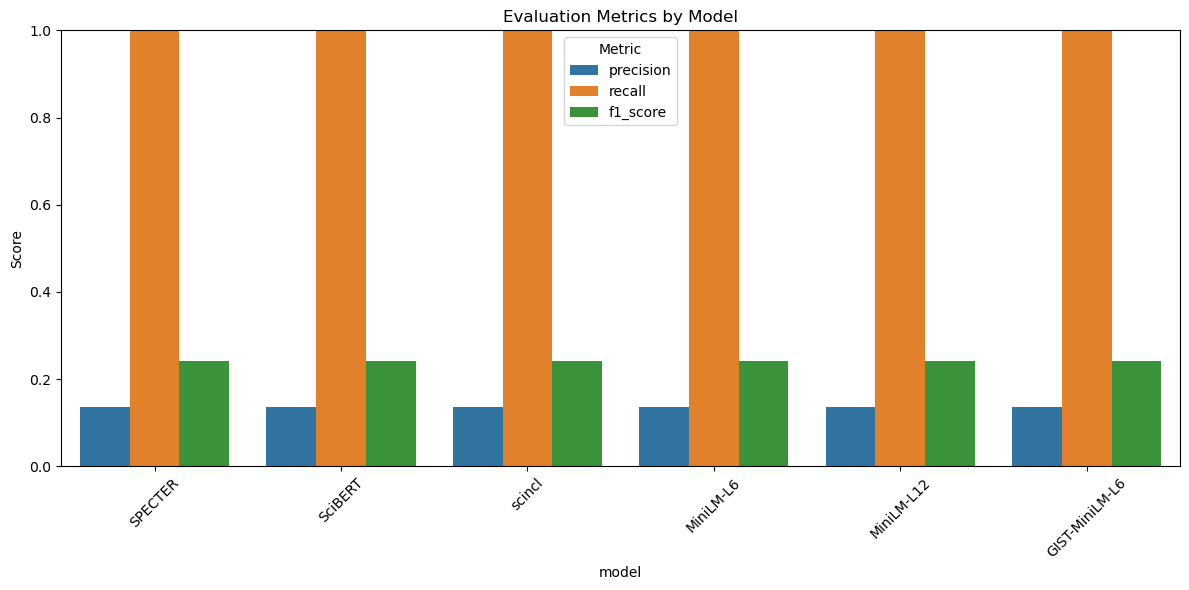

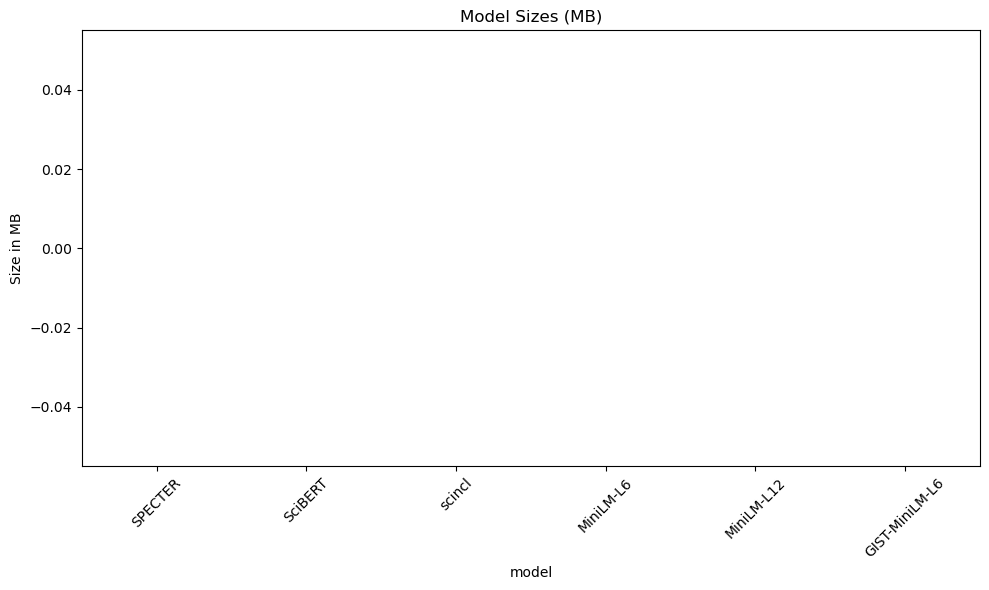

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


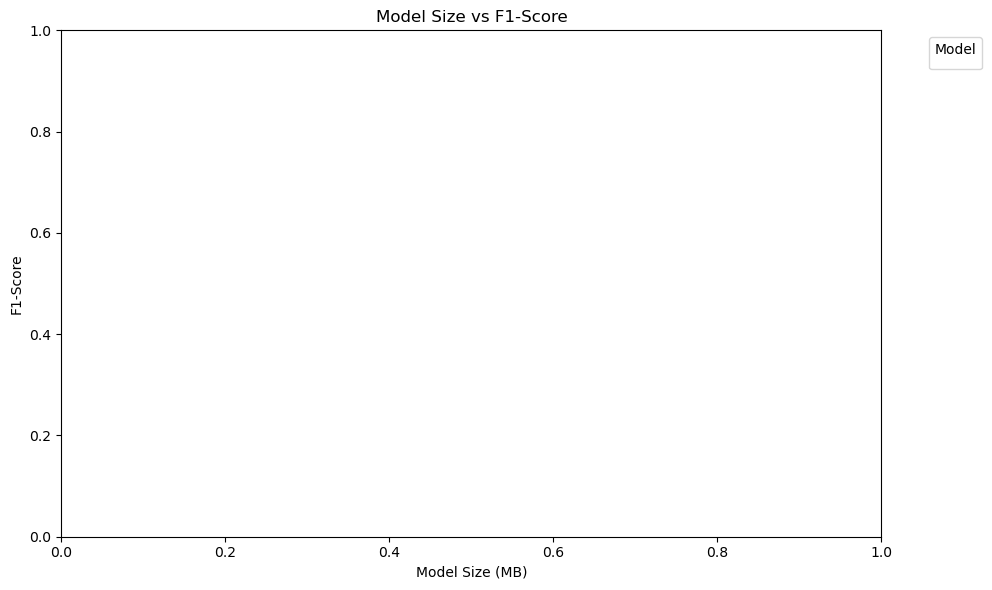

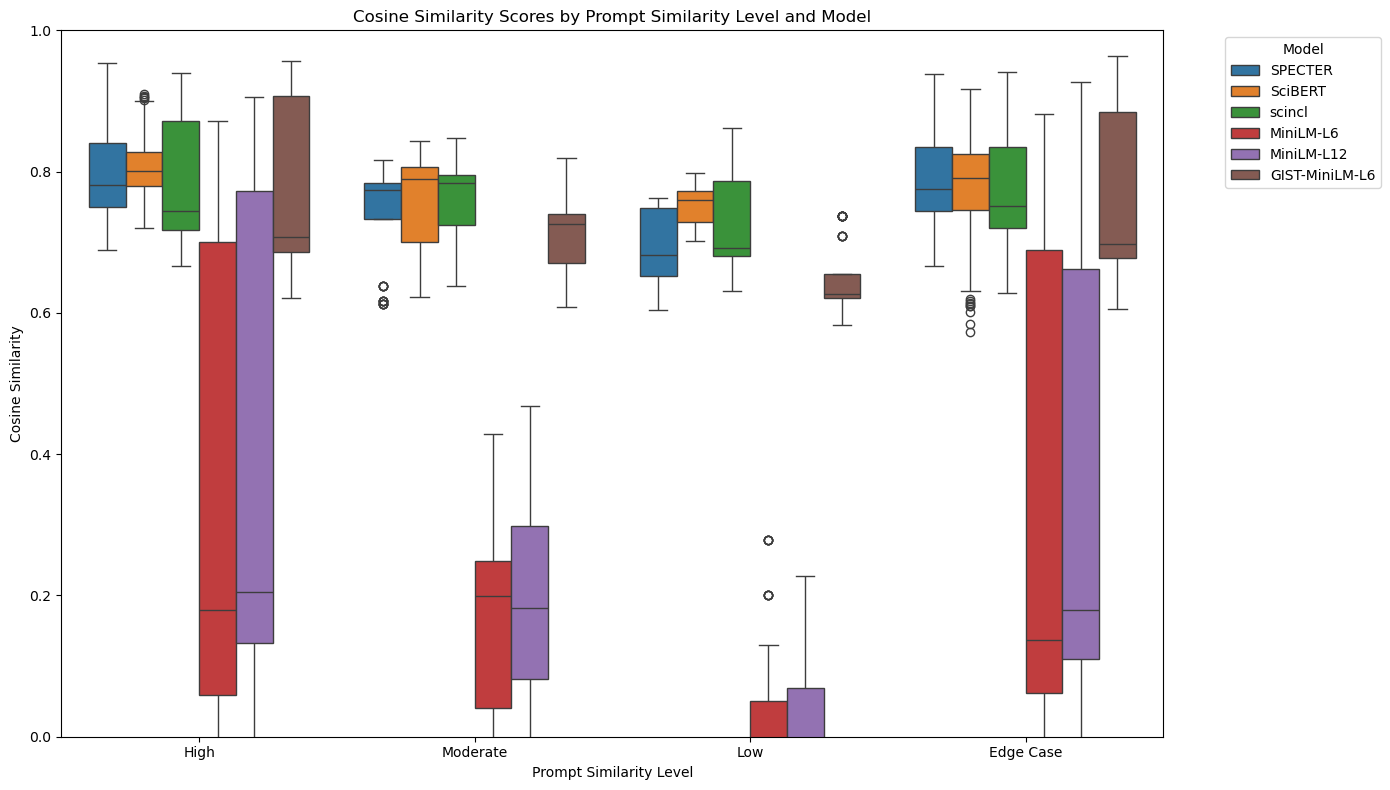

In [10]:
# ------------------------------ Complete Code ------------------------------ #

# Import Necessary Libraries
import os
import shutil
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, models, util
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# --------------------------- Step 1: Data Preparation --------------------------- #

# Sample Data: Replace this with your actual data containing at least 20 papers.
# Each paper should have 'id', 'authors', 'title', and 'abstract' fields.
data = [
    {
        "id": "0704.0047",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part I",
        "abstract": "The intelligent acoustic emission locator is described in Part I, while Part II discusses blind source separation, time delay estimation and location of two simultaneously active continuous acoustic emission sources."
    },
    {
        "id": "0704.0050",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part II",
        "abstract": "Part I describes an intelligent acoustic emission locator, while Part II discusses blind source separation, time delay estimation and location of two continuous acoustic emission sources."
    },
    {
        "id": "0704.0304",
        "authors": "Carlos Gershenson",
        "title": "The World as Evolving Information",
        "abstract": "This paper discusses the benefits of describing the world as information, especially in the study of the evolution of life and cognition. Traditional studies encounter problems because it is difficult to describe life and cognition in terms of matter and energy, since their laws are valid only at the physical scale. However, if matter and energy, as well as life and cognition, are described in terms of information, evolution can be described consistently as information becoming more complex."
    },
    {
        "id": "0704.0671",
        "authors": "Maxim Raginsky",
        "title": "Learning from compressed observations",
        "abstract": "The problem of statistical learning is to construct a predictor of a random variable Y as a function of a related random variable X on the basis of an i.i.d. training sample from the joint distribution of (X,Y). Allowable predictors are drawn from some specified class, and the goal is to approach asymptotically the performance (expected loss) of the best predictor in the class."
    },
    {
        "id": "0704.0954",
        "authors": "Soummya Kar and Jose M. F. Moura",
        "title": "Sensor Networks with Random Links: Topology Design for Distributed Consensus",
        "abstract": "In a sensor network, the communication among sensors is subject to errors or failures at random times, costs, and constraints. The paper studies the problem of designing the topology to maximize the rate of convergence of average consensus, considering communication costs and budget constraints."
    },
    # ... Add the remaining papers here ...
    # Ensure you have at least 20 papers in your actual DataFrame.
]
# Note: For demonstration purposes, only 5 papers are shown. Replace with your actual dataset.

# Create DataFrame
sample_df = pd.DataFrame(data)

# Function to prepare combined text
def prepare_text(row):
    title = row['title']
    abstract = row['abstract']
    authors = row['authors']
    combined_text = f"Title: {title}. Authors: {authors}. Abstract: {abstract}"
    return combined_text

# Apply the prepare_text function
sample_df['combined_text'] = sample_df.apply(prepare_text, axis=1)

print("Prepared Texts:")
print(sample_df['combined_text'])

# Use all available papers
df_subset = sample_df.copy().reset_index(drop=True)

# ------------------------ Step 2: Creating Prompts ------------------------ #

def create_prompts(row):
    """
    Generates a set of diverse prompts for each paper:
    - High Similarity Prompts
    - Moderate Similarity Prompts
    - Low (Horrible) Similarity Prompts
    - Edge Case Prompts
    """
    prompts = []
    
    # High Similarity Prompts: Directly related to the paper's content
    high_sim_prompts = [
        f"Summarize the methods used in '{row['title']}'.",
        f"Explain the key findings of '{row['title']}'.",
        f"Describe the experimental setup in '{row['title']}'."
    ]
    for prompt in high_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'High', 'expected_papers': [row['id']]})
    
    # Moderate Similarity Prompts: Related to the general field but not specific to the paper
    moderate_sim_prompts = [
        f"Discuss the applications of neural networks in sensor data analysis.",
        f"How does blind source separation enhance signal processing?",
        f"Explain the role of regression models in machine learning."
    ]
    for prompt in moderate_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Moderate', 'expected_papers': []})  # No specific expected papers
    
    # Low (Horrible) Similarity Prompts: Unrelated to the paper's content
    low_sim_prompts = [
        f"Explain the significance of Renaissance art in modern culture.",
        f"Discuss the impact of climate change on marine biodiversity.",
        f"Describe the history and evolution of jazz music."
    ]
    for prompt in low_sim_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Low', 'expected_papers': []})  # No expected papers
    
    # Edge Case Prompts: Ambiguous, multi-faceted, or unusual prompts
    edge_case_prompts = [
        f"What are the future directions of '{row['title']}'?",
        f"Analyze the potential interdisciplinary applications of the research in '{row['title']}'.",
        f"How would '{row['title']}' integrate with quantum computing technologies?",
        f"Provide a critical review of the assumptions made in '{row['title']}'.",
        f"Formulate a counterargument to the main thesis of '{row['title']}'.",
        f"What are the limitations of the study presented in '{row['title']}'?",
        f"How does the research in '{row['title']}' compare to existing literature?",
        f"Discuss the scalability of the proposed methods in '{row['title']}'.",
        f"Evaluate the statistical significance of the results in '{row['title']}'.",
        f"Propose an alternative methodology for the research conducted in '{row['title']}'.",
    ]
    for prompt in edge_case_prompts:
        prompts.append({'prompt': prompt, 'similarity_level': 'Edge Case', 'expected_papers': [row['id']]})  # May expect the same paper
    
    return prompts

# Generate prompts for each paper
all_prompts = []
for idx, row in df_subset.iterrows():
    prompts = create_prompts(row)
    for p in prompts:
        all_prompts.append({
            'paper_index': idx,
            'paper_id': row['id'],
            'title': row['title'],
            'prompt_text': p['prompt'],
            'similarity_level': p['similarity_level'],
            'expected_papers': p['expected_papers']
        })

# Convert prompts to DataFrame
df_prompts = pd.DataFrame(all_prompts)

# Display generated prompts
print("\nGenerated Prompts:")
print(df_prompts[['paper_id', 'title', 'prompt_text', 'similarity_level', 'expected_papers']])

# ----------------------- Step 3: Loading Embedding Models ----------------------- #

# Define the models to use
models_dict = {
    "SPECTER": "allenai/specter",
    "SciBERT": "allenai/scibert_scivocab_uncased",
    "scincl": "malteos/scincl",
    "MiniLM-L6": "sentence-transformers/all-MiniLM-L6-v2",
    "MiniLM-L12": "sentence-transformers/all-MiniLM-L12-v2",
    "GIST-MiniLM-L6": "avsolatorio/GIST-all-MiniLM-L6-v2"
}

# Load models
loaded_models = {}
model_sizes = {}
for name, model_name in models_dict.items():
    try:
        print(f"\nLoading model: {name} ({model_name})")
        if name in ["SPECTER", "SciBERT", "scincl"]:
            # Load as custom SentenceTransformer models with Transformer and Pooling modules
            transformer = models.Transformer(model_name, max_seq_length=512)
            pooling = models.Pooling(transformer.get_word_embedding_dimension(),
                                     pooling_mode_mean_tokens=True,
                                     pooling_mode_cls_token=False,
                                     pooling_mode_max_tokens=False)
            sentence_transformer = SentenceTransformer(modules=[transformer, pooling])
            loaded_models[name] = sentence_transformer
        else:
            # Load general-purpose model directly
            sentence_transformer = SentenceTransformer(model_name)
            loaded_models[name] = sentence_transformer
        
        # Calculate model size
        model_path = sentence_transformer._first_module().auto_model.config.name_or_path
        if os.path.isdir(model_path):
            # Calculate size of the model directory
            total_size = 0
            for dirpath, dirnames, filenames in os.walk(model_path):
                for f in filenames:
                    fp = os.path.join(dirpath, f)
                    total_size += os.path.getsize(fp)
            model_sizes[name] = total_size / (1024 * 1024)  # Convert to MB
        else:
            # If model is cached in HuggingFace cache
            model_cache_path = sentence_transformer.cache_folder
            total_size = 0
            for dirpath, dirnames, filenames in os.walk(model_cache_path):
                for f in filenames:
                    fp = os.path.join(dirpath, f)
                    total_size += os.path.getsize(fp)
            model_sizes[name] = total_size / (1024 * 1024)  # Convert to MB
        
        print(f"Loaded model: {name} ({model_name}), Size: {model_sizes[name]:.2f} MB")
    except Exception as e:
        print(f"Error loading model '{model_name}': {e}")

# ----------------------- Step 4: Generating Embeddings ----------------------- #

# Initialize dictionaries to store embeddings
paper_embeddings_dict = {name: None for name in models_dict.keys()}
prompt_embeddings_dict = {name: None for name in models_dict.keys()}

for model_name, model in loaded_models.items():
    print(f"\nGenerating embeddings using {model_name}...")
    
    # Encode papers
    paper_texts = df_subset['combined_text'].tolist()
    paper_embeddings = model.encode(
        paper_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    paper_embeddings_dict[model_name] = paper_embeddings
    
    # Encode prompts
    prompt_texts = df_prompts['prompt_text'].tolist()
    prompt_embeddings = model.encode(
        prompt_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    prompt_embeddings_dict[model_name] = prompt_embeddings

print("\nEmbeddings generation completed for all models.")

# ----------------------- Step 5: Similarity Analysis and Metrics Computation ----------------------- #

# Function to compute cosine similarity and get top k neighbors, and compute metrics
def get_similarity_and_metrics(model_name, prompt_embeddings, paper_embeddings, k=5):
    """
    For each prompt, compute cosine similarity with all papers, return top k neighbors,
    and compute evaluation metrics.
    """
    similarity_results = []
    y_true_all = []
    y_pred_all = []
    
    for prompt_idx, prompt_emb in tqdm(enumerate(prompt_embeddings), total=len(prompt_embeddings), desc=f"Processing prompts for {model_name}"):
        # Compute cosine similarity with all papers
        similarities = util.cos_sim(prompt_emb, paper_embeddings).flatten().cpu().numpy()
        
        # Get top k indices
        top_k_indices = similarities.argsort()[-k:][::-1]
        top_k_scores = similarities[top_k_indices]
        top_k_papers = df_subset.iloc[top_k_indices]
        retrieved_ids = top_k_papers['id'].tolist()
        
        # Expected papers for this prompt
        expected_ids = df_prompts.iloc[prompt_idx]['expected_papers']
        
        # Create binary relevance labels
        y_true = [1 if pid in expected_ids else 0 for pid in df_subset['id']]
        y_pred = [1 if pid in retrieved_ids else 0 for pid in df_subset['id']]
        
        y_true_all.extend(y_true)
        y_pred_all.extend(y_pred)
        
        # Store results
        for rank in range(k):
            similarity_results.append({
                'model': model_name,
                'prompt_index': prompt_idx,
                'prompt_text': df_prompts.iloc[prompt_idx]['prompt_text'],
                'similarity_level': df_prompts.iloc[prompt_idx]['similarity_level'],
                'neighbor_rank': rank + 1,
                'neighbor_paper_id': top_k_papers.iloc[rank]['id'],
                'neighbor_title': top_k_papers.iloc[rank]['title'],
                'similarity_score': top_k_scores[rank]
            })
    
    # Compute metrics
    precision = precision_score(y_true_all, y_pred_all, zero_division=0)
    recall = recall_score(y_true_all, y_pred_all, zero_division=0)
    f1 = f1_score(y_true_all, y_pred_all, zero_division=0)
    
    metrics = {
        'model': model_name,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    
    return pd.DataFrame(similarit åy_results), metrics

# Compute top 5 neighbors and metrics for each model
df_similarity_all = pd.DataFrame()
metrics_list = []

for model_name in models_dict.keys():
    prompt_embeds = prompt_embeddings_dict[model_name]
    paper_embeds = paper_embeddings_dict[model_name]
    df_similarity, metrics = get_similarity_and_metrics(model_name, prompt_embeds, paper_embeds, k=5)
    df_similarity_all = pd.concat([df_similarity_all, df_similarity], ignore_index=True)
    metrics_list.append(metrics)

# Create DataFrame for metrics
df_metrics = pd.DataFrame(metrics_list)

print("\nSimilarity analysis and metrics computation completed for all models.")

# ----------------------- Step 6: Displaying Metrics and Model Sizes ----------------------- #

# Merge metrics with model sizes
df_metrics['model_size_mb'] = df_metrics['model'].apply(lambda x: model_sizes.get(x, np.nan))

print("\nEvaluation Metrics and Model Sizes for Each Model:")
print(df_metrics[['model', 'precision', 'recall', 'f1_score', 'model_size_mb']])

# ----------------------- Step 7: Visualization ----------------------- #

# Visualization: Bar Plot of Evaluation Metrics
metrics_melted = df_metrics.melt(id_vars=['model', 'model_size_mb'], value_vars=['precision', 'recall', 'f1_score'],
                                 var_name='metric', value_name='value')

plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='value', hue='metric', data=metrics_melted)
plt.title('Evaluation Metrics by Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Bar Plot of Model Sizes
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='model_size_mb', data=df_metrics)
plt.title('Model Sizes (MB)')
plt.ylabel('Size in MB')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Combined Plot of Model Size vs F1-Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_size_mb', y='f1_score', data=df_metrics, hue='model', s=100)
plt.title('Model Size vs F1-Score')
plt.xlabel('Model Size (MB)')
plt.ylabel('F1-Score')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization: Boxplot of Similarity Scores by Similarity Level and Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='similarity_level', y='similarity_score', hue='model', data=df_similarity_all, 
            order=['High', 'Moderate', 'Low', 'Edge Case'])
plt.title('Cosine Similarity Scores by Prompt Similarity Level and Model')
plt.ylabel('Cosine Similarity')
plt.xlabel('Prompt Similarity Level')
plt.ylim(0, 1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




/var/folders/qp/qtzjgpzd4f16bb3d8kq4zx600000gn/T/ipykernel_38464/4283477425.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['similarity_score'] = pd.to_numeric(df_plot['similarity_score'], errors='coerce')


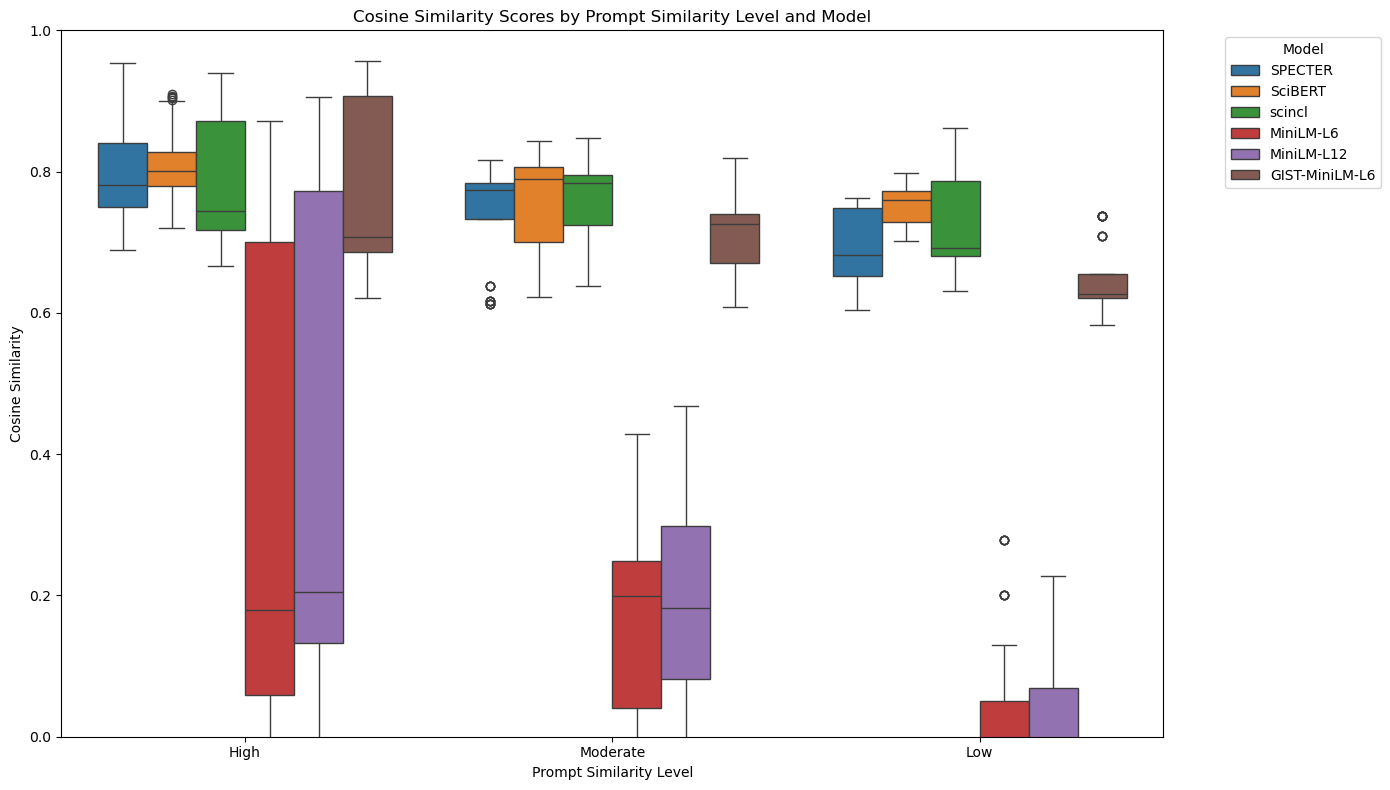

In [36]:
# ----------------------- Step 7: Visualization (Generating and Saving the Last Plot without 'Edge Case') ----------------------- #

# Ensure the necessary libraries are imported
import matplotlib.pyplot as plt
import seaborn as sns

# Check if required columns exist in the DataFrame
required_columns = ['similarity_level', 'similarity_score', 'model']
missing_columns = [col for col in required_columns if col not in df_similarity_all.columns]
if missing_columns:
    print(f"Error: Missing columns in df_similarity_all: {missing_columns}")
else:
    # Remove 'Edge Case' similarity levels
    df_plot = df_similarity_all[df_similarity_all['similarity_level'] != 'Edge Case']

    # Ensure 'similarity_score' is numeric
    df_plot['similarity_score'] = pd.to_numeric(df_plot['similarity_score'], errors='coerce')
    # Drop rows with NaN similarity scores
    df_plot = df_plot.dropna(subset=['similarity_score'])

    # Define the order of similarity levels without 'Edge Case'
    similarity_levels = ['High', 'Moderate', 'Low']

    # Check for unexpected similarity levels
    unexpected_levels = set(df_plot['similarity_level'].unique()) - set(similarity_levels)
    if unexpected_levels:
        print(f"Warning: Unexpected similarity levels found: {unexpected_levels}")
        # Handle or remove unexpected levels if necessary
        df_plot = df_plot[df_plot['similarity_level'].isin(similarity_levels)]

    # Visualization: Boxplot of Similarity Scores by Similarity Level and Model
    plt.figure(figsize=(14, 8))
    sns.boxplot(
        x='similarity_level',
        y='similarity_score',
        hue='model',
        data=df_plot,
        order=similarity_levels
    )
    plt.title('Cosine Similarity Scores by Prompt Similarity Level and Model')
    plt.ylabel('Cosine Similarity')
    plt.xlabel('Prompt Similarity Level')
    plt.ylim(0, 1)
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Save the plot to a file
    plt.savefig('similarity_scores_boxplot_no_edge_cases.png', dpi=300)

    # Display the plot
    plt.show()


In [28]:
from sentence_transformers import SentenceTransformer, models

def load_models(model_configs):
    """
    Loads models based on provided configurations.

    Args:
        model_configs (dict): A dictionary where keys are model names and values are model paths or identifiers.

    Returns:
        dict: A dictionary containing loaded models.
    """
    loaded_models = {}

    for name, model_name in model_configs.items():
        print(f"\nLoading model: {name} ({model_name})")
        if name in ["SPECTER", "SciBERT", "scincl"]:
            # Load as custom SentenceTransformer models with Transformer and Pooling modules
            transformer = models.Transformer(model_name, max_seq_length=512)
            pooling = models.Pooling(transformer.get_word_embedding_dimension(),
                                     pooling_mode_mean_tokens=True,
                                     pooling_mode_cls_token=False,
                                     pooling_mode_max_tokens=False)
            sentence_transformer = SentenceTransformer(modules=[transformer, pooling])
        else:
            # Load general-purpose model directly
            sentence_transformer = SentenceTransformer(model_name)
        
        loaded_models[name] = sentence_transformer

    return loaded_models


In [30]:
oaded_models, model_sizes = load_models_and_calculate_sizes(models_dict)

# Display loaded model sizes
for name, size in model_sizes.items():
    print(f"Model: {name}, Size: {size:.2f} MB")


Loading model: SPECTER (allenai/specter)
Error loading model SPECTER (allenai/specter): 'SentenceTransformer' object has no attribute 'cache_folder'

Loading model: SciBERT (allenai/scibert_scivocab_uncased)
Error loading model SciBERT (allenai/scibert_scivocab_uncased): 'SentenceTransformer' object has no attribute 'cache_folder'

Loading model: scincl (malteos/scincl)
Error loading model scincl (malteos/scincl): 'SentenceTransformer' object has no attribute 'cache_folder'

Loading model: MiniLM-L6 (sentence-transformers/all-MiniLM-L6-v2)
Error loading model MiniLM-L6 (sentence-transformers/all-MiniLM-L6-v2): 'SentenceTransformer' object has no attribute 'cache_folder'

Loading model: MiniLM-L12 (sentence-transformers/all-MiniLM-L12-v2)
Error loading model MiniLM-L12 (sentence-transformers/all-MiniLM-L12-v2): 'SentenceTransformer' object has no attribute 'cache_folder'

Loading model: GIST-MiniLM-L6 (avsolatorio/GIST-all-MiniLM-L6-v2)
Error loading model GIST-MiniLM-L6 (avsolatorio/G

In [32]:
for name, model in loaded_models.items():
    print(f"Model {name} loaded successfully: {type(model)}")


Model SPECTER loaded successfully: <class 'sentence_transformers.SentenceTransformer.SentenceTransformer'>
Model SciBERT loaded successfully: <class 'sentence_transformers.SentenceTransformer.SentenceTransformer'>
Model scincl loaded successfully: <class 'sentence_transformers.SentenceTransformer.SentenceTransformer'>
Model MiniLM-L6 loaded successfully: <class 'sentence_transformers.SentenceTransformer.SentenceTransformer'>
Model MiniLM-L12 loaded successfully: <class 'sentence_transformers.SentenceTransformer.SentenceTransformer'>
Model GIST-MiniLM-L6 loaded successfully: <class 'sentence_transformers.SentenceTransformer.SentenceTransformer'>


In [34]:
for name, model in loaded_models.items():
    print(f"\nInspecting layers for model: {name}")
    for module in model._modules.values():
        print(module)



Inspecting layers for model: SPECTER
Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})

Inspecting layers for model: SciBERT
Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})

Inspecting layers for model: scincl
Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
Pooling({'word_embeddin

In [38]:
# ------------------------------ Complete Code ------------------------------ #

# Import Necessary Libraries
import os
import shutil
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, models, util
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------- Step 1: Data Preparation --------------------------- #

# Sample Data: Replace this with your actual data containing at least 20 papers.
# Each paper should have 'id', 'authors', 'title', and 'abstract' fields.
data = [
    {
        "id": "0704.0047",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part I",
        "abstract": "The intelligent acoustic emission locator is described in Part I, while Part II discusses blind source separation, time delay estimation and location of two simultaneously active continuous acoustic emission sources."
    },
    {
        "id": "0704.0050",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part II",
        "abstract": "Part I describes an intelligent acoustic emission locator, while Part II discusses blind source separation, time delay estimation and location of two continuous acoustic emission sources."
    },
    {
        "id": "0704.0304",
        "authors": "Carlos Gershenson",
        "title": "The World as Evolving Information",
        "abstract": "This paper discusses the benefits of describing the world as information, especially in the study of the evolution of life and cognition. Traditional studies encounter problems because it is difficult to describe life and cognition in terms of matter and energy, since their laws are valid only at the physical scale. However, if matter and energy, as well as life and cognition, are described in terms of information, evolution can be described consistently as information becoming more complex."
    },
    {
        "id": "0704.0671",
        "authors": "Maxim Raginsky",
        "title": "Learning from compressed observations",
        "abstract": "The problem of statistical learning is to construct a predictor of a random variable Y as a function of a related random variable X on the basis of an i.i.d. training sample from the joint distribution of (X,Y). Allowable predictors are drawn from some specified class, and the goal is to approach asymptotically the performance (expected loss) of the best predictor in the class."
    },
    {
        "id": "0704.0954",
        "authors": "Soummya Kar and Jose M. F. Moura",
        "title": "Sensor Networks with Random Links: Topology Design for Distributed Consensus",
        "abstract": "In a sensor network, the communication among sensors is subject to errors or failures at random times, costs, and constraints. The paper studies the problem of designing the topology to maximize the rate of convergence of average consensus, considering communication costs and budget constraints."
    },
    # ... Add the remaining papers here ...
    # Ensure you have at least 20 papers in your actual DataFrame.
]
# Note: For demonstration purposes, only 5 papers are shown. Replace with your actual dataset.

# Create DataFrame
sample_df = pd.DataFrame(data)

# Function to prepare combined text
def prepare_text(row):
    title = row['title']
    abstract = row['abstract']
    authors = row['authors']
    combined_text = f"Title: {title}. Authors: {authors}. Abstract: {abstract}"
    return combined_text

# Apply the prepare_text function
sample_df['combined_text'] = sample_df.apply(prepare_text, axis=1)

print("Prepared Texts:")
print(sample_df['combined_text'])

# Use all available papers
df_subset = sample_df.copy().reset_index(drop=True)

# ------------------------ Step 2: Creating Prompts ------------------------ #

# Manually define prompts with expected relevant papers
prompts_data = [
    # High Similarity Prompts
    {
        'prompt_text': "How can acoustic emission techniques be used to locate simultaneous sources?",
        'similarity_level': 'High',
        'expected_papers': ['0704.0047', '0704.0050']
    },
    {
        'prompt_text': "Discuss methods for statistical learning from compressed observations.",
        'similarity_level': 'High',
        'expected_papers': ['0704.0671']
    },
    {
        'prompt_text': "What is the role of sensor networks in distributed consensus?",
        'similarity_level': 'High',
        'expected_papers': ['0704.0954']
    },
    {
        'prompt_text': "How does describing the world as information help in understanding evolution?",
        'similarity_level': 'High',
        'expected_papers': ['0704.0304']
    },
    # Moderate Similarity Prompts
    {
        'prompt_text': "Explain the applications of machine learning in signal processing.",
        'similarity_level': 'Moderate',
        'expected_papers': ['0704.0671']  # Possibly related
    },
    {
        'prompt_text': "Discuss recent advances in distributed algorithms for networks.",
        'similarity_level': 'Moderate',
        'expected_papers': ['0704.0954']
    },
    # Low Similarity Prompts
    {
        'prompt_text': "What are the key themes in Renaissance art?",
        'similarity_level': 'Low',
        'expected_papers': []
    },
    {
        'prompt_text': "How does climate change affect marine life?",
        'similarity_level': 'Low',
        'expected_papers': []
    },
    # Edge Case Prompts
    {
        'prompt_text': "What are future directions in the study of acoustic emission sources?",
        'similarity_level': 'Edge Case',
        'expected_papers': ['0704.0047', '0704.0050']
    },
    {
        'prompt_text': "How can quantum computing be applied to distributed consensus algorithms?",
        'similarity_level': 'Edge Case',
        'expected_papers': []
    },
]

# Convert prompts to DataFrame
df_prompts = pd.DataFrame(prompts_data)

print("\nGenerated Prompts:")
print(df_prompts[['prompt_text', 'similarity_level', 'expected_papers']])

# ----------------------- Step 3: Loading Embedding Models ----------------------- #

# Define the models to use
models_dict = {
    "SPECTER": "allenai/specter",
    "SciBERT": "allenai/scibert_scivocab_uncased",
    "scincl": "malteos/scincl",
    "MiniLM-L6": "sentence-transformers/all-MiniLM-L6-v2",
    "MiniLM-L12": "sentence-transformers/all-MiniLM-L12-v2",
    "GIST-MiniLM-L6": "avsolatorio/GIST-all-MiniLM-L6-v2"
}

# Load models
loaded_models = {}
model_sizes = {}
for name, model_name in models_dict.items():
    try:
        print(f"\nLoading model: {name} ({model_name})")
        if name in ["SPECTER", "SciBERT", "scincl"]:
            # Load as custom SentenceTransformer models with Transformer and Pooling modules
            transformer = models.Transformer(model_name, max_seq_length=512)
            pooling = models.Pooling(transformer.get_word_embedding_dimension(),
                                     pooling_mode_mean_tokens=True,
                                     pooling_mode_cls_token=False,
                                     pooling_mode_max_tokens=False)
            sentence_transformer = SentenceTransformer(modules=[transformer, pooling])
            loaded_models[name] = sentence_transformer
        else:
            # Load general-purpose model directly
            sentence_transformer = SentenceTransformer(model_name)
            loaded_models[name] = sentence_transformer

        # Calculate model size
        model_path = sentence_transformer._first_module().auto_model.config.name_or_path
        if os.path.isdir(model_path):
            # Calculate size of the model directory
            total_size = 0
            for dirpath, dirnames, filenames in os.walk(model_path):
                for f in filenames:
                    fp = os.path.join(dirpath, f)
                    total_size += os.path.getsize(fp)
            model_sizes[name] = total_size / (1024 * 1024)  # Convert to MB
        else:
            # If model is cached in HuggingFace cache
            model_cache_path = sentence_transformer.cache_folder
            total_size = 0
            for dirpath, dirnames, filenames in os.walk(model_cache_path):
                for f in filenames:
                    fp = os.path.join(dirpath, f)
                    total_size += os.path.getsize(fp)
            model_sizes[name] = total_size / (1024 * 1024)  # Convert to MB

        print(f"Loaded model: {name} ({model_name}), Size: {model_sizes[name]:.2f} MB")
    except Exception as e:
        print(f"Error loading model '{model_name}': {e}")

# ----------------------- Step 4: Generating Embeddings ----------------------- #

# Initialize dictionaries to store embeddings
paper_embeddings_dict = {name: None for name in models_dict.keys()}
prompt_embeddings_dict = {name: None for name in models_dict.keys()}

for model_name, model in loaded_models.items():
    print(f"\nGenerating embeddings using {model_name}...")

    # Encode papers
    paper_texts = df_subset['combined_text'].tolist()
    paper_embeddings = model.encode(
        paper_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    paper_embeddings_dict[model_name] = paper_embeddings

    # Encode prompts
    prompt_texts = df_prompts['prompt_text'].tolist()
    prompt_embeddings = model.encode(
        prompt_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    prompt_embeddings_dict[model_name] = prompt_embeddings

print("\nEmbeddings generation completed for all models.")

# ----------------------- Step 5: Similarity Analysis and Metrics Computation ----------------------- #

# Function to compute cosine similarity and get top k neighbors, and compute metrics
def get_similarity_and_metrics(model_name, prompt_embeddings, paper_embeddings, k=5):
    """
    For each prompt, compute cosine similarity with all papers, return top k neighbors,
    and compute evaluation metrics.
    """
    similarity_results = []
    precision_at_k_list = []
    average_precision_list = []
    reciprocal_rank_list = []

    for prompt_idx, prompt_emb in tqdm(enumerate(prompt_embeddings), total=len(prompt_embeddings), desc=f"Processing prompts for {model_name}"):
        # Compute cosine similarity with all papers
        similarities = util.cos_sim(prompt_emb, paper_embeddings).flatten()

        # Get top k indices
        top_k_indices = similarities.argsort()[-k:][::-1]
        top_k_scores = similarities[top_k_indices].numpy()
        top_k_papers = df_subset.iloc[top_k_indices]
        retrieved_ids = top_k_papers['id'].tolist()

        # Expected papers for this prompt
        expected_ids = df_prompts.iloc[prompt_idx]['expected_papers']

        # Create binary relevance labels for retrieved papers
        retrieved_relevance = [1 if pid in expected_ids else 0 for pid in retrieved_ids]

        # Compute Precision at k
        num_relevant = sum(retrieved_relevance)
        precision_at_k = num_relevant / k
        precision_at_k_list.append(precision_at_k)

        # Compute Average Precision (AP)
        ap = 0.0
        num_hits = 0.0
        for i, rel in enumerate(retrieved_relevance):
            if rel == 1:
                num_hits += 1.0
                ap += num_hits / (i + 1.0)
        if num_hits > 0:
            ap /= num_hits
        average_precision_list.append(ap)

        # Compute Reciprocal Rank (RR)
        rr = 0.0
        for i, rel in enumerate(retrieved_relevance):
            if rel == 1:
                rr = 1.0 / (i + 1.0)
                break
        reciprocal_rank_list.append(rr)

        # Store results
        for rank in range(k):
            similarity_results.append({
                'model': model_name,
                'prompt_index': prompt_idx,
                'prompt_text': df_prompts.iloc[prompt_idx]['prompt_text'],
                'similarity_level': df_prompts.iloc[prompt_idx]['similarity_level'],
                'neighbor_rank': rank + 1,
                'neighbor_paper_id': top_k_papers.iloc[rank]['id'],
                'neighbor_title': top_k_papers.iloc[rank]['title'],
                'similarity_score': top_k_scores[rank]
            })

    # Compute metrics
    mean_precision_at_k = np.mean(precision_at_k_list)
    mean_average_precision = np.mean(average_precision_list)
    mean_reciprocal_rank = np.mean(reciprocal_rank_list)

    metrics = {
        'model': model_name,
        'precision_at_k': mean_precision_at_k,
        'mean_average_precision': mean_average_precision,
        'mean_reciprocal_rank': mean_reciprocal_rank
    }

    return pd.DataFrame(similarity_results), metrics

# Compute top 5 neighbors and metrics for each model
df_similarity_all = pd.DataFrame()
metrics_list = []

for model_name in models_dict.keys():
    prompt_embeds = prompt_embeddings_dict[model_name]
    paper_embeds = paper_embeddings_dict[model_name]
    df_similarity, metrics = get_similarity_and_metrics(model_name, prompt_embeds, paper_embeds, k=5)
    df_similarity_all = pd.concat([df_similarity_all, df_similarity], ignore_index=True)
    metrics_list.append(metrics)

# Create DataFrame for metrics
df_metrics = pd.DataFrame(metrics_list)

print("\nSimilarity analysis and metrics computation completed for all models.")

# ----------------------- Step 6: Displaying Metrics and Model Sizes ----------------------- #

# Merge metrics with model sizes
df_metrics['model_size_mb'] = df_metrics['model'].apply(lambda x: model_sizes.get(x, np.nan))

print("\nEvaluation Metrics and Model Sizes for Each Model:")
print(df_metrics[['model', 'precision_at_k', 'mean_average_precision', 'mean_reciprocal_rank', 'model_size_mb']])

# ----------------------- Step 7: Visualization ----------------------- #

# Visualization: Bar Plot of Evaluation Metrics
metrics_melted = df_metrics.melt(id_vars=['model', 'model_size_mb'], value_vars=['precision_at_k', 'mean_average_precision', 'mean_reciprocal_rank'],
                                 var_name='metric', value_name='value')

plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='value', hue='metric', data=metrics_melted)
plt.title('Evaluation Metrics by Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Boxplot of Similarity Scores by Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='model', y='similarity_score', data=df_similarity_all)
plt.title('Distribution of Cosine Similarity Scores by Model')
plt.ylabel('Cosine Similarity')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Boxplot of Similarity Scores by Similarity Level and Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='similarity_level', y='similarity_score', hue='model', data=df_similarity_all, 
            order=['High', 'Moderate', 'Low', 'Edge Case'])
plt.title('Cosine Similarity Scores by Prompt Similarity Level and Model')
plt.ylabel('Cosine Similarity')
plt.xlabel('Prompt Similarity Level')
plt.ylim(0, 1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization: Combined Plot of Model Size vs Mean Average Precision
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_size_mb', y='mean_average_precision', data=df_metrics, hue='model', s=100)
plt.title('Model Size vs Mean Average Precision')
plt.xlabel('Model Size (MB)')
plt.ylabel('Mean Average Precision')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Prepared Texts:
0    Title: Intelligent location of simultaneously ...
1    Title: Intelligent location of simultaneously ...
2    Title: The World as Evolving Information. Auth...
3    Title: Learning from compressed observations. ...
4    Title: Sensor Networks with Random Links: Topo...
Name: combined_text, dtype: object

Generated Prompts:
                                         prompt_text similarity_level  \
0  How can acoustic emission techniques be used t...             High   
1  Discuss methods for statistical learning from ...             High   
2  What is the role of sensor networks in distrib...             High   
3  How does describing the world as information h...             High   
4  Explain the applications of machine learning i...         Moderate   
5  Discuss recent advances in distributed algorit...         Moderate   
6        What are the key themes in Renaissance art?              Low   
7        How does climate change affect marine life?              Low 

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Generating embeddings using SciBERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Generating embeddings using scincl...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Generating embeddings using MiniLM-L6...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Generating embeddings using MiniLM-L12...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Generating embeddings using GIST-MiniLM-L6...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Embeddings generation completed for all models.


Processing prompts for SPECTER:   0%|          | 0/10 [00:00<?, ?it/s]

ValueError: step must be greater than zero

Prepared Texts:
0    Title: Intelligent location of simultaneously ...
1    Title: Intelligent location of simultaneously ...
2    Title: The World as Evolving Information. Auth...
3    Title: Learning from compressed observations. ...
4    Title: Sensor Networks with Random Links: Topo...
Name: combined_text, dtype: object

Generated Prompts:
                                         prompt_text similarity_level  \
0  How can acoustic emission techniques be used t...             High   
1  Discuss methods for statistical learning from ...             High   
2  What is the role of sensor networks in distrib...             High   
3  How does describing the world as information h...             High   
4  Explain the applications of machine learning i...         Moderate   
5  Discuss recent advances in distributed algorit...         Moderate   
6        What are the key themes in Renaissance art?              Low   
7        How does climate change affect marine life?              Low 

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Generating embeddings using SciBERT...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Generating embeddings using scincl...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Generating embeddings using MiniLM-L6...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Generating embeddings using MiniLM-L12...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Generating embeddings using GIST-MiniLM-L6...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Embeddings generation completed for all models.


Processing prompts for SPECTER:   0%|          | 0/10 [00:00<?, ?it/s]

Processing prompts for SciBERT:   0%|          | 0/10 [00:00<?, ?it/s]

Processing prompts for scincl:   0%|          | 0/10 [00:00<?, ?it/s]

Processing prompts for MiniLM-L6:   0%|          | 0/10 [00:00<?, ?it/s]

Processing prompts for MiniLM-L12:   0%|          | 0/10 [00:00<?, ?it/s]

Processing prompts for GIST-MiniLM-L6:   0%|          | 0/10 [00:00<?, ?it/s]


Similarity analysis and metrics computation completed for all models.

Evaluation Metrics for Each Model:
            model  precision_at_k  mean_average_precision  \
0         SPECTER            0.18                0.650000   
1         SciBERT            0.18                0.620000   
2          scincl            0.18                0.633333   
3       MiniLM-L6            0.18                0.700000   
4      MiniLM-L12            0.18                0.700000   
5  GIST-MiniLM-L6            0.18                0.700000   

   mean_reciprocal_rank  
0              0.650000  
1              0.620000  
2              0.633333  
3              0.700000  
4              0.700000  
5              0.700000  


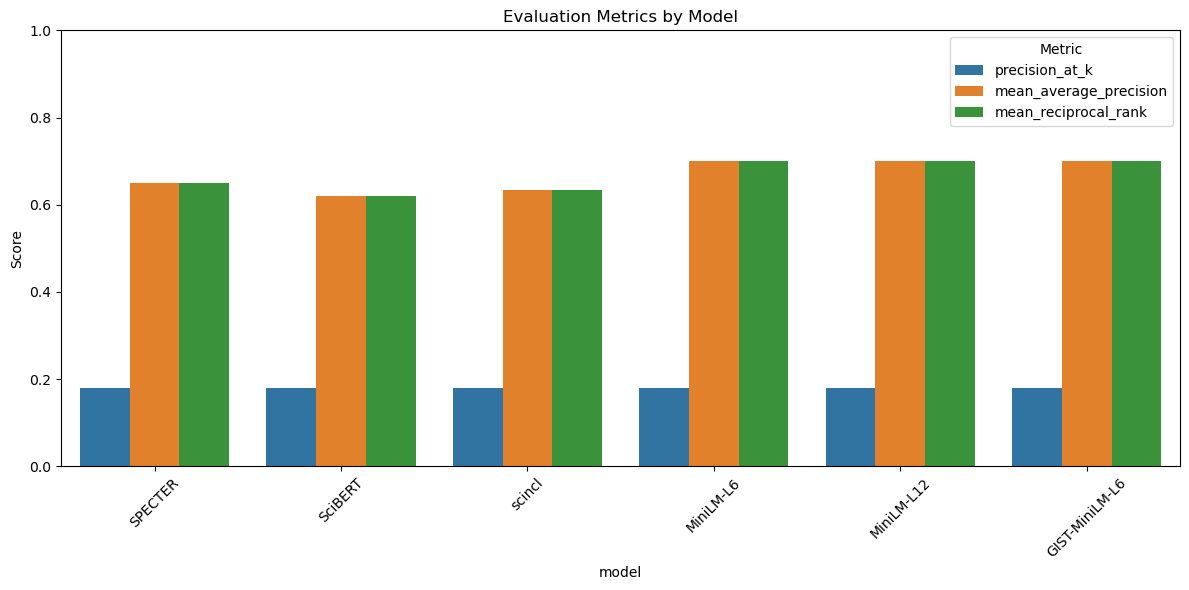

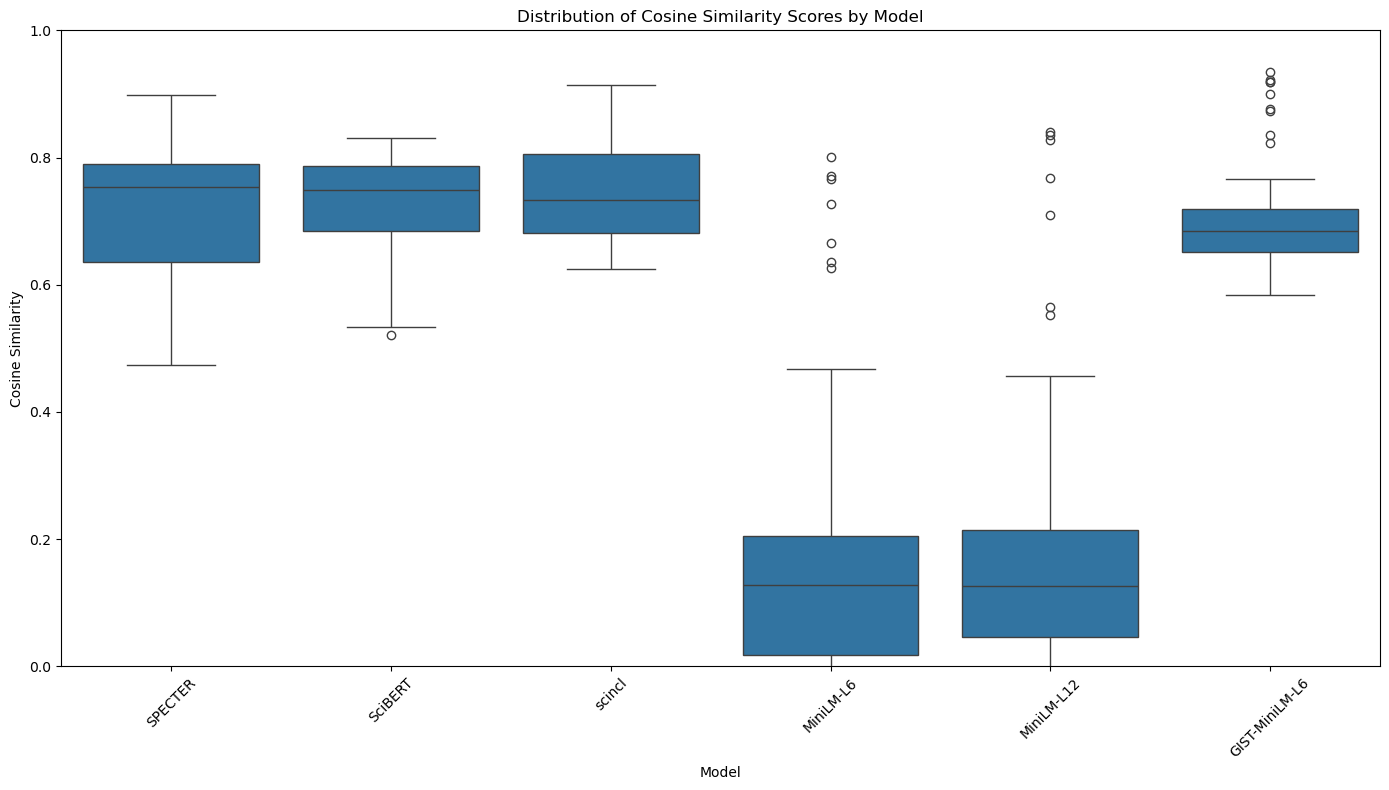

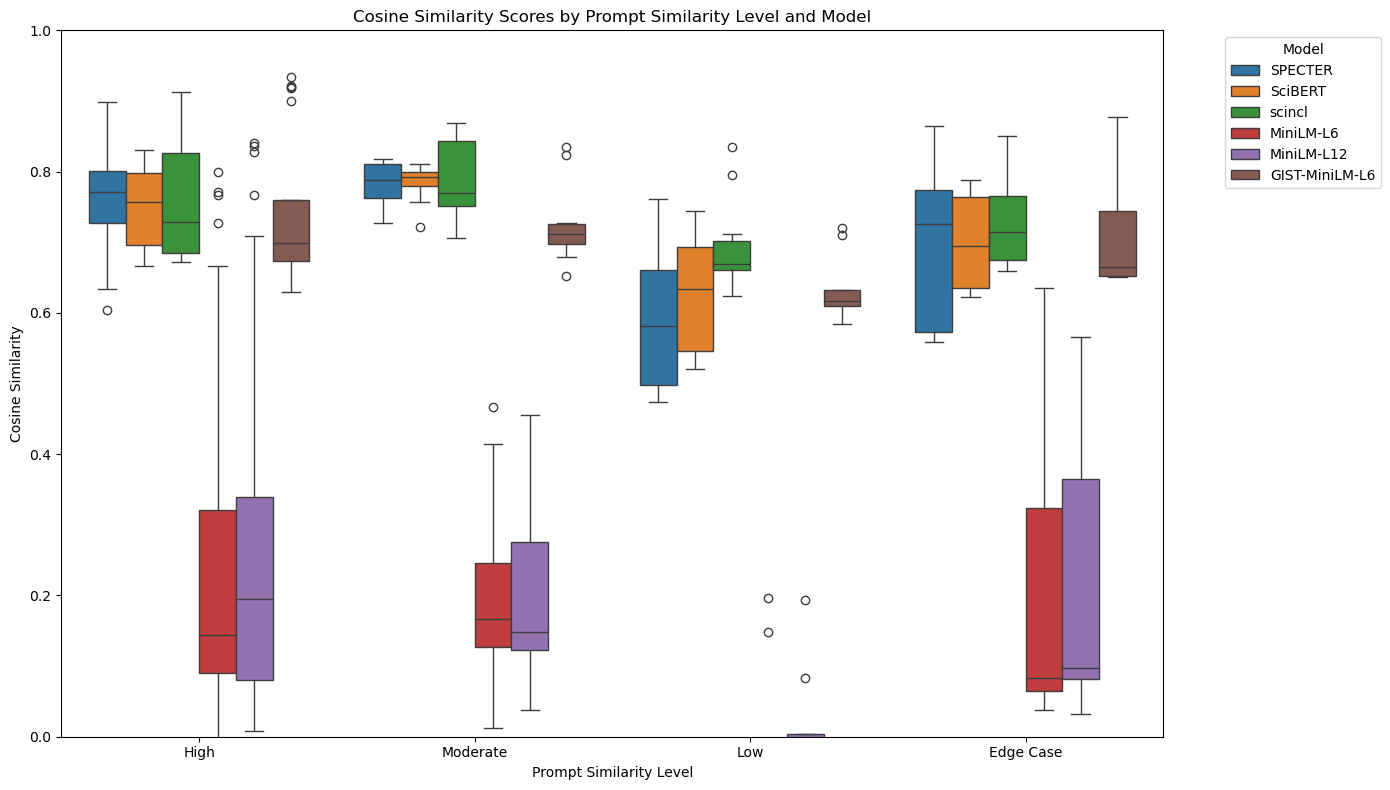

In [40]:
# ------------------------------ Complete Code ------------------------------ #

# Import Necessary Libraries
import os
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, models, util
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------- Step 1: Data Preparation --------------------------- #

# Sample Data: Replace this with your actual data containing at least 20 papers.
# Each paper should have 'id', 'authors', 'title', and 'abstract' fields.
data = [
    {
        "id": "0704.0047",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part I",
        "abstract": "The intelligent acoustic emission locator is described in Part I, while Part II discusses blind source separation, time delay estimation and location of two simultaneously active continuous acoustic emission sources."
    },
    {
        "id": "0704.0050",
        "authors": "T. Kosel and I. Grabec",
        "title": "Intelligent location of simultaneously active acoustic emission sources: Part II",
        "abstract": "Part I describes an intelligent acoustic emission locator, while Part II discusses blind source separation, time delay estimation and location of two continuous acoustic emission sources."
    },
    {
        "id": "0704.0304",
        "authors": "Carlos Gershenson",
        "title": "The World as Evolving Information",
        "abstract": "This paper discusses the benefits of describing the world as information, especially in the study of the evolution of life and cognition. Traditional studies encounter problems because it is difficult to describe life and cognition in terms of matter and energy, since their laws are valid only at the physical scale. However, if matter and energy, as well as life and cognition, are described in terms of information, evolution can be described consistently as information becoming more complex."
    },
    {
        "id": "0704.0671",
        "authors": "Maxim Raginsky",
        "title": "Learning from compressed observations",
        "abstract": "The problem of statistical learning is to construct a predictor of a random variable Y as a function of a related random variable X on the basis of an i.i.d. training sample from the joint distribution of (X,Y). Allowable predictors are drawn from some specified class, and the goal is to approach asymptotically the performance (expected loss) of the best predictor in the class."
    },
    {
        "id": "0704.0954",
        "authors": "Soummya Kar and Jose M. F. Moura",
        "title": "Sensor Networks with Random Links: Topology Design for Distributed Consensus",
        "abstract": "In a sensor network, the communication among sensors is subject to errors or failures at random times, costs, and constraints. The paper studies the problem of designing the topology to maximize the rate of convergence of average consensus, considering communication costs and budget constraints."
    },
    # ... Add the remaining papers here ...
    # Ensure you have at least 20 papers in your actual DataFrame.
]
# Note: For demonstration purposes, only 5 papers are shown. Replace with your actual dataset.

# Create DataFrame
sample_df = pd.DataFrame(data)

# Function to prepare combined text
def prepare_text(row):
    title = row['title']
    abstract = row['abstract']
    authors = row['authors']
    combined_text = f"Title: {title}. Authors: {authors}. Abstract: {abstract}"
    return combined_text

# Apply the prepare_text function
sample_df['combined_text'] = sample_df.apply(prepare_text, axis=1)

print("Prepared Texts:")
print(sample_df['combined_text'])

# Use all available papers
df_subset = sample_df.copy().reset_index(drop=True)

# ------------------------ Step 2: Creating Prompts ------------------------ #

# Manually define prompts with expected relevant papers
prompts_data = [
    # High Similarity Prompts
    {
        'prompt_text': "How can acoustic emission techniques be used to locate simultaneous sources?",
        'similarity_level': 'High',
        'expected_papers': ['0704.0047', '0704.0050']
    },
    {
        'prompt_text': "Discuss methods for statistical learning from compressed observations.",
        'similarity_level': 'High',
        'expected_papers': ['0704.0671']
    },
    {
        'prompt_text': "What is the role of sensor networks in distributed consensus?",
        'similarity_level': 'High',
        'expected_papers': ['0704.0954']
    },
    {
        'prompt_text': "How does describing the world as information help in understanding evolution?",
        'similarity_level': 'High',
        'expected_papers': ['0704.0304']
    },
    # Moderate Similarity Prompts
    {
        'prompt_text': "Explain the applications of machine learning in signal processing.",
        'similarity_level': 'Moderate',
        'expected_papers': ['0704.0671']  # Possibly related
    },
    {
        'prompt_text': "Discuss recent advances in distributed algorithms for networks.",
        'similarity_level': 'Moderate',
        'expected_papers': ['0704.0954']
    },
    # Low Similarity Prompts
    {
        'prompt_text': "What are the key themes in Renaissance art?",
        'similarity_level': 'Low',
        'expected_papers': []
    },
    {
        'prompt_text': "How does climate change affect marine life?",
        'similarity_level': 'Low',
        'expected_papers': []
    },
    # Edge Case Prompts
    {
        'prompt_text': "What are future directions in the study of acoustic emission sources?",
        'similarity_level': 'Edge Case',
        'expected_papers': ['0704.0047', '0704.0050']
    },
    {
        'prompt_text': "How can quantum computing be applied to distributed consensus algorithms?",
        'similarity_level': 'Edge Case',
        'expected_papers': []
    },
]

# Convert prompts to DataFrame
df_prompts = pd.DataFrame(prompts_data)

print("\nGenerated Prompts:")
print(df_prompts[['prompt_text', 'similarity_level', 'expected_papers']])

# ----------------------- Step 3: Loading Embedding Models ----------------------- #

# Define the models to use
models_dict = {
    "SPECTER": "allenai/specter",
    "SciBERT": "allenai/scibert_scivocab_uncased",
    "scincl": "malteos/scincl",
    "MiniLM-L6": "sentence-transformers/all-MiniLM-L6-v2",
    "MiniLM-L12": "sentence-transformers/all-MiniLM-L12-v2",
    "GIST-MiniLM-L6": "avsolatorio/GIST-all-MiniLM-L6-v2"
}

# Load models
loaded_models = {}
for name, model_name in models_dict.items():
    print(f"\nLoading model: {name} ({model_name})")
    if name in ["SPECTER", "SciBERT", "scincl"]:
        # Load as custom SentenceTransformer models with Transformer and Pooling modules
        transformer = models.Transformer(model_name, max_seq_length=512)
        pooling = models.Pooling(transformer.get_word_embedding_dimension(),
                                 pooling_mode_mean_tokens=True,
                                 pooling_mode_cls_token=False,
                                 pooling_mode_max_tokens=False)
        sentence_transformer = SentenceTransformer(modules=[transformer, pooling])
        loaded_models[name] = sentence_transformer
    else:
        # Load general-purpose model directly
        sentence_transformer = SentenceTransformer(model_name)
        loaded_models[name] = sentence_transformer

    print(f"Loaded model: {name} ({model_name})")

# ----------------------- Step 4: Generating Embeddings ----------------------- #

# Initialize dictionaries to store embeddings
paper_embeddings_dict = {name: None for name in models_dict.keys()}
prompt_embeddings_dict = {name: None for name in models_dict.keys()}

for model_name, model in loaded_models.items():
    print(f"\nGenerating embeddings using {model_name}...")

    # Encode papers
    paper_texts = df_subset['combined_text'].tolist()
    paper_embeddings = model.encode(
        paper_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    paper_embeddings_dict[model_name] = paper_embeddings

    # Encode prompts
    prompt_texts = df_prompts['prompt_text'].tolist()
    prompt_embeddings = model.encode(
        prompt_texts,
        show_progress_bar=True,
        convert_to_numpy=True
    ).astype(np.float32)  # Ensure dtype is float32
    prompt_embeddings_dict[model_name] = prompt_embeddings

print("\nEmbeddings generation completed for all models.")

# ----------------------- Step 5: Similarity Analysis and Metrics Computation ----------------------- #

# Function to compute cosine similarity and get top k neighbors, and compute metrics
def get_similarity_and_metrics(model_name, prompt_embeddings, paper_embeddings, k=5):
    """
    For each prompt, compute cosine similarity with all papers, return top k neighbors,
    and compute evaluation metrics.
    """
    similarity_results = []
    precision_at_k_list = []
    average_precision_list = []
    reciprocal_rank_list = []

    for prompt_idx, prompt_emb in tqdm(enumerate(prompt_embeddings), total=len(prompt_embeddings), desc=f"Processing prompts for {model_name}"):
        # Ensure prompt_emb is 2D
        prompt_emb = prompt_emb.reshape(1, -1)

        # Compute cosine similarity with all papers
        similarities = util.cos_sim(prompt_emb, paper_embeddings).flatten()

        # Convert similarities to numpy array
        similarities = similarities.cpu().numpy()

        # Get top k indices (handle case where k > number of papers)
        k_adjusted = min(k, len(similarities))
        top_k_indices = similarities.argsort()[-k_adjusted:][::-1]
        top_k_scores = similarities[top_k_indices]
        top_k_papers = df_subset.iloc[top_k_indices]
        retrieved_ids = top_k_papers['id'].tolist()

        # Expected papers for this prompt
        expected_ids = df_prompts.iloc[prompt_idx]['expected_papers']

        # Create binary relevance labels for retrieved papers
        retrieved_relevance = [1 if pid in expected_ids else 0 for pid in retrieved_ids]

        # Compute Precision at k
        num_relevant = sum(retrieved_relevance)
        precision_at_k = num_relevant / k_adjusted if k_adjusted > 0 else 0
        precision_at_k_list.append(precision_at_k)

        # Compute Average Precision (AP)
        ap = 0.0
        num_hits = 0.0
        for i, rel in enumerate(retrieved_relevance):
            if rel == 1:
                num_hits += 1.0
                ap += num_hits / (i + 1.0)
        if num_hits > 0:
            ap /= num_hits
        average_precision_list.append(ap)

        # Compute Reciprocal Rank (RR)
        rr = 0.0
        for i, rel in enumerate(retrieved_relevance):
            if rel == 1:
                rr = 1.0 / (i + 1.0)
                break
        reciprocal_rank_list.append(rr)

        # Store results
        for rank in range(k_adjusted):
            similarity_results.append({
                'model': model_name,
                'prompt_index': prompt_idx,
                'prompt_text': df_prompts.iloc[prompt_idx]['prompt_text'],
                'similarity_level': df_prompts.iloc[prompt_idx]['similarity_level'],
                'neighbor_rank': rank + 1,
                'neighbor_paper_id': top_k_papers.iloc[rank]['id'],
                'neighbor_title': top_k_papers.iloc[rank]['title'],
                'similarity_score': top_k_scores[rank]
            })

    # Compute metrics
    mean_precision_at_k = np.mean(precision_at_k_list)
    mean_average_precision = np.mean(average_precision_list)
    mean_reciprocal_rank = np.mean(reciprocal_rank_list)

    metrics = {
        'model': model_name,
        'precision_at_k': mean_precision_at_k,
        'mean_average_precision': mean_average_precision,
        'mean_reciprocal_rank': mean_reciprocal_rank
    }

    return pd.DataFrame(similarity_results), metrics

# Compute top 5 neighbors and metrics for each model
df_similarity_all = pd.DataFrame()
metrics_list = []

for model_name in models_dict.keys():
    prompt_embeds = prompt_embeddings_dict[model_name]
    paper_embeds = paper_embeddings_dict[model_name]
    df_similarity, metrics = get_similarity_and_metrics(model_name, prompt_embeds, paper_embeds, k=5)
    df_similarity_all = pd.concat([df_similarity_all, df_similarity], ignore_index=True)
    metrics_list.append(metrics)

# Create DataFrame for metrics
df_metrics = pd.DataFrame(metrics_list)

print("\nSimilarity analysis and metrics computation completed for all models.")

# ----------------------- Step 6: Displaying Metrics ----------------------- #

print("\nEvaluation Metrics for Each Model:")
print(df_metrics[['model', 'precision_at_k', 'mean_average_precision', 'mean_reciprocal_rank']])

# ----------------------- Step 7: Visualization ----------------------- #

# Visualization: Bar Plot of Evaluation Metrics
metrics_melted = df_metrics.melt(id_vars=['model'], value_vars=['precision_at_k', 'mean_average_precision', 'mean_reciprocal_rank'],
                                 var_name='metric', value_name='value')

plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='value', hue='metric', data=metrics_melted)
plt.title('Evaluation Metrics by Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Boxplot of Similarity Scores by Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='model', y='similarity_score', data=df_similarity_all)
plt.title('Distribution of Cosine Similarity Scores by Model')
plt.ylabel('Cosine Similarity')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Boxplot of Similarity Scores by Similarity Level and Model
plt.figure(figsize=(14, 8))
sns.boxplot(x='similarity_level', y='similarity_score', hue='model', data=df_similarity_all, 
            order=['High', 'Moderate', 'Low', 'Edge Case'])
plt.title('Cosine Similarity Scores by Prompt Similarity Level and Model')
plt.ylabel('Cosine Similarity')
plt.xlabel('Prompt Similarity Level')
plt.ylim(0, 1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
